# Imports

## Libraries

In [577]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_colwidth', None)
pd.options.display.float_format = '{:.4f}'.format

sns.set_style('whitegrid', {'grid.linewidth': .05, 'grid.color': '.85'})

## Data

In [578]:
df_raw = pd.read_csv('data/source/2016_Building_Energy_Benchmarking.csv')
df_raw

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0000,0659000030,...,1156514.2500,3946027.0000,12764.5293,1276453.0000,False,NaN,Compliant,NaN,249.9800,2.8300
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0000,0659000220,...,950425.1875,3242851.0000,51450.8164,5145082.0000,False,NaN,Compliant,NaN,295.8600,2.8600
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0000,0659000475,...,14515435.0000,49526664.0000,14938.0000,1493800.0000,False,NaN,Compliant,NaN,2089.2800,2.1900
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0000,0659000640,...,811525.3125,2768924.0000,18112.1309,1811213.0000,False,NaN,Compliant,NaN,286.4300,4.6700
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0000,0659000970,...,1573448.6250,5368607.0000,88039.9844,8803998.0000,False,NaN,Compliant,NaN,505.0100,2.8800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,2016,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,Seattle,WA,NaN,1624049080,...,153655.0000,524270.8600,3254.7502,325475.0244,True,NaN,Error - Correct Default Data,NaN,20.9400,1.7000
3372,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,Seattle,WA,NaN,3558300000,...,116221.0000,396546.0520,5537.2998,553729.9805,False,NaN,Compliant,NaN,32.1700,2.0100
3373,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,Seattle,WA,NaN,1794501150,...,525251.6875,1792158.7580,39737.3906,3973739.0630,False,NaN,Compliant,NaN,223.5400,16.9900
3374,50225,2016,Nonresidential COS,Mixed Use Property,South Park Community Center,8319 8th Ave S,Seattle,WA,NaN,7883603155,...,102248.0000,348870.1760,3706.0100,370601.0010,False,NaN,Compliant,NaN,22.1100,1.5700


In [579]:
df = df_raw.copy()

# Quick overview

## Structure

In [580]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

The `Comments` column does not contain any values.

In [581]:
df.dtypes.value_counts()

float64    22
object     15
int64       8
bool        1
dtype: int64

In [582]:
df.nunique()

OSEBuildingID                      3376
DataYear                              1
BuildingType                          8
PrimaryPropertyType                  24
PropertyName                       3362
Address                            3354
City                                  1
State                                 1
ZipCode                              55
TaxParcelIdentificationNumber      3268
CouncilDistrictCode                   7
Neighborhood                         19
Latitude                           2876
Longitude                          2656
YearBuilt                           113
NumberofBuildings                    17
NumberofFloors                       50
PropertyGFATotal                   3195
PropertyGFAParking                  496
PropertyGFABuilding(s)             3193
ListOfAllPropertyUseTypes           466
LargestPropertyUseType               56
LargestPropertyUseTypeGFA          3122
SecondLargestPropertyUseType         50
SecondLargestPropertyUseTypeGFA    1352


Certain columns like `DataYear`, `City`, `State` have only 1 unique value, which is normal as the dataset comes from 2016 and concerne Seattle only.

In [583]:
print(df['DataYear'].unique())
print(df['City'].unique())
print(df['State'].unique())

[2016]
['Seattle']
['WA']


## NaN


In [584]:
df.isnull().sum()

OSEBuildingID                         0
DataYear                              0
BuildingType                          0
PrimaryPropertyType                   0
PropertyName                          0
Address                               0
City                                  0
State                                 0
ZipCode                              16
TaxParcelIdentificationNumber         0
CouncilDistrictCode                   0
Neighborhood                          0
Latitude                              0
Longitude                             0
YearBuilt                             0
NumberofBuildings                     8
NumberofFloors                        0
PropertyGFATotal                      0
PropertyGFAParking                    0
PropertyGFABuilding(s)                0
ListOfAllPropertyUseTypes             9
LargestPropertyUseType               20
LargestPropertyUseTypeGFA            20
SecondLargestPropertyUseType       1697
SecondLargestPropertyUseTypeGFA    1697


<Axes: >

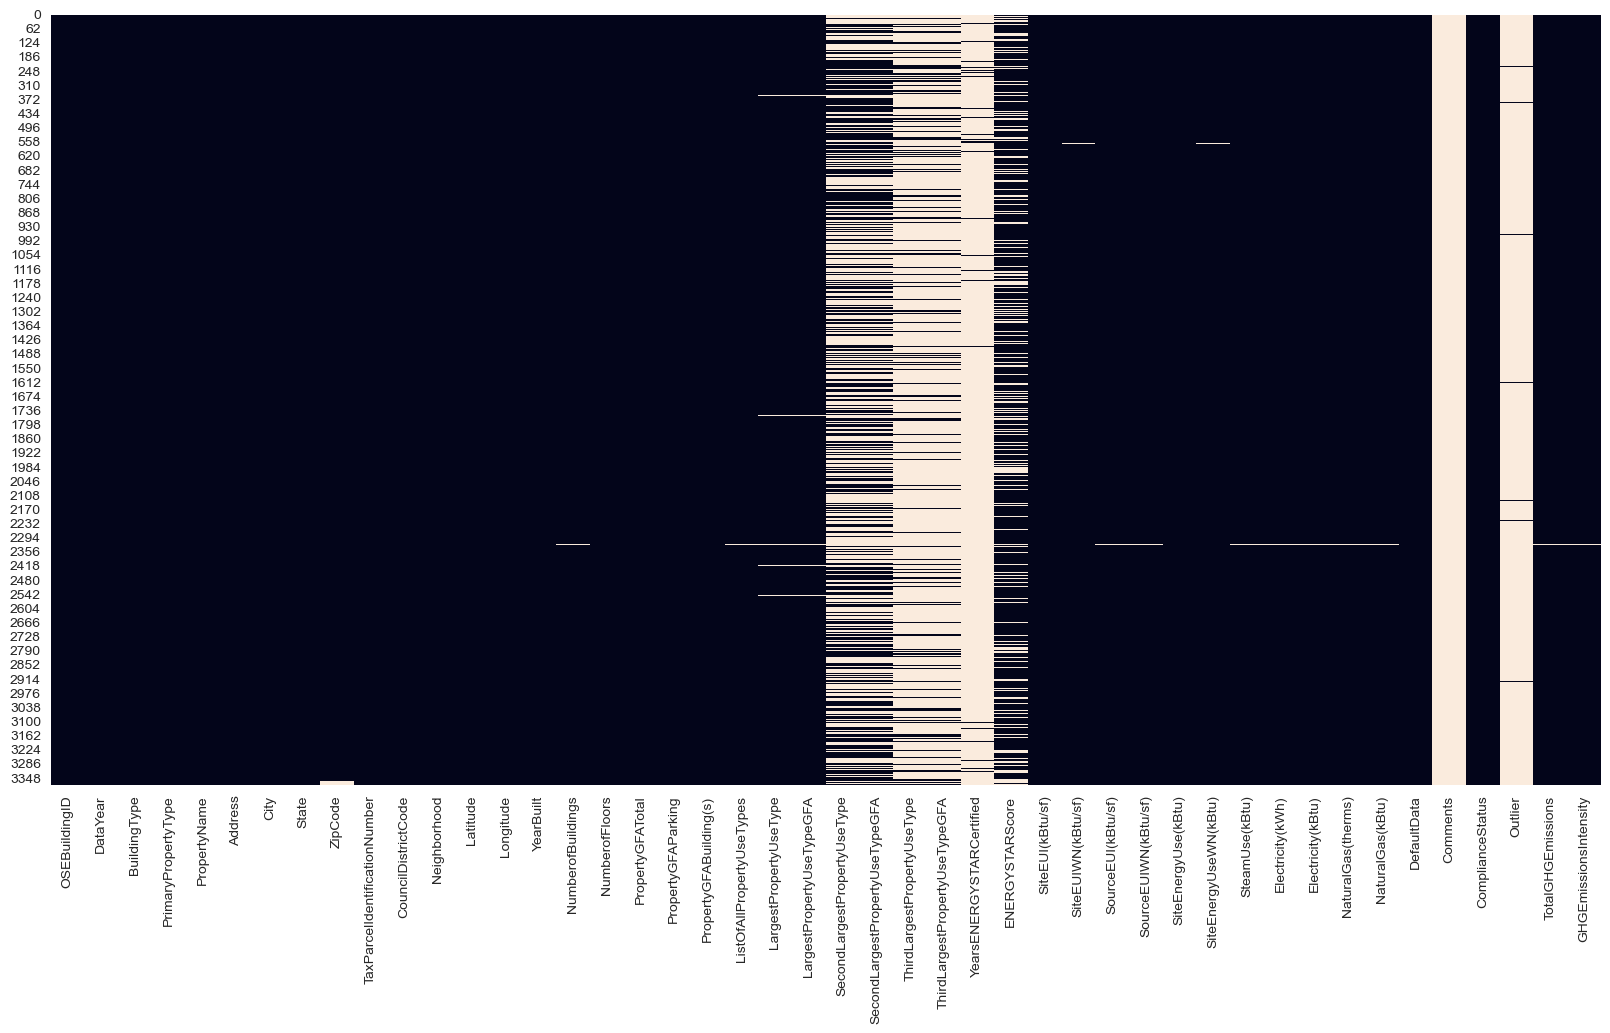

In [585]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.isnull(), cbar=False)

Fortunately for the project, the dataset does not have a lot of NaN values, we can see however certain columns like `Comments`, `YearsENERGYSTARCertified`, `Outlier` that have the most important amount of null values

In [586]:
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

Comments                          1.0000
Outlier                           0.9905
YearsENERGYSTARCertified          0.9648
ThirdLargestPropertyUseType       0.8235
ThirdLargestPropertyUseTypeGFA    0.8235
SecondLargestPropertyUseType      0.5027
SecondLargestPropertyUseTypeGFA   0.5027
ENERGYSTARScore                   0.2497
LargestPropertyUseTypeGFA         0.0059
LargestPropertyUseType            0.0059
ZipCode                           0.0047
ListOfAllPropertyUseTypes         0.0027
SourceEUIWN(kBtu/sf)              0.0027
SourceEUI(kBtu/sf)                0.0027
Electricity(kWh)                  0.0027
Electricity(kBtu)                 0.0027
NaturalGas(therms)                0.0027
NaturalGas(kBtu)                  0.0027
TotalGHGEmissions                 0.0027
SteamUse(kBtu)                    0.0027
GHGEmissionsIntensity             0.0027
NumberofBuildings                 0.0024
SiteEUI(kBtu/sf)                  0.0021
SiteEUIWN(kBtu/sf)                0.0018
SiteEnergyUseWN(

Percentage of null values

In [587]:
round(df.isnull().sum().sum() / df.size, 2)

0.13

## Duplicated

In [588]:
df.duplicated().sum()

0

In [589]:
df.duplicated(subset=['OSEBuildingID']).sum()

0

# Data inspection

## Target

We have 2 types of target: <br/>

- CO2 emissions
- Energy consumption <br/>

<u>1. CO2 emission</u><br/>

The best candidates are: <br/>

- `TotalGHGEmissions` which is the total amount of greenhouse gas emissions, including carbon dioxide, methane, and nitrous oxide gases released into the atmosphere as a result of energy consumption at the property, measured in metric tons of carbon dioxide equivalent.
- `GHGEmissionsIntensity` which represents the total Greenhouse Gas Emissions divided by property's gross floor area, measured in kilograms of carbon dioxide equivalent per square foot.


<u>2. Energy consumption </u> <br/>

The best candidates are: <br/>

- `SiteEUI(kBtu/sf)` which stands for site Energy Use Intensity (EUI) which is a property's Site Energy Use divided by its gross floor area. Site Energy Use is the annual amount of all the energy consumed by the property on-site, as reported on utility bills. Site EUI is measured in thousands of British thermal units (kBtu) per square foot.
- `SiteEUIWN(kBtu/sf)`: Weather Normalized (WN) Site Energy Use Intensity (EUI) is a property's WN Site Energy divided by its gross floor area (in square feet). WN Site Energy is the Site Energy Use the property would have consumed during 30-year average weather conditions.
- `SiteEnergyUse(kBtu)` which is the annual amount of energy consumed by the property from all sources of energy.
- `SiteEnergyUseWN(kBtu)`: the annual amount of energy consumed by the property from all sources of energy, adjusted to what the property would have consumed during 30-year average weather conditions. <br/>
- `SourceEUI(kBtu/sf)`: Source Energy Use Intensity (EUI) is a property's Source Energy Use divided by its gross floor area. Source Energy Use is the annual energy used to operate the property, including losses from generation, transmission, & distribution. Source EUI is measured in thousands of British thermal units (kBtu) per square foot.
- `SourceEUIWN(kBtu/sf)`: Weather Normalized (WN) Source Energy Use Intensity (EUI) is a property's WN Source Energy divided by its gross floor area. WN Source Energy is the Source Energy Use the property would have consumed during 30-year average weather conditions. WN Source EUI is measured in measured in thousands of British thermal units (kBtu) per square foot.

It is not clear which one to choose between **Site Energy Use** and **Source Energy Use**.<br/>

According to this [Energy Star publication](https://www.energystar.gov/buildings/tools-and-resources/portfolio-manager-technical-reference-source-energy), <br/>"**Source energy** is the most equitable unit of evaluation, and enables a complete assessment of energy efficiency... **site energy**, the amount of heat and electricity consumed by a building as reflected in utility bills"

And as explained in [Energy Star metrics comparison](https://energystar-mesa.force.com/PortfolioManager/s/article/What-are-Site-Energy-and-Source-Energy-1600088530247), <br/>
"**Source Energy** is your total primary energy consumption (meaning Site Energy) plus all the delivery and production losses.

<u>Source Energy:</u>

- Is your total primary energy consumption
- Accounts for the conversion from primary into secondary energy, whether this occurs at the utility or the property
- Is the EPA-Preferred metric to use (over Site Energy) because it is a more equitable assessment of the true energy needs of the building
- Is the metric used in the ENERGY STAR Score
- Is the best metric for an "apples-to-apples" comparison between properties" <br/>

The **Source Energy** seems to be more accurate to define the total building consumption, however, the goal of the project is to predict the energy consumption based on the bills, therefore, **Site Energy** is better suited for this purpose. **Source Energy** however might be useful in working with Energy Star Score.


For the energy consumption we see 2 types of measures: Weather Normalized and not. <br/>

According to the paper [SIMULATION-BASED WEATHER NORMALIZATION APPROACH TO STUDY THE IMPACT OF WEATHER ON ENERGY USE OF BUILDINGS IN THE U.S.](http://www.ibpsa.org/proceedings/BS2013/p_2453.pdf), <quote><b>"Weather normalization is fundamental for building energy rating and is the most challenging factor to adjust energy use for."</b></quote> We should therefore consider the more accurate weather normalizated variables as they give a better estimation without the weather bias. <br/>

This leaves us with 2 main targets:
- `TotalGHGEmissions` (CO2 emissions)
- `SiteEnergyUseWN(kBtu)` (energy consumption)

However, for the EDA the equivalent features calculated per square foot are better suited:

- `SiteEUIWN(kBtu/sf)`
- `GHGEmissionsIntensity`


### CO2 emissions

In [590]:
co2_targets = ['TotalGHGEmissions', 'GHGEmissionsIntensity']

df[co2_targets].describe()

,TotalGHGEmissions,GHGEmissionsIntensity
count,3367.0000,3367.0000
mean,119.7240,1.1759
std,538.8322,1.8215
min,-0.8000,-0.0200
25%,9.4950,0.2100
50%,33.9200,0.6100
75%,93.9400,1.3700
max,16870.9800,34.0900


We see negative values for the min for both features, after looking into external resources it seems that negative emissions are possible.

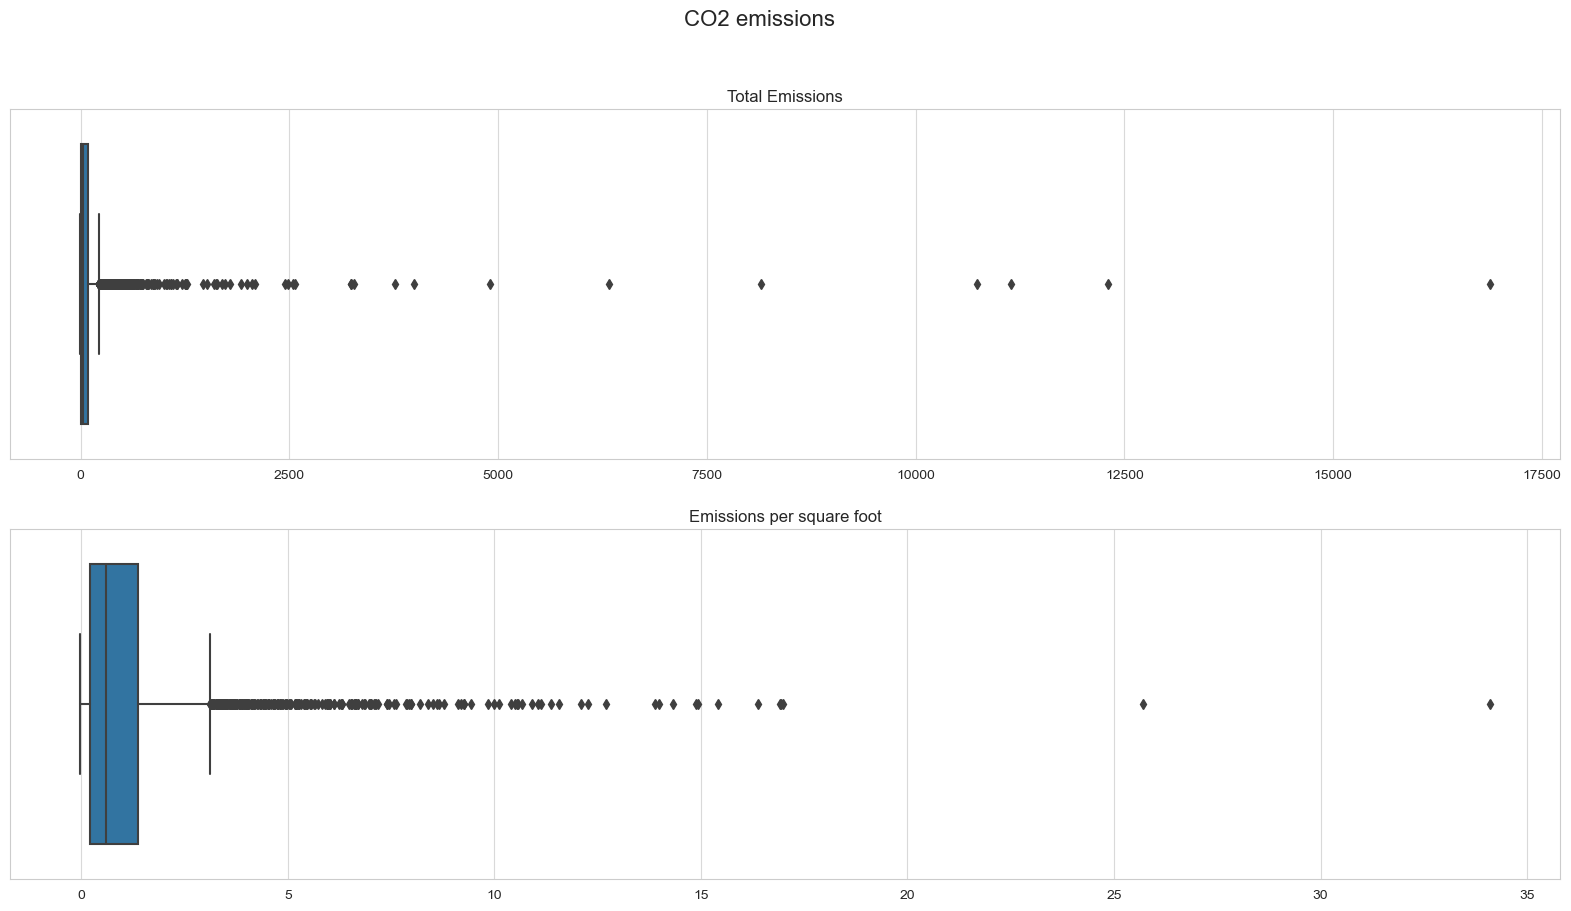

In [594]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 10))

fig.suptitle('CO2 emissions', fontsize=16)

sns.boxplot(x=df['TotalGHGEmissions'], ax=ax1)
ax1.set(xlabel=None)
ax1.set_title('Total Emissions')

sns.boxplot(x=df['GHGEmissionsIntensity'], ax=ax2)
ax2.set(xlabel=None)
ax2.set_title('Emissions per square foot')

plt.show()

At first glance the presence of multiple outliers on the right side can be observed

<Axes: xlabel='TotalGHGEmissions', ylabel='Density'>

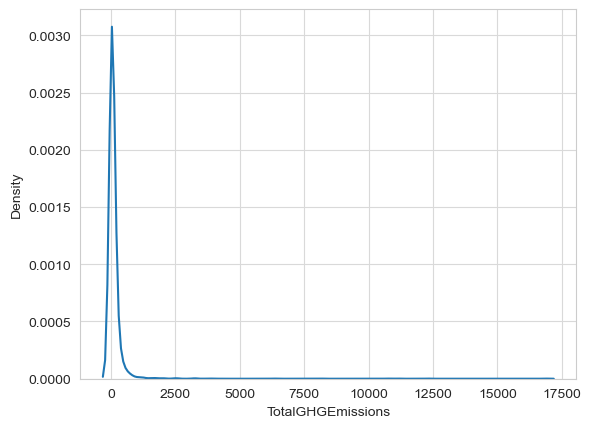

In [597]:
sns.kdeplot(data=df['TotalGHGEmissions'])

<Axes: xlabel='GHGEmissionsIntensity', ylabel='Density'>

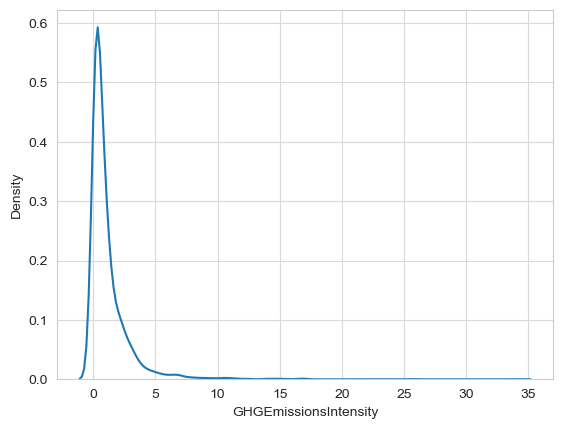

In [598]:
sns.kdeplot(data=df['GHGEmissionsIntensity'])

### Energy consumption

In [599]:
energy_targets = ['SiteEnergyUseWN(kBtu)', 'SiteEUIWN(kBtu/sf)']

df[energy_targets].describe()

,SiteEnergyUseWN(kBtu),SiteEUIWN(kBtu/sf)
count,3370.0000,3370.0000
mean,5276725.7144,57.0338
std,15938786.4841,57.1633
min,0.0000,0.0000
25%,970182.2344,29.4000
50%,1904452.0000,40.9000
75%,4381429.1250,64.2750
max,471613856.0000,834.4000


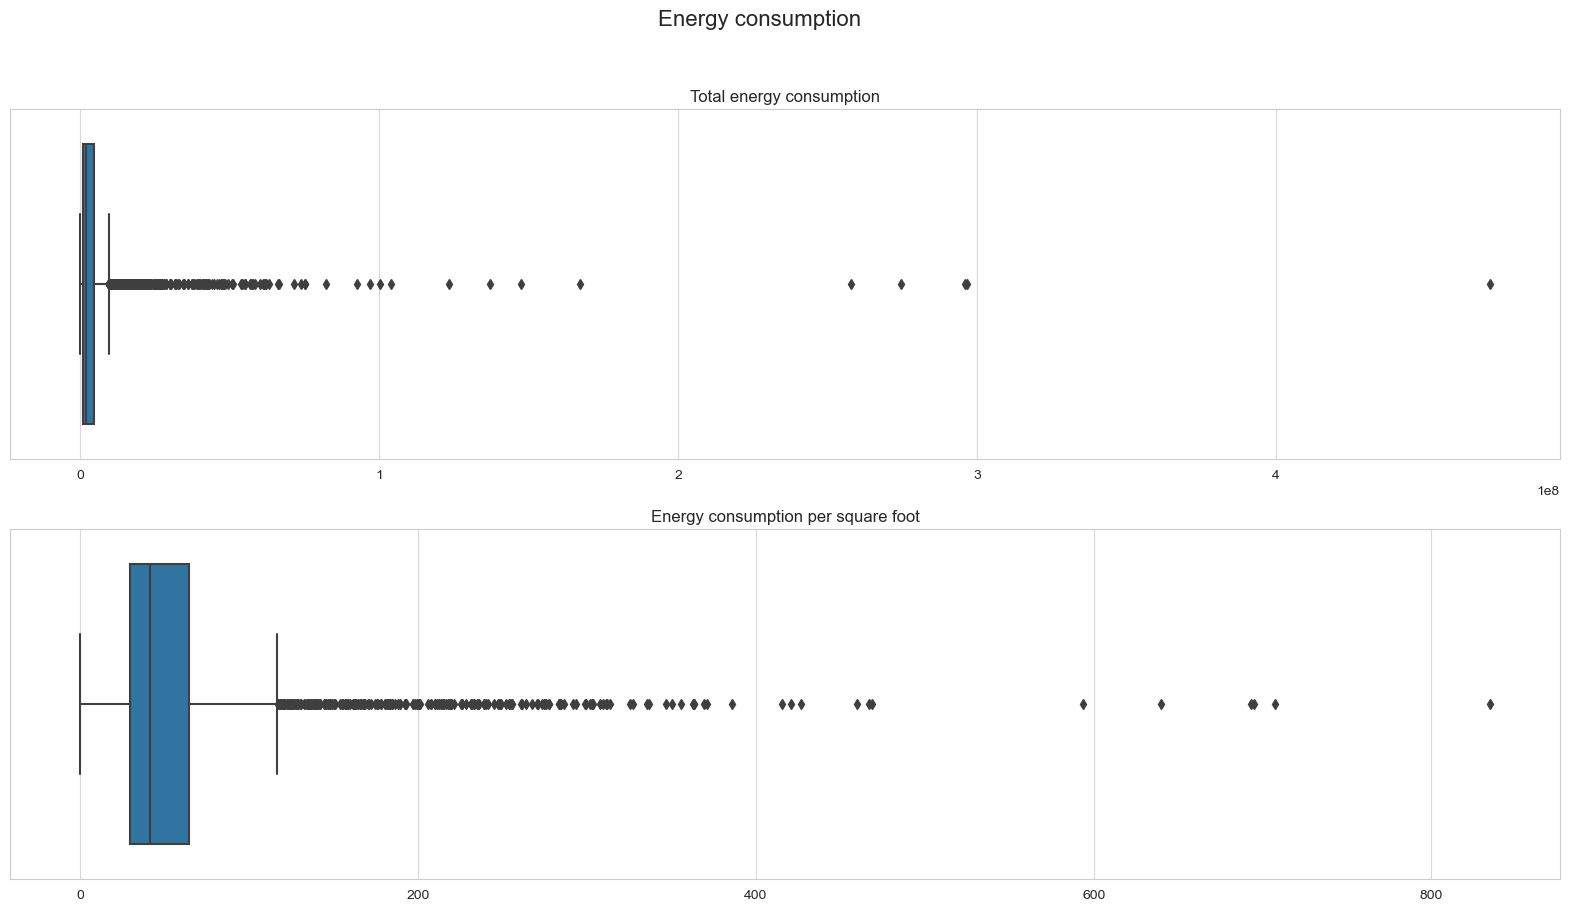

In [600]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 10))

fig.suptitle('Energy consumption', fontsize=16)

sns.boxplot(x=df['SiteEnergyUseWN(kBtu)'], ax=ax1)
ax1.set(xlabel=None)
ax1.set_title('Total energy consumption')

sns.boxplot(x=df['SiteEUIWN(kBtu/sf)'], ax=ax2)
ax2.set(xlabel=None)
ax2.set_title('Energy consumption per square foot')

plt.show()

<Axes: xlabel='SiteEnergyUseWN(kBtu)', ylabel='Density'>

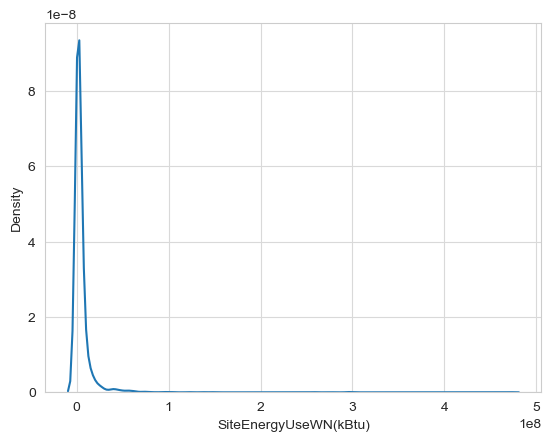

In [601]:
sns.kdeplot(x=df['SiteEnergyUseWN(kBtu)'])

<Axes: xlabel='SiteEUIWN(kBtu/sf)', ylabel='Density'>

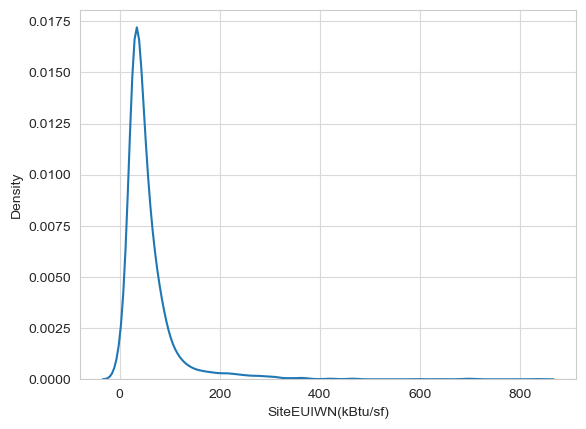

In [602]:
sns.kdeplot(x=df['SiteEUIWN(kBtu/sf)'])

***Note: we will use the features per square foot (`GHGEmissionsIntensity`, `SiteEUIWN(kBtu/sf)`) for the exploratory analysis as they do not include the surface bias***

## Features

Let's have a look at potentially interesting features for the modelisation

### Type

**BuildingType** <br/>
City of Seattle building type classification, will be used to filter out non residential buildings.

In [603]:
df['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'Multifamily MR (5-9)',
       'SPS-District K-12', 'Campus', 'Multifamily LR (1-4)',
       'Multifamily HR (10+)', 'Nonresidential WA'], dtype=object)

<Axes: xlabel='count', ylabel='BuildingType'>

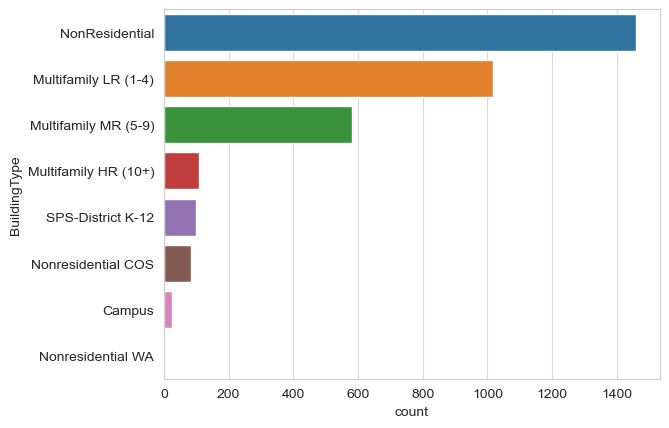

In [604]:
sns.countplot(y=df['BuildingType'], order = df['BuildingType'].value_counts().index)

**PrimaryPropertyType** <br/>
The primary use of a property (e.g. office, retail store). Primary use is defined as a function that accounts for more than 50% of a property. <br/>

We can assume the buildings having different purposes will have different energy consumption and CO2 emission, we would suggest intuitively for example that a Refrigerated Warehouse or a Hospital will consume more energy than a simple Warehouse, to be confirmed by the data.

In [605]:
df['PrimaryPropertyType'].unique()

array(['Hotel', 'Other', 'Mid-Rise Multifamily', 'Mixed Use Property',
       'K-12 School', 'University', 'Small- and Mid-Sized Office',
       'Self-Storage Facility', 'Warehouse', 'Large Office',
       'Senior Care Community', 'Medical Office', 'Retail Store',
       'Hospital', 'Residence Hall', 'Distribution Center',
       'Worship Facility', 'Low-Rise Multifamily',
       'Supermarket / Grocery Store', 'Laboratory',
       'Refrigerated Warehouse', 'Restaurant', 'High-Rise Multifamily',
       'Office'], dtype=object)

<Axes: xlabel='count', ylabel='PrimaryPropertyType'>

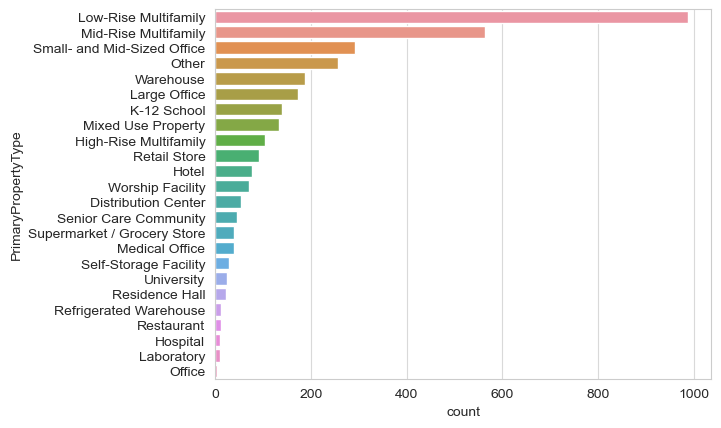

In [606]:
sns.countplot(y=df['PrimaryPropertyType'], order = df['PrimaryPropertyType'].value_counts().index)

**ListOfAllPropertyUseTypes** <br/>
All property uses reported in Portfolio Manager.<br/>

We also have corresponding surfaces:
- `LargestPropertyUseType`
- `LargestPropertyUseTypeGFA`
- `SecondLargestPropertyUseType`
- `SecondLargestPropertyUseTypeGFA`
- `ThirdLargestPropertyUseType`
- `ThirdLargestPropertyUseTypeGFA`

To make a more detailed analysis, it might be interesting to include this information in the energy consumption & CO2 emissions analysis, and why not in the model

In [612]:
property_types_gfa_columns = [
    'PropertyGFATotal', 'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
    'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
    'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
    'ThirdLargestPropertyUseTypeGFA'
]

df[property_types_gfa_columns].sample(20)

,PropertyGFATotal,ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA
883,21393,Worship Facility,Worship Facility,21393.0000,NaN,NaN,NaN,NaN
3096,273185,Office,Office,281566.0000,NaN,NaN,NaN,NaN
815,26670,Medical Office,Medical Office,26670.0000,NaN,NaN,NaN,NaN
2558,21996,"Multifamily Housing, Parking",Multifamily Housing,18364.0000,Parking,3632.0000,NaN,NaN
694,22325,"Medical Office, Office, Other, Other - Services, Parking, Retail Store",Office,18000.0000,Medical Office,1800.0000,Other,1000.0000
2777,23800,"Multifamily Housing, Parking",Multifamily Housing,13200.0000,Parking,10600.0000,NaN,NaN
209,204790,"Office, Other - Recreation, Parking, Retail Store",Office,142034.0000,Other - Recreation,17070.0000,Retail Store,14666.0000
1652,24288,Multifamily Housing,Multifamily Housing,24288.0000,NaN,NaN,NaN,NaN
1998,20520,"Non-Refrigerated Warehouse, Office",Non-Refrigerated Warehouse,15400.0000,Office,5120.0000,NaN,NaN
1353,31288,"Multifamily Housing, Parking",Multifamily Housing,24459.0000,Parking,6829.0000,NaN,NaN


### Geographical position
`Neighborhood`: Property neighborhood area defined by the City of Seattle Department of Neighborhoods.<br/>

It might be interesting to consider this feature, do the buildings have the same energy use in midtown or downtown?



In [613]:
df['Neighborhood'].unique()

array(['DOWNTOWN', 'SOUTHEAST', 'NORTHEAST', 'EAST', 'Central', 'NORTH',
       'MAGNOLIA / QUEEN ANNE', 'LAKE UNION', 'GREATER DUWAMISH',
       'BALLARD', 'NORTHWEST', 'CENTRAL', 'SOUTHWEST', 'DELRIDGE',
       'Ballard', 'North', 'Delridge', 'Northwest',
       'DELRIDGE NEIGHBORHOODS'], dtype=object)

<Axes: xlabel='count', ylabel='Neighborhood'>

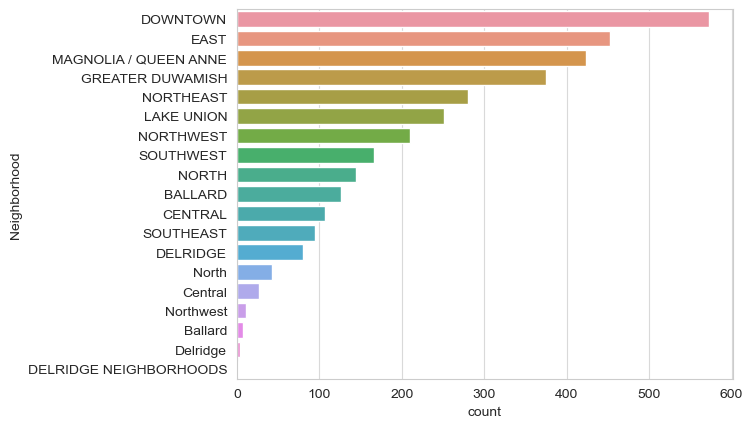

In [614]:
sns.countplot(y=df['Neighborhood'], order = df['Neighborhood'].value_counts().index)

We have some duplicated values (ex, CENTRAL, Central), we'll handle them in the further steps

### YearBuilt
Year in which a property was constructed or underwent a complete renovation. <br/>

This is a very important feature, we can assume that the most recent buildings are likely to consume less because of the use of the latest technologies/materials, to be confirmed by the data.


In [615]:
df['YearBuilt'].unique()

array([1927, 1996, 1969, 1926, 1980, 1999, 1904, 1910, 1998, 1928, 1922,
       2004, 1930, 1983, 1907, 1916, 1985, 1961, 2001, 1991, 1955, 1978,
       1949, 1989, 1906, 1994, 1992, 1990, 1950, 1900, 1954, 1911, 1973,
       1920, 1982, 1908, 1959, 2000, 1997, 1962, 1970, 2008, 1948, 1965,
       1929, 2010, 1938, 1986, 2002, 1923, 2003, 1957, 1964, 1941, 1963,
       2006, 1915, 1958, 2009, 2011, 1971, 2007, 1951, 1953, 1952, 1960,
       1937, 1966, 1968, 1925, 1924, 2005, 1909, 1931, 1972, 1914, 1913,
       1917, 1995, 1981, 1976, 1988, 1979, 1947, 1984, 1956, 1912, 1977,
       1921, 1945, 1974, 1975, 1946, 1967, 1987, 1940, 1932, 1993, 1918,
       1905, 1902, 1939, 1944, 1942, 1903, 2012, 2013, 2015, 1901, 1919,
       2014, 1936, 1935])

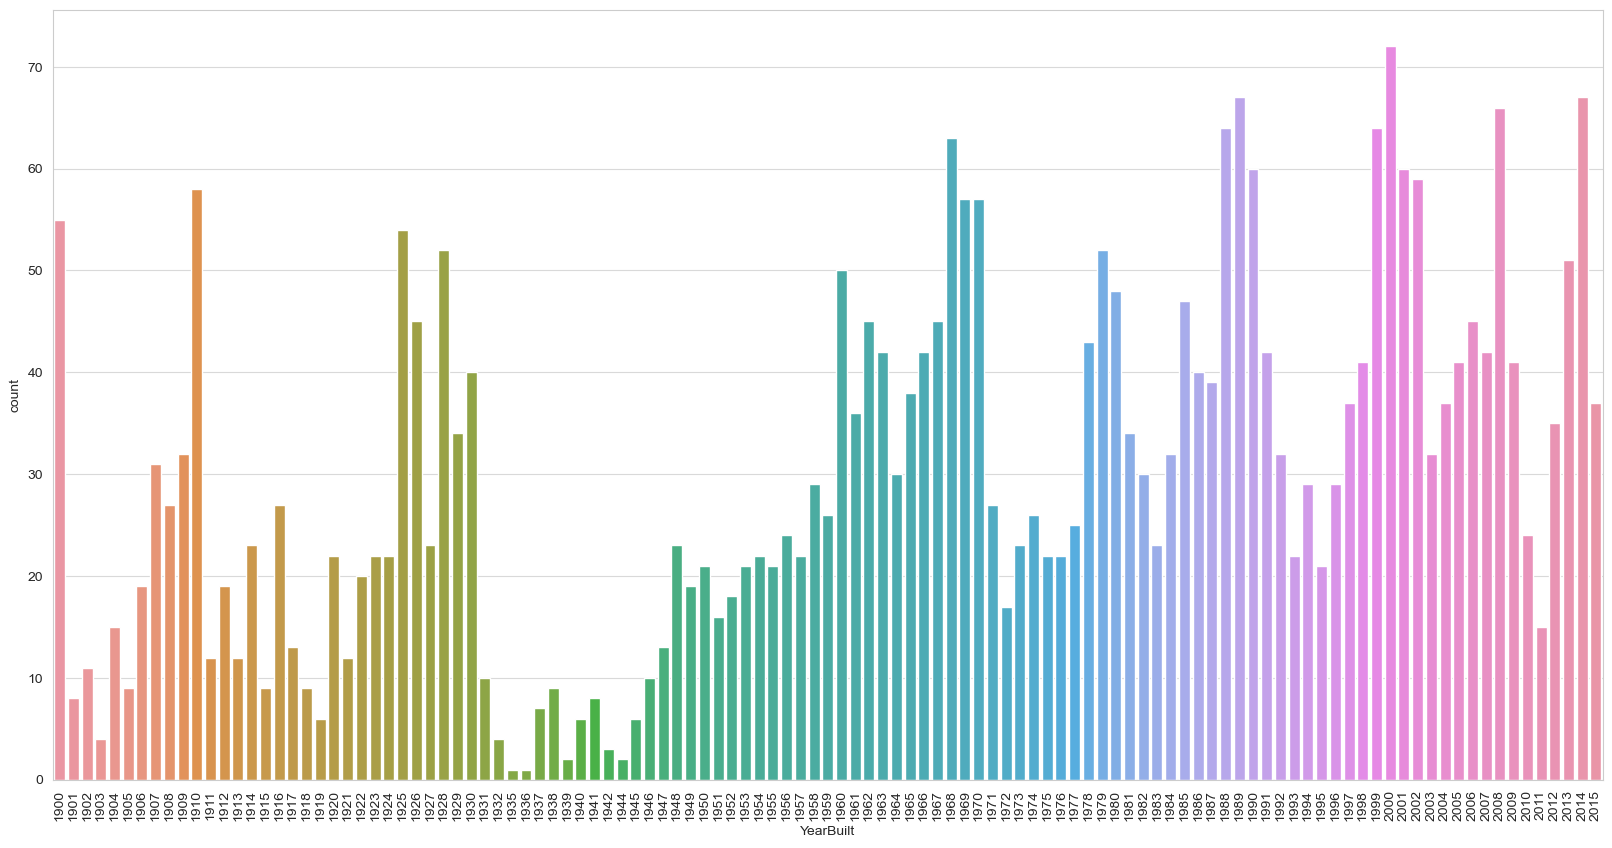

In [616]:
plt.figure(figsize=(20, 10))
sns.countplot(x=df['YearBuilt'].sort_values())
plt.xticks(rotation=90)

plt.show()

We see a big range of buildings lifespan, starting from the 1900 till 2015.

### Structure
**NumberofBuildings** & **NumberofFloors**

These 2 features give information on the structure of the building, it will be interesting to analyze whether one 10-floor building consumes more than 5 2-floor buildings for example.

In [617]:
df[['NumberofBuildings', 'NumberofFloors']].describe()

,NumberofBuildings,NumberofFloors
count,3368.0000,3376.0000
mean,1.1069,4.7091
std,2.1084,5.4945
min,0.0000,0.0000
25%,1.0000,2.0000
50%,1.0000,4.0000
75%,1.0000,5.0000
max,111.0000,99.0000


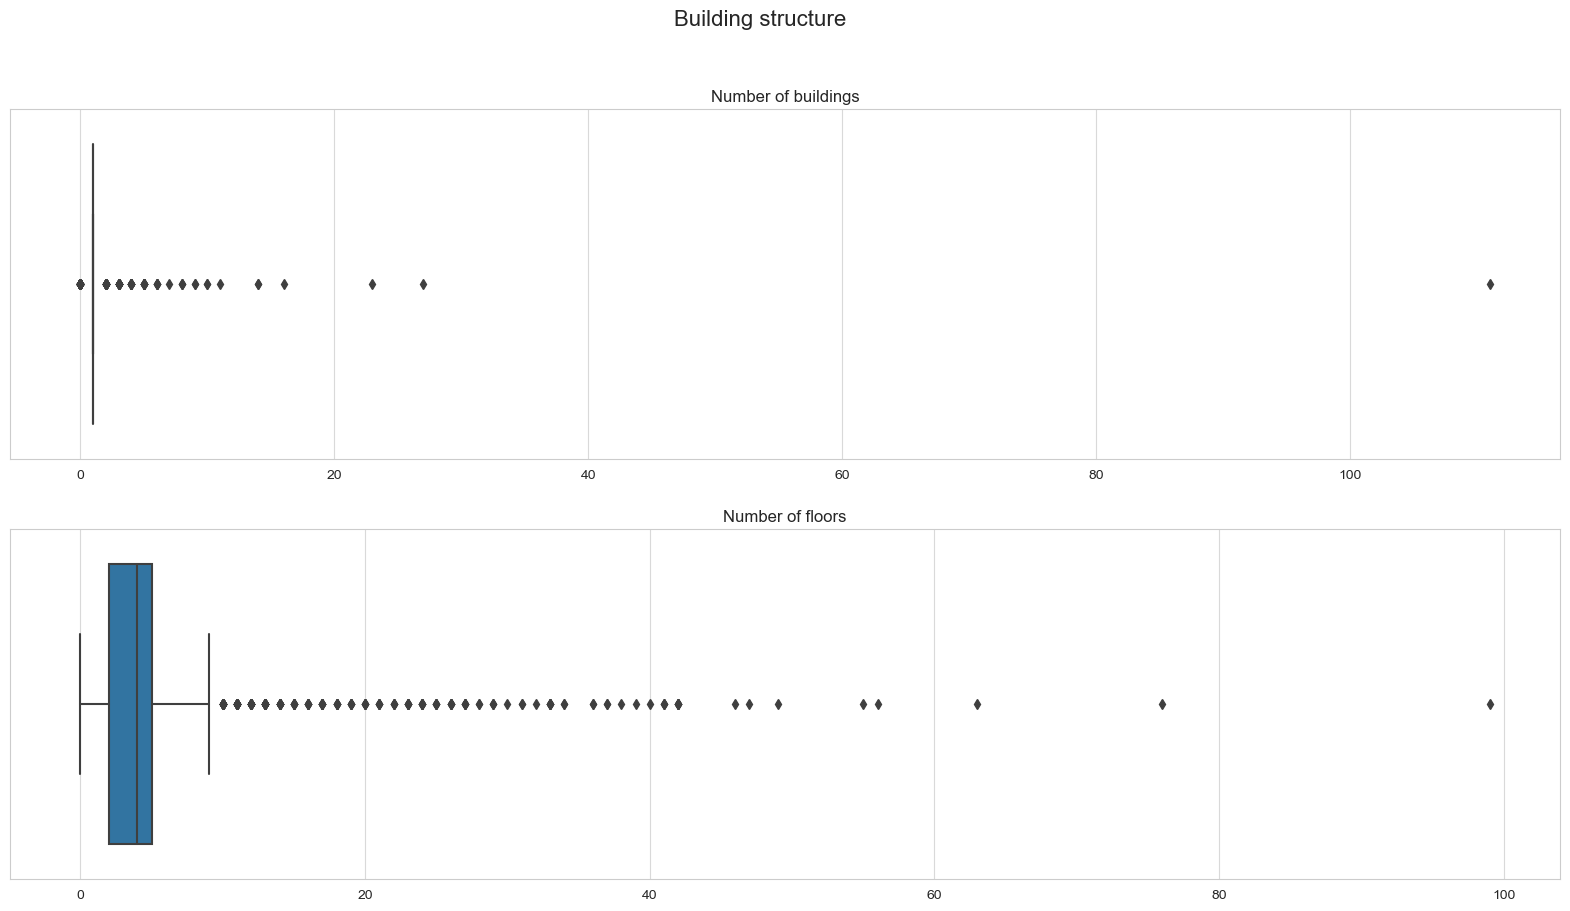

In [618]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 10))

fig.suptitle('Building structure', fontsize=16)

sns.boxplot(x=df['NumberofBuildings'], ax=ax1)
ax1.set(xlabel=None)
ax1.set_title('Number of buildings')

sns.boxplot(x=df['NumberofFloors'], ax=ax2)
ax2.set(xlabel=None)
ax2.set_title('Number of floors')

plt.show()

We also observe a certain amount of outliers on the right side and 0 for the min values that might be erroneous and should be fixed. The major part of buildings are constitued of 1 building and have 4/5 floors on average.

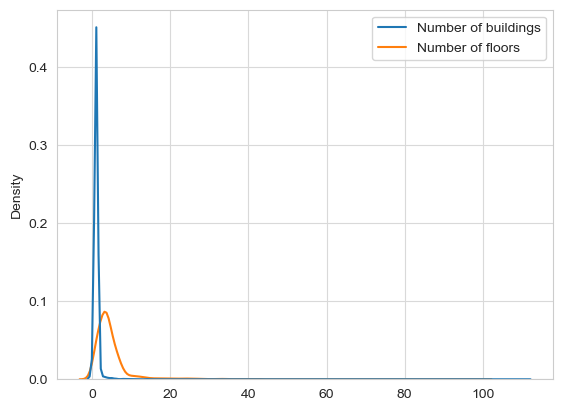

In [619]:
concat_df = pd.concat(
        {
            'Number of buildings': df['NumberofBuildings'],
            'Number of floors': df['NumberofFloors']
        },
        axis=1)
    
sns.kdeplot(data=concat_df)
plt.show()

### Surface

**PropertyGFATotal**: Total building and parking gross floor area. <br/>
**PropertyGFAParking**: Total space in square feet of all types of parking (Fully Enclosed, Partially Enclosed, and Open). <br/>Generally the parking area should not consume as much as the rest of the building so it will be interesting to take into account the park area. <br/>

We also see **PropertyGFABuilding(s)** feature as referring to the building space that might be interesting too (Total floor space in square feet between the outside surfaces of a building’s enclosing walls. This includes all areas inside the building(s), such as tenant space, common areas, stairwells, basements, storage, etc.). The given definition is quite confusing, does it include the outside parking area for example?

In [620]:
df[['PropertyGFATotal', 'PropertyGFABuilding(s)']].sample(20)

,PropertyGFATotal,PropertyGFABuilding(s)
1974,42252,42252
1108,35512,35512
3180,21753,21753
3307,31990,31990
1523,32000,32000
718,107518,107518
2404,38376,38376
1550,31152,31152
3032,37700,37700
475,144050,144050


`PropertyGFATotal` is equal or greater than `PropertyGFABuilding(s)` as it also contains outside areas.

In [621]:
df.loc[df['PropertyGFATotal'] < df['PropertyGFABuilding(s)']].shape

(0, 46)

Indeed `PropertyGFATotal` is always equal or greater than `PropertyGFABuilding(s)`, to avoid confusion on whether or not the outside parking area is included in `PropertyGFABuilding(s)`, let's keep `PropertyGFATotal`

In [622]:
df[['PropertyGFATotal', 'PropertyGFAParking']].describe()

,PropertyGFATotal,PropertyGFAParking
count,3376.0000,3376.0000
mean,94833.5373,8001.5261
std,218837.6071,32326.7239
min,11285.0000,0.0000
25%,28487.0000,0.0000
50%,44175.0000,0.0000
75%,90992.0000,0.0000
max,9320156.0000,512608.0000


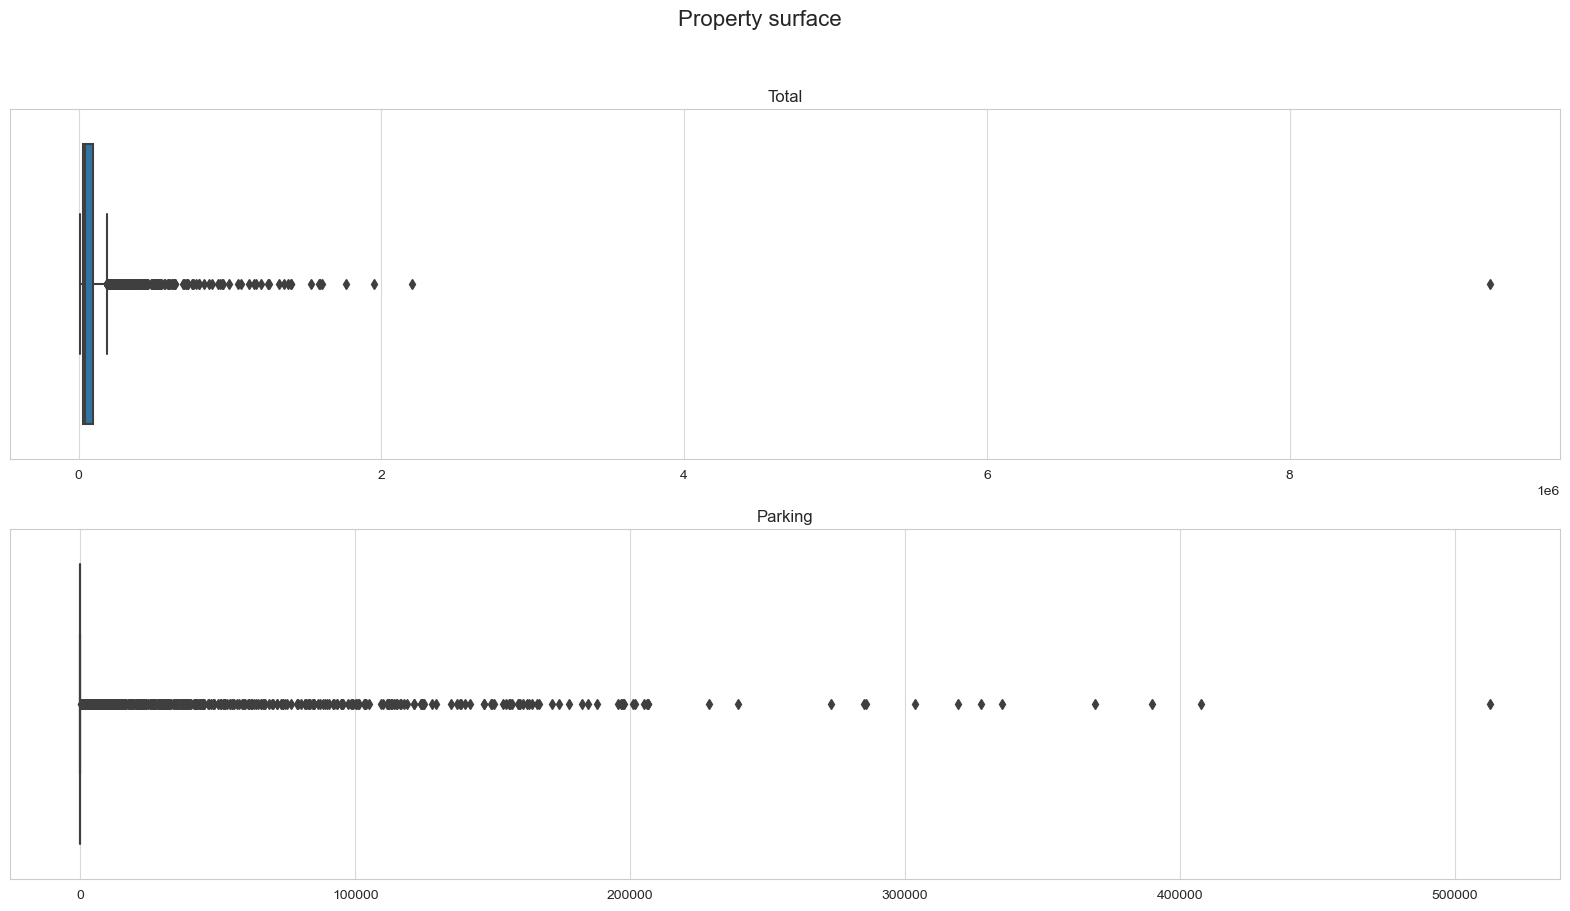

In [623]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 10))

fig.suptitle('Property surface', fontsize=16)

sns.boxplot(x=df['PropertyGFATotal'], ax=ax1)
ax1.set(xlabel=None)
ax1.set_title('Total')

sns.boxplot(x=df['PropertyGFAParking'], ax=ax2)
ax2.set(xlabel=None)
ax2.set_title('Parking')

plt.show()

### Resources

**SteamUse(kBtu)**: The annual amount of district steam consumed by the property on-site, measured in thousands of British thermal units (kBtu). <br/>

**Electricity(kBtu)**: The annual amount of electricity consumed by the property on-site, including electricity purchased from the grid and generated by onsite renewable systems, measured in thousands of British thermal units (kBtu). <br/>

**NaturalGas(kBtu)**: The annual amount of utility-supplied natural gas consumed by the property, measured in thousands of British thermal units (kBtu).

In [624]:
df[['SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)']].describe()

,SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu)
count,3367.0000,3367.0000,3367.0000
mean,274595.8982,3707612.1616,1368504.5414
std,3912173.3927,14850656.1390,6709780.8349
min,0.0000,-115417.0000,0.0000
25%,0.0000,639487.0000,0.0000
50%,0.0000,1177583.0000,323754.0000
75%,0.0000,2829632.5000,1189033.5000
max,134943456.0000,657074389.0000,297909000.0000


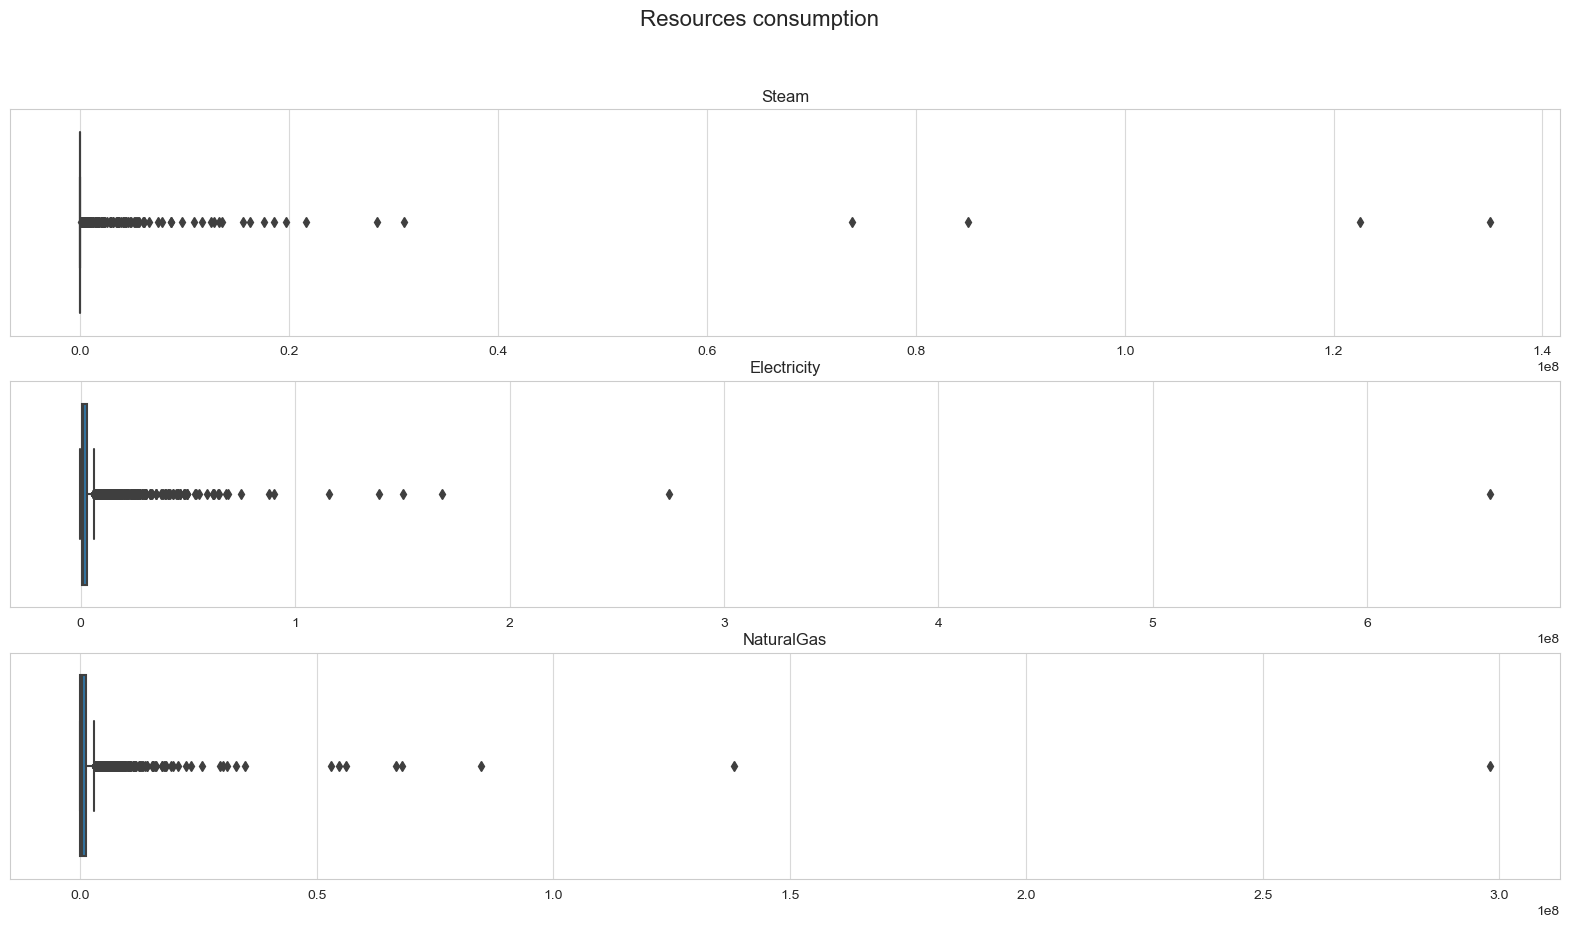

In [625]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(20, 10))

fig.suptitle('Resources consumption', fontsize=16)

sns.boxplot(x=df['SteamUse(kBtu)'], ax=ax1)
ax1.set(xlabel=None)
ax1.set_title('Steam')

sns.boxplot(x=df['Electricity(kBtu)'], ax=ax2)
ax2.set(xlabel=None)
ax2.set_title('Electricity')

sns.boxplot(x=df['NaturalGas(kBtu)'], ax=ax3)
ax3.set(xlabel=None)
ax3.set_title('NaturalGas')

plt.show()

The steam usage is rare, the major part of buildings do not use it at all and only small amount uses it, hence the presence of ouliers on the right side. <br/>
We observe negative values for the electricity which might be possible according to the Portfolio Manager, and also a high number of outliers on the right side. <br/>
Using gas as resource is less popular than electricity and we also observe outliers on the right side.

### Status
**ComplianceStatus**: Whether a property has met energy benchmarking requirements for the current reporting year.

In [627]:
df['ComplianceStatus'].unique()

array(['Compliant', 'Error - Correct Default Data', 'Missing Data',
       'Non-Compliant'], dtype=object)

<Axes: xlabel='count', ylabel='ComplianceStatus'>

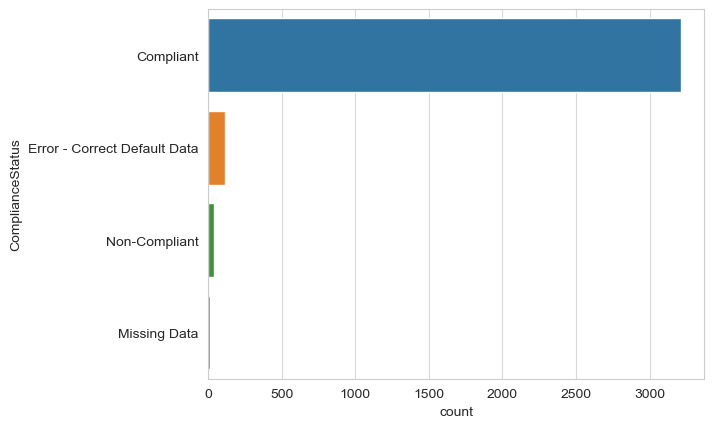

In [628]:
sns.countplot(y=df['ComplianceStatus'], order = df['ComplianceStatus'].value_counts().index)

We may filter out buildings with 'Error - Correct Default Data' and 'Missing Data' statuses

**Outlier**: Whether a property is a high or low outlier (Y/N). <br/>
It has only 32 non null values, it might be used to identify and handle the outliers.


<Axes: xlabel='Outlier', ylabel='count'>

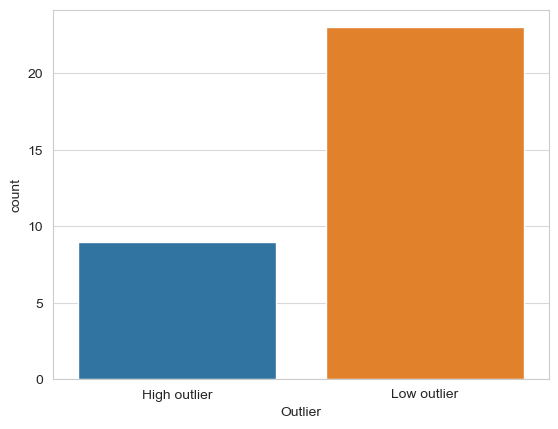

In [629]:
sns.countplot(x=df['Outlier'])

### ENERGYSTARScore

An EPA calculated 1-100 rating that assesses a property’s overall energy performance, based on national data to control for differences among climate, building uses, and operations. A score of 50 represents the national median.

This feature will be used in modelisation.

In [630]:
df['ENERGYSTARScore'].sample(20)

1697   77.0000
1596   93.0000
172    80.0000
2185   80.0000
613        NaN
956    97.0000
1829   34.0000
2602   79.0000
1756   10.0000
3126   84.0000
809        NaN
1641   99.0000
1379   89.0000
69         NaN
1257       NaN
26         NaN
2277   92.0000
922        NaN
2741       NaN
2760       NaN
Name: ENERGYSTARScore, dtype: float64

In [631]:
df['ENERGYSTARScore'].describe()

count   2533.0000
mean      67.9187
std       26.8733
min        1.0000
25%       53.0000
50%       75.0000
75%       90.0000
max      100.0000
Name: ENERGYSTARScore, dtype: float64

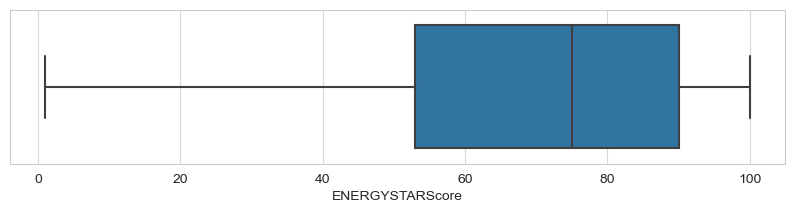

In [632]:
plt.figure(figsize=(10, 2))
sns.boxplot(x=df['ENERGYSTARScore'])
plt.show()

It is stated that the national median is 50, we get 75 for the city of Seattle.

In [458]:
df['ENERGYSTARScore'].isnull().sum()

843

# Filtering & Cleaning

At this step we will keep only non-residential buildings and buildings without errors/missing data as well as the most important columns.

## Non residential

We have 3 values for the non residential type:
- `NonResidential`
- `Nonresidential COS` # COS: Compulsory Open Space
- `Nonresidential WA` 

unable to find what `Nonresidential WA` stands for, Washington maybe? Let's check the primary property type associated

In [633]:
df.loc[df['BuildingType'] == 'Nonresidential WA', :]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
3359,50101,2016,Nonresidential WA,University,Burke Museum,4331 Memorial Way NE,Seattle,WA,98195.0000,1625049001,...,932244.6875,3180819.0000,0.0000,0.0000,False,NaN,Compliant,NaN,22.1700,0.3300


In [634]:
non_residential_types = [
    'NonResidential', 
    'Nonresidential COS',
    'Nonresidential WA'
]

df.loc[df['BuildingType'].isin(non_residential_types), :].groupby('BuildingType')['BuildingType'].count()

BuildingType
NonResidential        1460
Nonresidential COS      85
Nonresidential WA        1
Name: BuildingType, dtype: int64

In [635]:
df.loc[df['BuildingType'] == 'Nonresidential WA', :]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
3359,50101,2016,Nonresidential WA,University,Burke Museum,4331 Memorial Way NE,Seattle,WA,98195.0000,1625049001,...,932244.6875,3180819.0000,0.0000,0.0000,False,NaN,Compliant,NaN,22.1700,0.3300


In [636]:
df_filtered = df.loc[df['BuildingType'].isin(non_residential_types), :]
df_filtered

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0000,0659000030,...,1156514.2500,3946027.0000,12764.5293,1276453.0000,False,NaN,Compliant,NaN,249.9800,2.8300
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0000,0659000220,...,950425.1875,3242851.0000,51450.8164,5145082.0000,False,NaN,Compliant,NaN,295.8600,2.8600
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0000,0659000475,...,14515435.0000,49526664.0000,14938.0000,1493800.0000,False,NaN,Compliant,NaN,2089.2800,2.1900
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0000,0659000640,...,811525.3125,2768924.0000,18112.1309,1811213.0000,False,NaN,Compliant,NaN,286.4300,4.6700
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0000,0659000970,...,1573448.6250,5368607.0000,88039.9844,8803998.0000,False,NaN,Compliant,NaN,505.0100,2.8800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,2016,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,Seattle,WA,NaN,1624049080,...,153655.0000,524270.8600,3254.7502,325475.0244,True,NaN,Error - Correct Default Data,NaN,20.9400,1.7000
3372,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,Seattle,WA,NaN,3558300000,...,116221.0000,396546.0520,5537.2998,553729.9805,False,NaN,Compliant,NaN,32.1700,2.0100
3373,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,Seattle,WA,NaN,1794501150,...,525251.6875,1792158.7580,39737.3906,3973739.0630,False,NaN,Compliant,NaN,223.5400,16.9900
3374,50225,2016,Nonresidential COS,Mixed Use Property,South Park Community Center,8319 8th Ave S,Seattle,WA,NaN,7883603155,...,102248.0000,348870.1760,3706.0100,370601.0010,False,NaN,Compliant,NaN,22.1100,1.5700


In [637]:
df_filtered['PrimaryPropertyType'].unique()

array(['Hotel', 'Other', 'Mixed Use Property', 'University',
       'Small- and Mid-Sized Office', 'Self-Storage Facility',
       'Warehouse', 'K-12 School', 'Large Office',
       'Senior Care Community', 'Medical Office', 'Retail Store',
       'Hospital', 'Residence Hall', 'Distribution Center',
       'Worship Facility', 'Supermarket / Grocery Store', 'Laboratory',
       'Refrigerated Warehouse', 'Restaurant', 'Low-Rise Multifamily',
       'Office'], dtype=object)

"Low-Rise Multifamily" seems to be a residential type of building

In [638]:
df_filtered.loc[df_filtered['PrimaryPropertyType'] == 'Low-Rise Multifamily',
                ['BuildingType', 'PrimaryPropertyType', 'LargestPropertyUseType']]

,BuildingType,PrimaryPropertyType,LargestPropertyUseType
644,NonResidential,Low-Rise Multifamily,Multifamily Housing
2450,NonResidential,Low-Rise Multifamily,Multifamily Housing


Looks like an error, we'll drop these 2 values

In [639]:
df_filtered = df_filtered.loc[df_filtered['PrimaryPropertyType'] != 'Low-Rise Multifamily']
df_filtered

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0000,0659000030,...,1156514.2500,3946027.0000,12764.5293,1276453.0000,False,NaN,Compliant,NaN,249.9800,2.8300
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0000,0659000220,...,950425.1875,3242851.0000,51450.8164,5145082.0000,False,NaN,Compliant,NaN,295.8600,2.8600
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0000,0659000475,...,14515435.0000,49526664.0000,14938.0000,1493800.0000,False,NaN,Compliant,NaN,2089.2800,2.1900
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0000,0659000640,...,811525.3125,2768924.0000,18112.1309,1811213.0000,False,NaN,Compliant,NaN,286.4300,4.6700
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0000,0659000970,...,1573448.6250,5368607.0000,88039.9844,8803998.0000,False,NaN,Compliant,NaN,505.0100,2.8800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,2016,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,Seattle,WA,NaN,1624049080,...,153655.0000,524270.8600,3254.7502,325475.0244,True,NaN,Error - Correct Default Data,NaN,20.9400,1.7000
3372,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,Seattle,WA,NaN,3558300000,...,116221.0000,396546.0520,5537.2998,553729.9805,False,NaN,Compliant,NaN,32.1700,2.0100
3373,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,Seattle,WA,NaN,1794501150,...,525251.6875,1792158.7580,39737.3906,3973739.0630,False,NaN,Compliant,NaN,223.5400,16.9900
3374,50225,2016,Nonresidential COS,Mixed Use Property,South Park Community Center,8319 8th Ave S,Seattle,WA,NaN,7883603155,...,102248.0000,348870.1760,3706.0100,370601.0010,False,NaN,Compliant,NaN,22.1100,1.5700


## Compliance status

We will keep `Compliant` and `Non-Compliant` buildings. We should not penalise the non-compliant buildings as far as they have all the necessary information filled and no errors.

In [640]:
status_to_keep = ['Compliant', 'Non-Compliant']

df_filtered = df_filtered.loc[df_filtered['ComplianceStatus'].isin(status_to_keep), :]
df_filtered

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0000,0659000030,...,1156514.2500,3946027.0000,12764.5293,1276453.0000,False,NaN,Compliant,NaN,249.9800,2.8300
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0000,0659000220,...,950425.1875,3242851.0000,51450.8164,5145082.0000,False,NaN,Compliant,NaN,295.8600,2.8600
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0000,0659000475,...,14515435.0000,49526664.0000,14938.0000,1493800.0000,False,NaN,Compliant,NaN,2089.2800,2.1900
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0000,0659000640,...,811525.3125,2768924.0000,18112.1309,1811213.0000,False,NaN,Compliant,NaN,286.4300,4.6700
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0000,0659000970,...,1573448.6250,5368607.0000,88039.9844,8803998.0000,False,NaN,Compliant,NaN,505.0100,2.8800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3370,50221,2016,Nonresidential COS,Other,High Point Community Center,6920 34th Ave SW,Seattle,WA,NaN,2524039059,...,185334.7031,632362.0071,2997.2000,299719.9951,False,NaN,Compliant,NaN,20.3300,1.1100
3372,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,Seattle,WA,NaN,3558300000,...,116221.0000,396546.0520,5537.2998,553729.9805,False,NaN,Compliant,NaN,32.1700,2.0100
3373,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,Seattle,WA,NaN,1794501150,...,525251.6875,1792158.7580,39737.3906,3973739.0630,False,NaN,Compliant,NaN,223.5400,16.9900
3374,50225,2016,Nonresidential COS,Mixed Use Property,South Park Community Center,8319 8th Ave S,Seattle,WA,NaN,7883603155,...,102248.0000,348870.1760,3706.0100,370601.0010,False,NaN,Compliant,NaN,22.1100,1.5700


In [641]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1530 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    1530 non-null   int64  
 1   DataYear                         1530 non-null   int64  
 2   BuildingType                     1530 non-null   object 
 3   PrimaryPropertyType              1530 non-null   object 
 4   PropertyName                     1530 non-null   object 
 5   Address                          1530 non-null   object 
 6   City                             1530 non-null   object 
 7   State                            1530 non-null   object 
 8   ZipCode                          1517 non-null   float64
 9   TaxParcelIdentificationNumber    1530 non-null   object 
 10  CouncilDistrictCode              1530 non-null   int64  
 11  Neighborhood                     1530 non-null   object 
 12  Latitude            

## Outlier feature
At this stage it is difficult to judge if we should keep buildings having the `Outlier` value

In [642]:
df_filtered.loc[df_filtered['Outlier'].notnull(), :]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
226,350,2016,NonResidential,Large Office,Second And Spring Building,1100 Second Avenue,Seattle,WA,98101.0000,0942000045,...,11663150.0000,39794668.0000,16048.3096,1604831.0000,False,NaN,Non-Compliant,High outlier,362.6600,2.1000
384,539,2016,NonResidential,Retail Store,University Center,4501 Roosevelt Way NE,Seattle,WA,98105.0000,5335200380,...,93482.6016,318963.0000,0.0000,0.0000,False,NaN,Non-Compliant,Low outlier,2.2200,0.0300
448,608,2016,NonResidential,Large Office,411 1ST AVE S (ID608),411 1ST AVE S,Seattle,WA,98104.0000,5247800200,...,471503.0000,1608768.0000,3430.5005,343050.0000,False,NaN,Non-Compliant,Low outlier,29.4300,0.1900
517,704,2016,NonResidential,Large Office,401 Elliott Ave West,401 Elliot Ave West,Seattle,WA,98119.0000,7666202110,...,7953454.5000,27137187.0000,0.0000,0.0000,False,NaN,Non-Compliant,High outlier,189.1800,1.4600
1229,21315,2016,NonResidential,Small- and Mid-Sized Office,1518 Fifith Ave,1520 Fifth Ave,Seattle,WA,98101.0000,1975700135,...,7064.8999,24105.0000,0.0000,0.0000,False,NaN,Non-Compliant,Low outlier,0.1700,0.0000
1295,21474,2016,NonResidential,Other,The Lusty Lady,1315 1st Ave,Seattle,WA,98101.0000,1976200060,...,12981.7002,44294.0000,0.0000,0.0000,False,NaN,Non-Compliant,Low outlier,0.3100,0.0100
1611,22830,2016,NonResidential,Worship Facility,Freedom Church,9601 35th Ave,Seattle,WA,98126.0000,2858600090,...,29555.0000,100842.0000,0.0000,0.0000,False,NaN,Non-Compliant,Low outlier,0.7000,0.0300
1945,23912,2016,NonResidential,Small- and Mid-Sized Office,1416 S Jackson,1416 South Jackson Street,Seattle,WA,98133.0000,3320000165,...,41554.6016,141784.0000,1430.7299,143073.0000,False,NaN,Non-Compliant,Low outlier,8.5900,0.1900
2129,24547,2016,NonResidential,K-12 School,Islamic School of Seattle,720 25TH AVE,Seattle,WA,98122.0000,6840700175,...,47292.8984,161363.0000,0.0000,0.0000,False,NaN,Non-Compliant,Low outlier,1.1200,0.0500
2189,24717,2016,NonResidential,Other,1701 First Ave South LLC,1701 First Ave South,Seattle,WA,98134.0000,7666207085,...,4926.3999,16809.0000,0.0000,0.0000,False,NaN,Non-Compliant,Low outlier,0.1200,0.0000


It seems that buildings with the `Outlier` value filled have a `Non-Compliant` status

In [643]:
df_filtered.loc[df_filtered['Outlier'].notnull(), :].shape

(14, 46)

In [644]:
df_filtered.loc[df_filtered['ComplianceStatus'] == 'Non-Compliant', :].shape

(17, 46)

In [645]:
non_compliant_outlier_mask = (df_filtered['Outlier'].notnull()) & (
    df_filtered['ComplianceStatus'] == 'Non-Compliant')

df_filtered.loc[non_compliant_outlier_mask, :]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
226,350,2016,NonResidential,Large Office,Second And Spring Building,1100 Second Avenue,Seattle,WA,98101.0000,0942000045,...,11663150.0000,39794668.0000,16048.3096,1604831.0000,False,NaN,Non-Compliant,High outlier,362.6600,2.1000
384,539,2016,NonResidential,Retail Store,University Center,4501 Roosevelt Way NE,Seattle,WA,98105.0000,5335200380,...,93482.6016,318963.0000,0.0000,0.0000,False,NaN,Non-Compliant,Low outlier,2.2200,0.0300
448,608,2016,NonResidential,Large Office,411 1ST AVE S (ID608),411 1ST AVE S,Seattle,WA,98104.0000,5247800200,...,471503.0000,1608768.0000,3430.5005,343050.0000,False,NaN,Non-Compliant,Low outlier,29.4300,0.1900
517,704,2016,NonResidential,Large Office,401 Elliott Ave West,401 Elliot Ave West,Seattle,WA,98119.0000,7666202110,...,7953454.5000,27137187.0000,0.0000,0.0000,False,NaN,Non-Compliant,High outlier,189.1800,1.4600
1229,21315,2016,NonResidential,Small- and Mid-Sized Office,1518 Fifith Ave,1520 Fifth Ave,Seattle,WA,98101.0000,1975700135,...,7064.8999,24105.0000,0.0000,0.0000,False,NaN,Non-Compliant,Low outlier,0.1700,0.0000
1295,21474,2016,NonResidential,Other,The Lusty Lady,1315 1st Ave,Seattle,WA,98101.0000,1976200060,...,12981.7002,44294.0000,0.0000,0.0000,False,NaN,Non-Compliant,Low outlier,0.3100,0.0100
1611,22830,2016,NonResidential,Worship Facility,Freedom Church,9601 35th Ave,Seattle,WA,98126.0000,2858600090,...,29555.0000,100842.0000,0.0000,0.0000,False,NaN,Non-Compliant,Low outlier,0.7000,0.0300
1945,23912,2016,NonResidential,Small- and Mid-Sized Office,1416 S Jackson,1416 South Jackson Street,Seattle,WA,98133.0000,3320000165,...,41554.6016,141784.0000,1430.7299,143073.0000,False,NaN,Non-Compliant,Low outlier,8.5900,0.1900
2129,24547,2016,NonResidential,K-12 School,Islamic School of Seattle,720 25TH AVE,Seattle,WA,98122.0000,6840700175,...,47292.8984,161363.0000,0.0000,0.0000,False,NaN,Non-Compliant,Low outlier,1.1200,0.0500
2189,24717,2016,NonResidential,Other,1701 First Ave South LLC,1701 First Ave South,Seattle,WA,98134.0000,7666207085,...,4926.3999,16809.0000,0.0000,0.0000,False,NaN,Non-Compliant,Low outlier,0.1200,0.0000


So all the buildings with an Outlier value filled are non-compliant. We can remove them.

In [646]:
df_filtered = df_filtered.loc[~non_compliant_outlier_mask, :]
df_filtered

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0000,0659000030,...,1156514.2500,3946027.0000,12764.5293,1276453.0000,False,NaN,Compliant,NaN,249.9800,2.8300
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0000,0659000220,...,950425.1875,3242851.0000,51450.8164,5145082.0000,False,NaN,Compliant,NaN,295.8600,2.8600
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0000,0659000475,...,14515435.0000,49526664.0000,14938.0000,1493800.0000,False,NaN,Compliant,NaN,2089.2800,2.1900
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0000,0659000640,...,811525.3125,2768924.0000,18112.1309,1811213.0000,False,NaN,Compliant,NaN,286.4300,4.6700
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0000,0659000970,...,1573448.6250,5368607.0000,88039.9844,8803998.0000,False,NaN,Compliant,NaN,505.0100,2.8800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3370,50221,2016,Nonresidential COS,Other,High Point Community Center,6920 34th Ave SW,Seattle,WA,NaN,2524039059,...,185334.7031,632362.0071,2997.2000,299719.9951,False,NaN,Compliant,NaN,20.3300,1.1100
3372,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,Seattle,WA,NaN,3558300000,...,116221.0000,396546.0520,5537.2998,553729.9805,False,NaN,Compliant,NaN,32.1700,2.0100
3373,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,Seattle,WA,NaN,1794501150,...,525251.6875,1792158.7580,39737.3906,3973739.0630,False,NaN,Compliant,NaN,223.5400,16.9900
3374,50225,2016,Nonresidential COS,Mixed Use Property,South Park Community Center,8319 8th Ave S,Seattle,WA,NaN,7883603155,...,102248.0000,348870.1760,3706.0100,370601.0010,False,NaN,Compliant,NaN,22.1100,1.5700


Check the other Non Compliant entries

In [647]:
df_filtered.loc[df_filtered['ComplianceStatus'] == 'Non-Compliant', :]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
304,435,2016,NonResidential,Other,Washington State Convention Center,705 Pike St,Seattle,WA,98101.0000,1978200105,...,0.0000,0.0000,0.0000,0.0000,False,NaN,Non-Compliant,NaN,0.0000,0.0000
578,773,2016,NonResidential,Small- and Mid-Sized Office,SEATTLE BUILDING,215 COLUMBIA ST,Seattle,WA,98104.0000,0939000245,...,NaN,NaN,NaN,NaN,False,NaN,Non-Compliant,NaN,NaN,NaN
2670,26532,2016,NonResidential,Mixed Use Property,KALBERG BUILDING,4515 UNIVERSITY WAY NE,Seattle,WA,98105.0000,8816401120,...,NaN,NaN,NaN,NaN,False,NaN,Non-Compliant,NaN,NaN,NaN


In [648]:
df_filtered.loc[df_filtered['ComplianceStatus'] == 'Non-Compliant', 'SiteEUI(kBtu/sf)':'GHGEmissionsIntensity']

,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
304,NaN,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,False,NaN,Non-Compliant,NaN,0.0000,0.0000
578,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,Non-Compliant,NaN,NaN,NaN
2670,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,Non-Compliant,NaN,NaN,NaN


Remove those values

In [650]:
df_filtered = df_filtered.loc[df_filtered['ComplianceStatus'] == 'Compliant', :]

In [651]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1513 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    1513 non-null   int64  
 1   DataYear                         1513 non-null   int64  
 2   BuildingType                     1513 non-null   object 
 3   PrimaryPropertyType              1513 non-null   object 
 4   PropertyName                     1513 non-null   object 
 5   Address                          1513 non-null   object 
 6   City                             1513 non-null   object 
 7   State                            1513 non-null   object 
 8   ZipCode                          1500 non-null   float64
 9   TaxParcelIdentificationNumber    1513 non-null   object 
 10  CouncilDistrictCode              1513 non-null   int64  
 11  Neighborhood                     1513 non-null   object 
 12  Latitude            

## Handling null targets

Let's check if all the buildings have non null and > 0 values for the targets and see if we can fill them with the existing values. 

In [652]:
df_filtered.loc[((df_filtered['TotalGHGEmissions'].isnull()) | (df_filtered['TotalGHGEmissions'] == 0)) |
                ((df_filtered['SiteEnergyUseWN(kBtu)'].isnull()) | (df_filtered['SiteEnergyUseWN(kBtu)'] == 0)),
                'SiteEUI(kBtu/sf)':'GHGEmissionsIntensity']

,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
220,105.2000,0.0000,240.9000,0.0000,24906132.0000,0.0000,10921066.0000,4098787.7500,13985064.0000,0.0000,0.0000,False,NaN,Compliant,NaN,940.4700,2.4800
247,73.0000,0.0000,227.9000,0.0000,26823218.0000,0.0000,0.0000,7796691.0000,26602310.0000,2209.0500,220905.0000,False,NaN,Compliant,NaN,197.1900,0.4000
284,43.4000,0.0000,92.3000,0.0000,5446624.0000,0.0000,2850077.7500,761004.1250,2596546.0000,0.0000,0.0000,False,NaN,Compliant,NaN,238.0900,1.5800
350,50.0000,0.0000,157.0000,0.0000,3484915.5000,0.0000,0.0000,1021370.1880,3484915.0000,0.0000,0.0000,False,NaN,Compliant,NaN,24.2900,0.2800
513,208.8000,214.1000,0.0000,0.0000,12525174.0000,12843856.0000,0.0000,0.0000,0.0000,0.0000,0.0000,False,NaN,Compliant,NaN,0.0000,0.0000
563,39.5000,NaN,128.0000,0.0000,5177270.5000,NaN,0.0000,1427645.2500,4871126.0000,14160.4092,1416041.0000,False,NaN,Compliant,NaN,109.1600,0.8300
882,20.7000,0.0000,36.4000,0.0000,496477.3125,0.0000,0.0000,48966.8984,167075.0000,3294.0217,329402.0000,False,NaN,Compliant,NaN,18.6600,0.7800
953,37.6000,0.0000,89.0000,0.0000,1128179.1250,0.0000,0.0000,208229.2969,710478.0000,4177.0078,417701.0000,False,NaN,Compliant,NaN,27.1400,0.8600
3275,85.1000,0.0000,221.0000,0.0000,5000717.0000,0.0000,0.0000,1090040.1250,3719217.0000,0.0000,0.0000,False,NaN,Compliant,NaN,25.9300,0.4400
3277,252.0000,0.0000,561.0000,0.0000,51168308.0000,0.0000,0.0000,8386463.5000,28614613.0000,0.0000,0.0000,False,NaN,Compliant,NaN,199.4800,0.9800


Set to NaN the 0 values to make the replacements easier (do it for the EDA purpose only, the 0 values will be removed for the modelisation)

In [653]:
df_filtered.loc[df_filtered['SiteEUIWN(kBtu/sf)'] == 0,
                'SiteEUIWN(kBtu/sf)'] = np.nan
df_filtered.loc[df_filtered['SourceEUI(kBtu/sf)'] == 0,
                'SourceEUI(kBtu/sf)'] = np.nan
df_filtered.loc[df_filtered['SourceEUIWN(kBtu/sf)'] == 0,
                'SourceEUIWN(kBtu/sf)'] = np.nan
df_filtered.loc[df_filtered['SiteEnergyUseWN(kBtu)'] == 0,
                'SiteEnergyUseWN(kBtu)'] = np.nan

df_filtered.loc[((df_filtered['SourceEUIWN(kBtu/sf)'].isnull()) | (df_filtered['SourceEUIWN(kBtu/sf)'] == 0)) |
    ((df_filtered['SiteEnergyUseWN(kBtu)'].isnull()) |
                 (df_filtered['SiteEnergyUseWN(kBtu)'] == 0)),
                'SiteEUI(kBtu/sf)':'GHGEmissionsIntensity']

,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
220,105.2000,NaN,240.9000,NaN,24906132.0000,NaN,10921066.0000,4098787.7500,13985064.0000,0.0000,0.0000,False,NaN,Compliant,NaN,940.4700,2.4800
247,73.0000,NaN,227.9000,NaN,26823218.0000,NaN,0.0000,7796691.0000,26602310.0000,2209.0500,220905.0000,False,NaN,Compliant,NaN,197.1900,0.4000
284,43.4000,NaN,92.3000,NaN,5446624.0000,NaN,2850077.7500,761004.1250,2596546.0000,0.0000,0.0000,False,NaN,Compliant,NaN,238.0900,1.5800
350,50.0000,NaN,157.0000,NaN,3484915.5000,NaN,0.0000,1021370.1880,3484915.0000,0.0000,0.0000,False,NaN,Compliant,NaN,24.2900,0.2800
513,208.8000,214.1000,NaN,NaN,12525174.0000,12843856.0000,0.0000,0.0000,0.0000,0.0000,0.0000,False,NaN,Compliant,NaN,0.0000,0.0000
563,39.5000,NaN,128.0000,NaN,5177270.5000,NaN,0.0000,1427645.2500,4871126.0000,14160.4092,1416041.0000,False,NaN,Compliant,NaN,109.1600,0.8300
882,20.7000,NaN,36.4000,NaN,496477.3125,NaN,0.0000,48966.8984,167075.0000,3294.0217,329402.0000,False,NaN,Compliant,NaN,18.6600,0.7800
953,37.6000,NaN,89.0000,NaN,1128179.1250,NaN,0.0000,208229.2969,710478.0000,4177.0078,417701.0000,False,NaN,Compliant,NaN,27.1400,0.8600
2791,89.2000,90.9000,NaN,NaN,4729846.5000,4821852.0000,0.0000,387981.3125,1323792.0000,0.0000,0.0000,False,NaN,Compliant,NaN,9.2300,0.1900
3275,85.1000,NaN,221.0000,NaN,5000717.0000,NaN,0.0000,1090040.1250,3719217.0000,0.0000,0.0000,False,NaN,Compliant,NaN,25.9300,0.4400


Take the non WN values for the energy consumption metrics equal to 0 (for the buildings having `SiteEnergyUseWN(kBtu)` = 0 and `SiteEnergyUse(kBtu)` > 0, take `SiteEnergyUse(kBtu)`, same for `SiteEUIWN(kBtu/sf)` and `SiteEUI(kBtu/sf)`)

In [654]:
df_filtered['SiteEUIWN(kBtu/sf)'] = df_filtered['SiteEUIWN(kBtu/sf)'].fillna(
    df_filtered['SiteEUI(kBtu/sf)'])

# take the SiteEUI value for the SourceEUI as SiteEUI is part of SourceEUI
df_filtered['SourceEUI(kBtu/sf)'] = df_filtered[
    'SourceEUI(kBtu/sf)'].fillna(df_filtered['SiteEUI(kBtu/sf)'])

df_filtered['SourceEUIWN(kBtu/sf)'] = df_filtered[
    'SourceEUIWN(kBtu/sf)'].fillna(df_filtered['SourceEUI(kBtu/sf)'])

# fill the target WN normalized with non WN
df_filtered['SiteEnergyUseWN(kBtu)'] = df_filtered[
    'SiteEnergyUseWN(kBtu)'].fillna(df_filtered['SiteEnergyUse(kBtu)'])

df_filtered.loc[((df_filtered['SourceEUIWN(kBtu/sf)'].isnull()) | (df_filtered['SourceEUIWN(kBtu/sf)'] == 0)) |
    ((df_filtered['SiteEnergyUseWN(kBtu)'].isnull()) |
                 (df_filtered['SiteEnergyUseWN(kBtu)'] == 0)),
                'SiteEUI(kBtu/sf)':'GHGEmissionsIntensity']

,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity


In [655]:
df_filtered.loc[(df_filtered['TotalGHGEmissions'] == 0) |
                (df_filtered['SiteEnergyUseWN(kBtu)'] == 0),
                'SiteEUI(kBtu/sf)':'GHGEmissionsIntensity']

,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
513,208.8000,214.1000,208.8000,208.8000,12525174.0000,12843856.0000,0.0000,0.0000,0.0000,0.0000,0.0000,False,NaN,Compliant,NaN,0.0000,0.0000


The CO2 emissions metrics are equal to 0 and we only have information about the total energy consumption without the details, let's remove this item.

In [656]:
df_filtered = df_filtered.loc[df_filtered['TotalGHGEmissions'] > 0, :]
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1511 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    1511 non-null   int64  
 1   DataYear                         1511 non-null   int64  
 2   BuildingType                     1511 non-null   object 
 3   PrimaryPropertyType              1511 non-null   object 
 4   PropertyName                     1511 non-null   object 
 5   Address                          1511 non-null   object 
 6   City                             1511 non-null   object 
 7   State                            1511 non-null   object 
 8   ZipCode                          1498 non-null   float64
 9   TaxParcelIdentificationNumber    1511 non-null   object 
 10  CouncilDistrictCode              1511 non-null   int64  
 11  Neighborhood                     1511 non-null   object 
 12  Latitude            

## Handling outliers

We observed a certain number of outliers in the preliminary exploration in the ressources and surface features

In [657]:
numeric_columns = df_filtered.select_dtypes(include = ['int64','float64']).columns.tolist()
numeric_columns

['OSEBuildingID',
 'DataYear',
 'ZipCode',
 'CouncilDistrictCode',
 'Latitude',
 'Longitude',
 'YearBuilt',
 'NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'LargestPropertyUseTypeGFA',
 'SecondLargestPropertyUseTypeGFA',
 'ThirdLargestPropertyUseTypeGFA',
 'ENERGYSTARScore',
 'SiteEUI(kBtu/sf)',
 'SiteEUIWN(kBtu/sf)',
 'SourceEUI(kBtu/sf)',
 'SourceEUIWN(kBtu/sf)',
 'SiteEnergyUse(kBtu)',
 'SiteEnergyUseWN(kBtu)',
 'SteamUse(kBtu)',
 'Electricity(kWh)',
 'Electricity(kBtu)',
 'NaturalGas(therms)',
 'NaturalGas(kBtu)',
 'Comments',
 'TotalGHGEmissions',
 'GHGEmissionsIntensity']

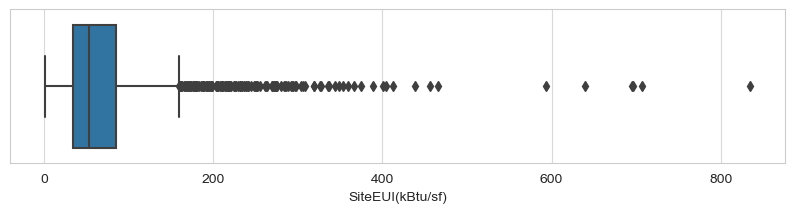

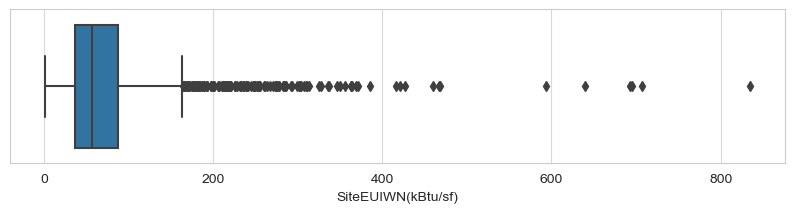

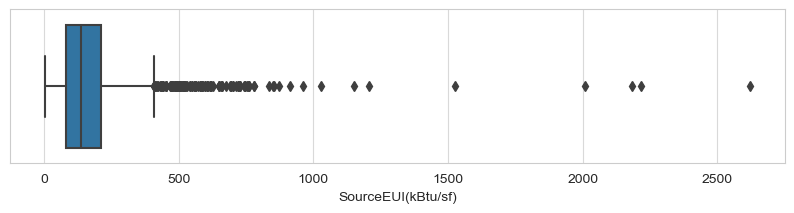

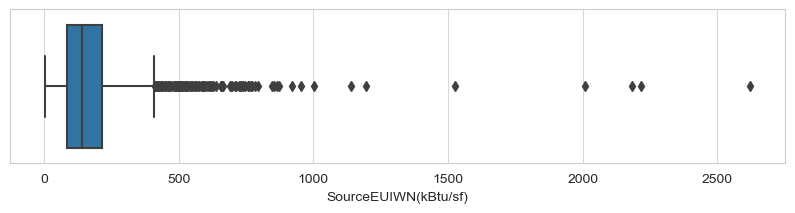

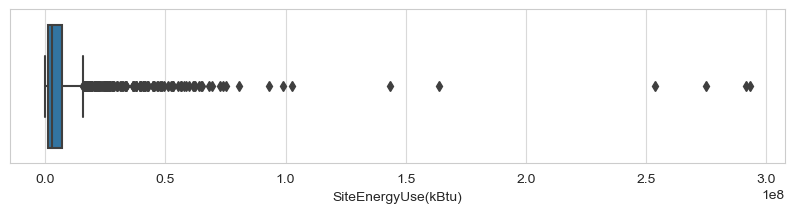

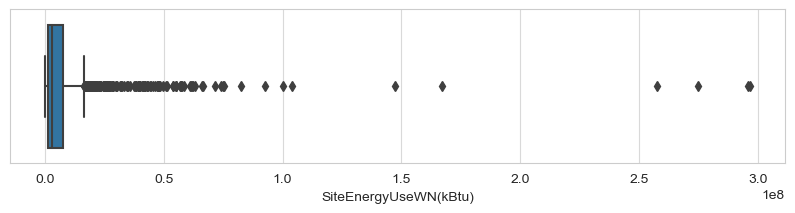

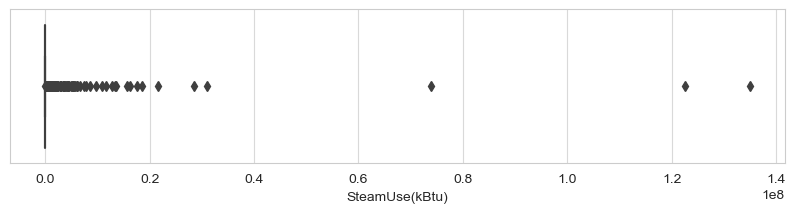

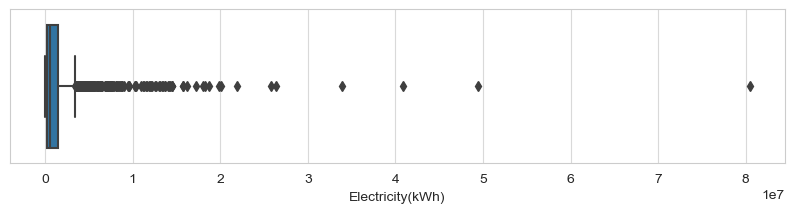

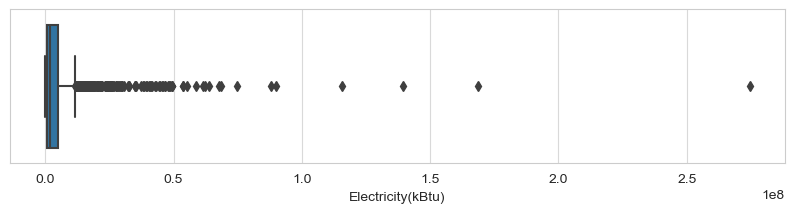

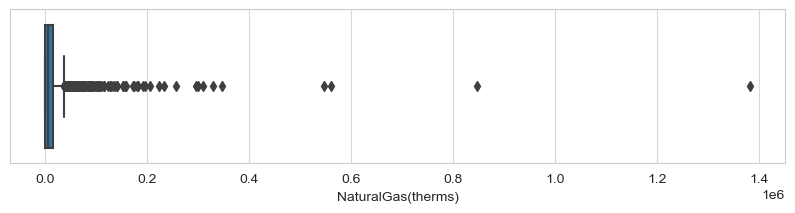

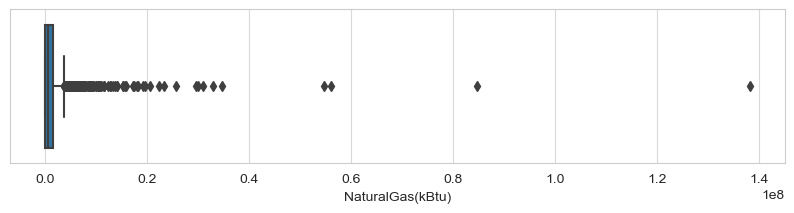

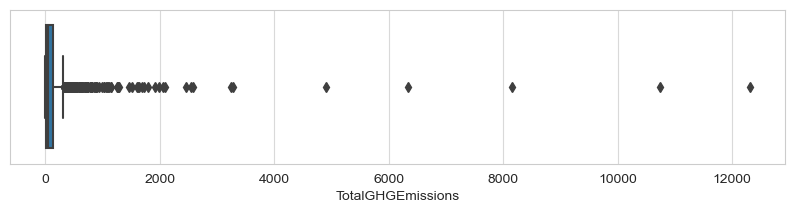

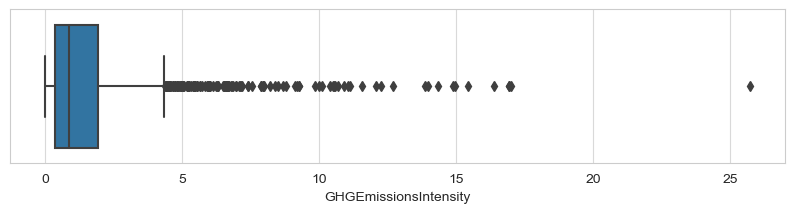

In [658]:
columns_with_outliers = [
    'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)',
    'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)',
    'SteamUse(kBtu)', 'Electricity(kWh)', 'Electricity(kBtu)',
    'NaturalGas(therms)', 'NaturalGas(kBtu)', 'TotalGHGEmissions',
    'GHGEmissionsIntensity'
]

for feature in columns_with_outliers:

    plt.figure(figsize=(10, 2))

    sns.boxplot(x=df_filtered[feature])

    plt.show()

Test different approaches to remove outliers and pick the best suited one.

In [659]:
for feature in columns_with_outliers:
    max_value = df_filtered[feature].max()

    # calc the upper quantile
    upper_limit_q = round(df_filtered[feature].quantile(q=0.99), 2)

    # calc the IQR
    q1 = df_filtered[feature].quantile(q=0.25)
    q3 = df_filtered[feature].quantile(q=0.75)
    IQR = q3 - q1

    upper_limit_IQR = round(q3 + 1.5 * IQR, 4)

    # test different factors k
    k = 5
    upper_limit_IQR_k = round(q3 + k * IQR, 4)

    print(
        f'{feature :-<25} max: {max_value} | upper: {upper_limit_q} | upper IQR: {upper_limit_IQR} | IQR k=5: {upper_limit_IQR_k}'
    )

SiteEUI(kBtu/sf)--------- max: 834.4000244 | upper: 359.1 | upper IQR: 159.5 | IQR k=5: 334.15
SiteEUIWN(kBtu/sf)------- max: 834.4000244 | upper: 363.57 | upper IQR: 163.825 | IQR k=5: 341.1
SourceEUI(kBtu/sf)------- max: 2620.0 | upper: 779.12 | upper IQR: 407.55 | IQR k=5: 864.3
SourceEUIWN(kBtu/sf)----- max: 2620.0 | upper: 781.83 | upper IQR: 409.7 | IQR k=5: 861.9
SiteEnergyUse(kBtu)------ max: 293090784.0 | upper: 65308010.4 | upper IQR: 15796491.2188 | IQR k=5: 36184736.0625
SiteEnergyUseWN(kBtu)---- max: 296671744.0 | upper: 65717548.0 | upper IQR: 16438501.4688 | IQR k=5: 37605338.8125
SteamUse(kBtu)----------- max: 134943456.0 | upper: 9650359.1 | upper IQR: 0.0 | IQR k=5: 0.0
Electricity(kWh)--------- max: 80460872.0 | upper: 15565221.1 | upper IQR: 3442904.7812 | IQR k=5: 7964844.625
Electricity(kBtu)-------- max: 274532495.0 | upper: 53108534.4 | upper IQR: 11747191.25 | IQR k=5: 27176050.5
NaturalGas(therms)------- max: 1381912.375 | upper: 181197.85 | upper IQR: 36413.1

Cap the extreme values on the max side to the .99 quantile

In [660]:
for feature in columns_with_outliers:
    upper_limit_q = round(df_filtered[feature].quantile(q=0.99), 4)
    
    df_filtered.loc[df_filtered[feature] > upper_limit_q, feature] = upper_limit_q

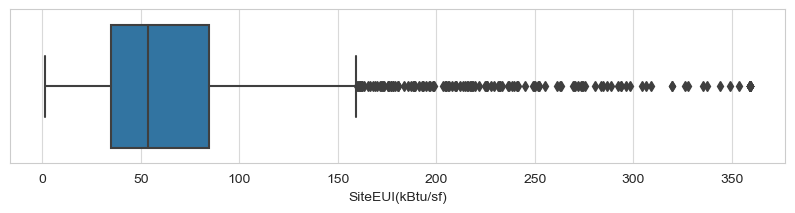

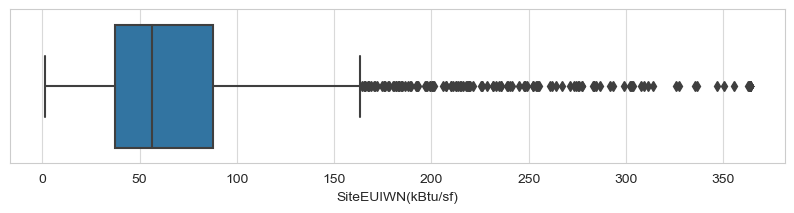

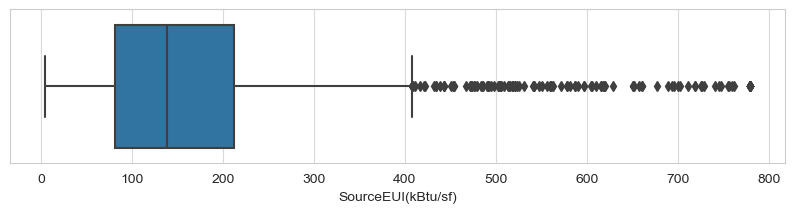

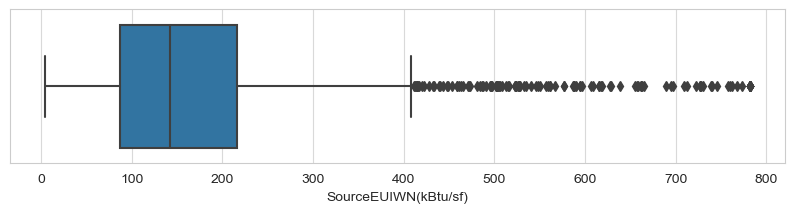

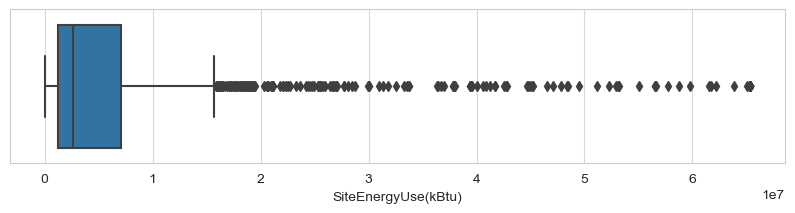

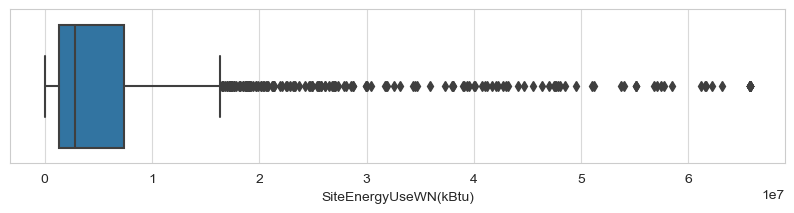

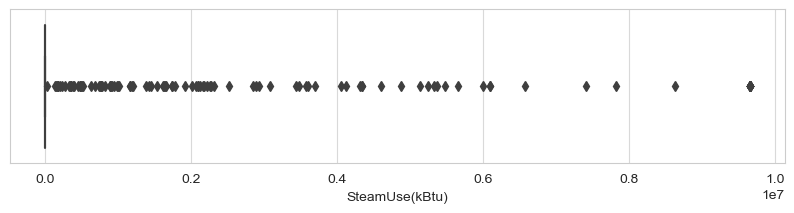

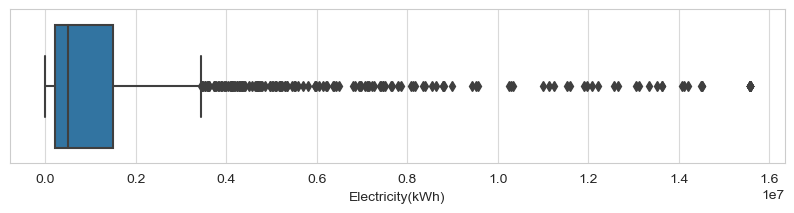

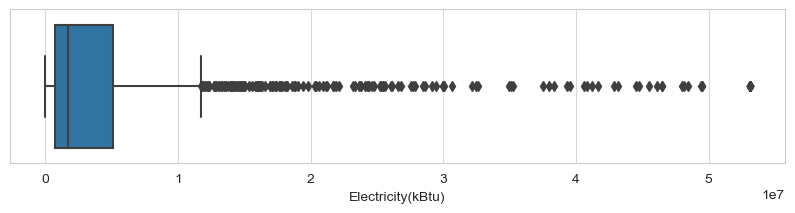

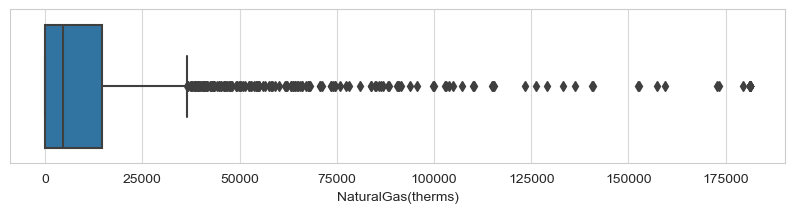

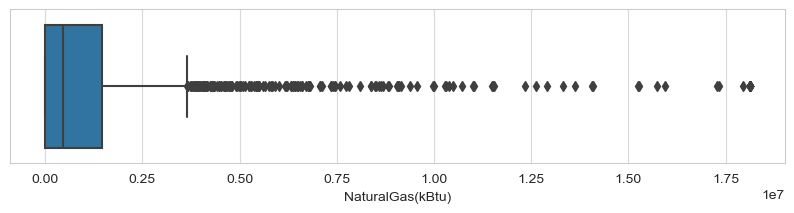

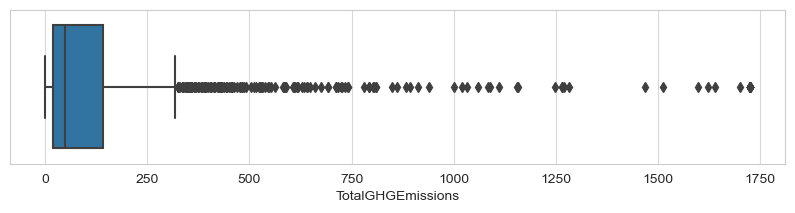

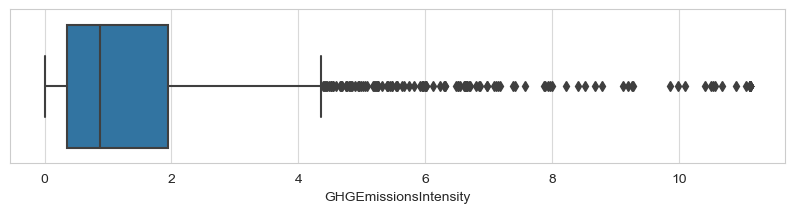

In [661]:
for feature in columns_with_outliers:
    plt.figure(figsize=(10, 2))

    sns.boxplot(x=df_filtered[feature])

    plt.show()

In [662]:
df_filtered[columns_with_outliers].describe()

,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
count,1511.0000,1511.0000,1511.0000,1511.0000,1511.0000,1511.0000,1511.0000,1511.0000,1511.0000,1511.0000,1511.0000,1511.0000,1511.0000
mean,73.1782,76.0518,177.8367,181.2654,6954374.5226,7126760.1064,242155.8360,1482643.7298,5058780.4077,14710.9724,1471097.2450,140.9204,1.5936
std,65.2595,66.3378,150.1691,150.1848,11388540.1508,11462263.0707,1223333.7611,2618478.8261,8934249.7452,28669.2621,2866926.1956,259.8346,2.0116
min,1.4000,1.5000,4.5000,4.6000,57133.1992,58114.1992,0.0000,0.0000,0.0000,0.0000,0.0000,0.4000,0.0100
25%,34.7500,37.2000,81.3000,86.7000,1233459.1875,1319331.9375,0.0000,212947.7500,726577.5000,0.0000,0.0000,20.1100,0.3500
50%,53.6000,56.3000,138.7000,142.5000,2669564.2500,2811924.5000,0.0000,498235.5000,1699980.0000,4621.9370,462194.0000,49.2800,0.8800
75%,84.6500,87.8500,211.8000,215.9000,7058672.0000,7366999.7500,0.0000,1504930.5625,5134823.0000,14565.2749,1456527.5000,141.5750,1.9500
max,359.1000,363.5700,779.1200,781.8300,65308010.4000,65717548.0000,9650359.1000,15565221.1000,53108534.4000,181197.8547,18119785.2000,1724.3440,11.1140


## Fixing values

### Neighborhood

Rename the duplicated values

In [663]:
df_filtered['Neighborhood'].unique()

array(['DOWNTOWN', 'NORTHEAST', 'EAST', 'LAKE UNION', 'GREATER DUWAMISH',
       'BALLARD', 'NORTHWEST', 'MAGNOLIA / QUEEN ANNE', 'CENTRAL',
       'SOUTHWEST', 'SOUTHEAST', 'NORTH', 'DELRIDGE', 'North', 'Delridge',
       'Ballard', 'Northwest', 'Central', 'DELRIDGE NEIGHBORHOODS'],
      dtype=object)

In [664]:
neighborhood_replace_dict = {
    'Delridge': 'DELRIDGE',
    'DELRIDGE NEIGHBORHOODS': 'DELRIDGE',
    'Central': 'CENTRAL',
    'Northwest': 'NORTHWEST',
    'Ballard': 'BALLARD',
    'North': 'NORTH'
}

df_filtered = df_filtered.replace({'Neighborhood': neighborhood_replace_dict})
df_filtered['Neighborhood'].unique()

array(['DOWNTOWN', 'NORTHEAST', 'EAST', 'LAKE UNION', 'GREATER DUWAMISH',
       'BALLARD', 'NORTHWEST', 'MAGNOLIA / QUEEN ANNE', 'CENTRAL',
       'SOUTHWEST', 'SOUTHEAST', 'NORTH', 'DELRIDGE'], dtype=object)

### Structure

For the number of buildings and number of floors: replace 0 values with 1 (in the US floor numbering convention the ground floor is the 1st floor, so all the buildings should at least have 1 floor)

In [665]:
df_filtered.loc[df_filtered['NumberofBuildings'] == 0, :].shape

(52, 46)

In [666]:
df_filtered.loc[df_filtered['NumberofBuildings'] == 0, 'NumberofBuildings'] = 1
df_filtered.loc[df_filtered['NumberofBuildings'] == 0, :].shape

(0, 46)

In [667]:
df_filtered.loc[df_filtered['NumberofFloors'] == 0, :].shape

(14, 46)

In [668]:
df_filtered.loc[df_filtered['NumberofFloors'] == 0, 'NumberofFloors'] = 1
df_filtered.loc[df_filtered['NumberofFloors'] == 0, :].shape

(0, 46)

### Surface

Check if the park surface is not greater than the total surface

In [669]:
df_filtered.loc[df_filtered['PropertyGFAParking'] > df_filtered['PropertyGFATotal'], :].shape

(0, 46)

Check for the 0 values

In [670]:
df_filtered.sort_values('PropertyGFATotal')[['PropertyGFATotal', 'PropertyGFAParking']].head(10)

,PropertyGFATotal,PropertyGFAParking
3363,11285,0
3361,11685,0
3362,11968,0
3365,12769,0
3373,13157,0
3374,14101,0
3372,16000,0
2246,16300,0
3364,16795,0
3375,18258,0


In [671]:
df_filtered.sort_values('PropertyGFATotal', ascending=False)[[
    'PropertyGFATotal', 'PropertyGFAParking'
]].head(10)

,PropertyGFATotal,PropertyGFAParking
559,1952220,319400
618,1765970,0
292,1605578,389860
490,1592914,0
155,1585960,327680
273,1536606,512608
271,1400000,285000
477,1380959,0
233,1354987,159600
221,1323055,0


The highest values are atypical but look consistent

# Feature transformation

## Ressources

We have the summary of the different sources of energy consumed annualy but we need to know what they represent proportionally to the total amount of energy consumed, let's calculate the rate of each source of energy (electricity, natural gas, steam).

In [672]:
def calc_percentage(value, total, shouldRound=True):
    percentage = value / total * 100

    return round(percentage) if shouldRound else percentage


df_filtered.insert(
    36, 'SteamUse(pct)',
    calc_percentage(df_filtered['SteamUse(kBtu)'],
                    df_filtered['SiteEnergyUseWN(kBtu)']))

df_filtered.insert(
    39, 'Electricity(pct)',
    calc_percentage(df_filtered['Electricity(kBtu)'],
                    df_filtered['SiteEnergyUseWN(kBtu)']))

df_filtered.insert(
    42, 'NaturalGas(pct)',
    calc_percentage(df_filtered['NaturalGas(kBtu)'],
                    df_filtered['SiteEnergyUseWN(kBtu)']))


df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1511 entries, 0 to 3375
Data columns (total 49 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    1511 non-null   int64  
 1   DataYear                         1511 non-null   int64  
 2   BuildingType                     1511 non-null   object 
 3   PrimaryPropertyType              1511 non-null   object 
 4   PropertyName                     1511 non-null   object 
 5   Address                          1511 non-null   object 
 6   City                             1511 non-null   object 
 7   State                            1511 non-null   object 
 8   ZipCode                          1498 non-null   float64
 9   TaxParcelIdentificationNumber    1511 non-null   object 
 10  CouncilDistrictCode              1511 non-null   int64  
 11  Neighborhood                     1511 non-null   object 
 12  Latitude            

In [673]:
df_filtered[[
    'SteamUse(kBtu)', 'SteamUse(pct)', 'Electricity(pct)', 'Electricity(kBtu)',
    'NaturalGas(pct)', 'NaturalGas(kBtu)', 'SiteEnergyUseWN(kBtu)'
]].sample(20)

,SteamUse(kBtu),SteamUse(pct),Electricity(pct),Electricity(kBtu),NaturalGas(pct),NaturalGas(kBtu),SiteEnergyUseWN(kBtu)
353,0.0000,0.0000,49.0000,3007514.0000,44.0000,2689958.0000,6076957.0000
221,0.0000,0.0000,100.0000,44521844.0000,0.0000,161812.0000,44683660.0000
657,0.0000,0.0000,96.0000,1618916.0000,0.0000,0.0000,1692054.1250
98,0.0000,0.0000,74.0000,35237205.0000,38.0000,18119785.2000,47602720.0000
2025,0.0000,0.0000,100.0000,526753.0000,0.0000,0.0000,526752.8125
229,0.0000,0.0000,81.0000,38378889.0000,14.0000,6784415.0000,47518124.0000
3356,0.0000,0.0000,58.0000,23636804.0000,38.0000,15727308.0000,41078600.0000
2034,0.0000,0.0000,62.0000,592096.0000,26.0000,251981.0000,956406.3750
2637,0.0000,0.0000,41.0000,524385.0000,57.0000,719765.0000,1269576.0000
2512,0.0000,0.0000,22.0000,542327.0000,70.0000,1724655.0000,2447325.5000


## Parking area

The `PropertyGFAParking` is totally useless without knowing the total surface of the building, we can consider transforming it into the percentage of surface occupied by the park area, let's name it `PropertyPctParking`

In [674]:
df_filtered.insert(
    19, 'PropertyPctParking',
    calc_percentage(df_filtered['PropertyGFAParking'],
                    df_filtered['PropertyGFATotal']))

df_filtered[['PropertyGFATotal', 'PropertyGFAParking',
             'PropertyPctParking']].sample(20)

,PropertyGFATotal,PropertyGFAParking,PropertyPctParking
200,203504,0,0.0000
1227,75058,34510,46.0000
2614,27600,0,0.0000
1293,25920,0,0.0000
3198,67263,0,0.0000
326,134056,60960,45.0000
963,84116,26497,32.0000
689,33589,0,0.0000
1326,21128,0,0.0000
556,378002,116280,31.0000


## Year built
The year range is quite big (from 1900 to 2015), we can simplify it by transforming the years to decades

In [675]:
decades = df_filtered['YearBuilt']//10*10

decades

0       1920
1       1990
2       1960
3       1920
4       1980
        ... 
3370    1980
3372    2000
3373    1970
3374    1980
3375    1930
Name: YearBuilt, Length: 1511, dtype: int64

In [676]:
df_filtered.insert(15, 'DecadeBuilt', decades)
df_filtered[['YearBuilt', 'DecadeBuilt']].sample(20)

,YearBuilt,DecadeBuilt
2996,1996,1990
3261,1925,1920
154,1900,1900
2324,1959,1950
602,2000,2000
2835,2000,2000
77,2010,2010
1497,1957,1950
560,1981,1980
1877,1969,1960


## PrimaryPropertyType
We can create a new column to group some property types together to make the analysis easier 

In [677]:
df_filtered['PrimaryPropertyType'].unique()

array(['Hotel', 'Other', 'Mixed Use Property', 'University',
       'Small- and Mid-Sized Office', 'Self-Storage Facility',
       'Warehouse', 'K-12 School', 'Large Office',
       'Senior Care Community', 'Medical Office', 'Retail Store',
       'Hospital', 'Residence Hall', 'Distribution Center',
       'Worship Facility', 'Supermarket / Grocery Store', 'Laboratory',
       'Refrigerated Warehouse', 'Restaurant'], dtype=object)

In [678]:
df_filtered['PrimaryPropertyType'].value_counts()

Small- and Mid-Sized Office    285
Other                          236
Warehouse                      185
Large Office                   168
Mixed Use Property             109
Retail Store                    85
Hotel                           75
Worship Facility                69
Distribution Center             53
Supermarket / Grocery Store     39
Medical Office                  39
K-12 School                     38
Self-Storage Facility           28
Residence Hall                  21
Senior Care Community           20
University                      18
Refrigerated Warehouse          12
Restaurant                      11
Hospital                        10
Laboratory                      10
Name: PrimaryPropertyType, dtype: int64

There might be a confusion as whether properties like 'Hotel', 'Residence Hall', 'Senior Care Community' should be considered as residential types, however, according the [definition of non-residential accomodation](https://www.thebusinessresearchcompany.com/report/non-residential-accommodation-services-global-market-report) these properties belong to the non residential category

In [679]:
property_type_dict = {
    # Office
    'Small- and Mid-Sized Office': 'Office',
    'Large Office': 'Office',
    
    # Medical facilities
    'Medical Office': 'Medical facility',
    'Hospital': 'Medical facility',
    'Laboratory': 'Medical facility',
    
    # School
    'K-12 School': 'School',
    'University': 'School',
    
    # Storage facility
    'Self-Storage Facility': 'Storage facility',
    'Warehouse': 'Storage facility',
    'Distribution Center': 'Storage facility',
    'Refrigerated Warehouse': 'Storage facility',
    
    # Store
    'Retail Store': 'Store',
    'Supermarket / Grocery Store': 'Store',
    
    # Accommodation service
    'Hotel': 'Accommodation service',
    'Senior Care Community': 'Accommodation service',
    'Residence Hall': 'Accommodation service'
}

In [680]:
df_filtered['GenericPropertyType'] = df_filtered['PrimaryPropertyType']

df_filtered = df_filtered.replace({'GenericPropertyType': property_type_dict})
df_filtered['GenericPropertyType'].unique()

array(['Accommodation service', 'Other', 'Mixed Use Property', 'School',
       'Office', 'Storage facility', 'Medical facility', 'Store',
       'Worship Facility', 'Restaurant'], dtype=object)

In [681]:
df_filtered['GenericPropertyType'].value_counts()

Office                   453
Storage facility         278
Other                    236
Store                    124
Accommodation service    116
Mixed Use Property       109
Worship Facility          69
Medical facility          59
School                    56
Restaurant                11
Name: GenericPropertyType, dtype: int64

In [682]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1511 entries, 0 to 3375
Data columns (total 52 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    1511 non-null   int64  
 1   DataYear                         1511 non-null   int64  
 2   BuildingType                     1511 non-null   object 
 3   PrimaryPropertyType              1511 non-null   object 
 4   PropertyName                     1511 non-null   object 
 5   Address                          1511 non-null   object 
 6   City                             1511 non-null   object 
 7   State                            1511 non-null   object 
 8   ZipCode                          1498 non-null   float64
 9   TaxParcelIdentificationNumber    1511 non-null   object 
 10  CouncilDistrictCode              1511 non-null   int64  
 11  Neighborhood                     1511 non-null   object 
 12  Latitude            

# Exploratory Analysis

The main goal of the exploratory analysis will be to see how different features are related to the targets.

## Distribution

Let's focus on features distribution.

### Numeric

In [683]:
numeric_features = [
    'NumberofBuildings',
    'NumberofFloors',
    'PropertyGFATotal',
    'PropertyPctParking',
    'SiteEUIWN(kBtu/sf)',
    'SourceEUIWN(kBtu/sf)',
    'SiteEnergyUseWN(kBtu)',
    'SteamUse(kBtu)',
    'SteamUse(pct)',
    'Electricity(kBtu)',
    'Electricity(pct)',
    'NaturalGas(kBtu)',
    'NaturalGas(pct)',
    'TotalGHGEmissions',
    'GHGEmissionsIntensity',
    'ENERGYSTARScore'
]

___________________
 
NumberofBuildings
___________________
 
count   1511.0000
mean       1.0688
std        0.5317
min        1.0000
25%        1.0000
50%        1.0000
75%        1.0000
max        9.0000
Name: NumberofBuildings, dtype: float64


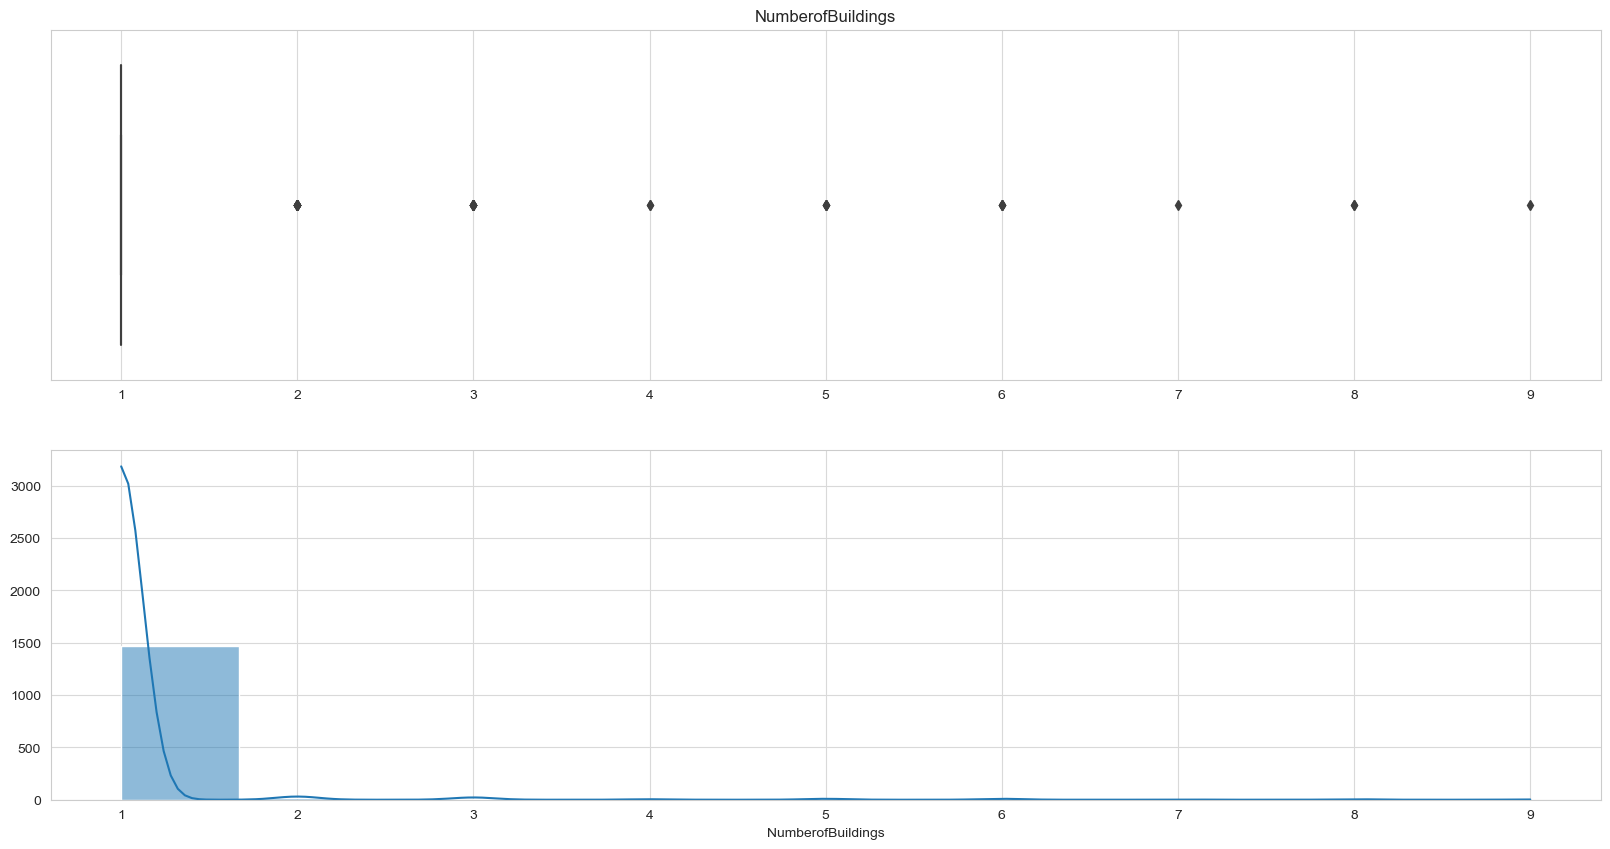

 
___________________
 
NumberofFloors
___________________
 
count   1511.0000
mean       4.3316
std        6.8459
min        1.0000
25%        1.0000
50%        2.0000
75%        4.0000
max       99.0000
Name: NumberofFloors, dtype: float64


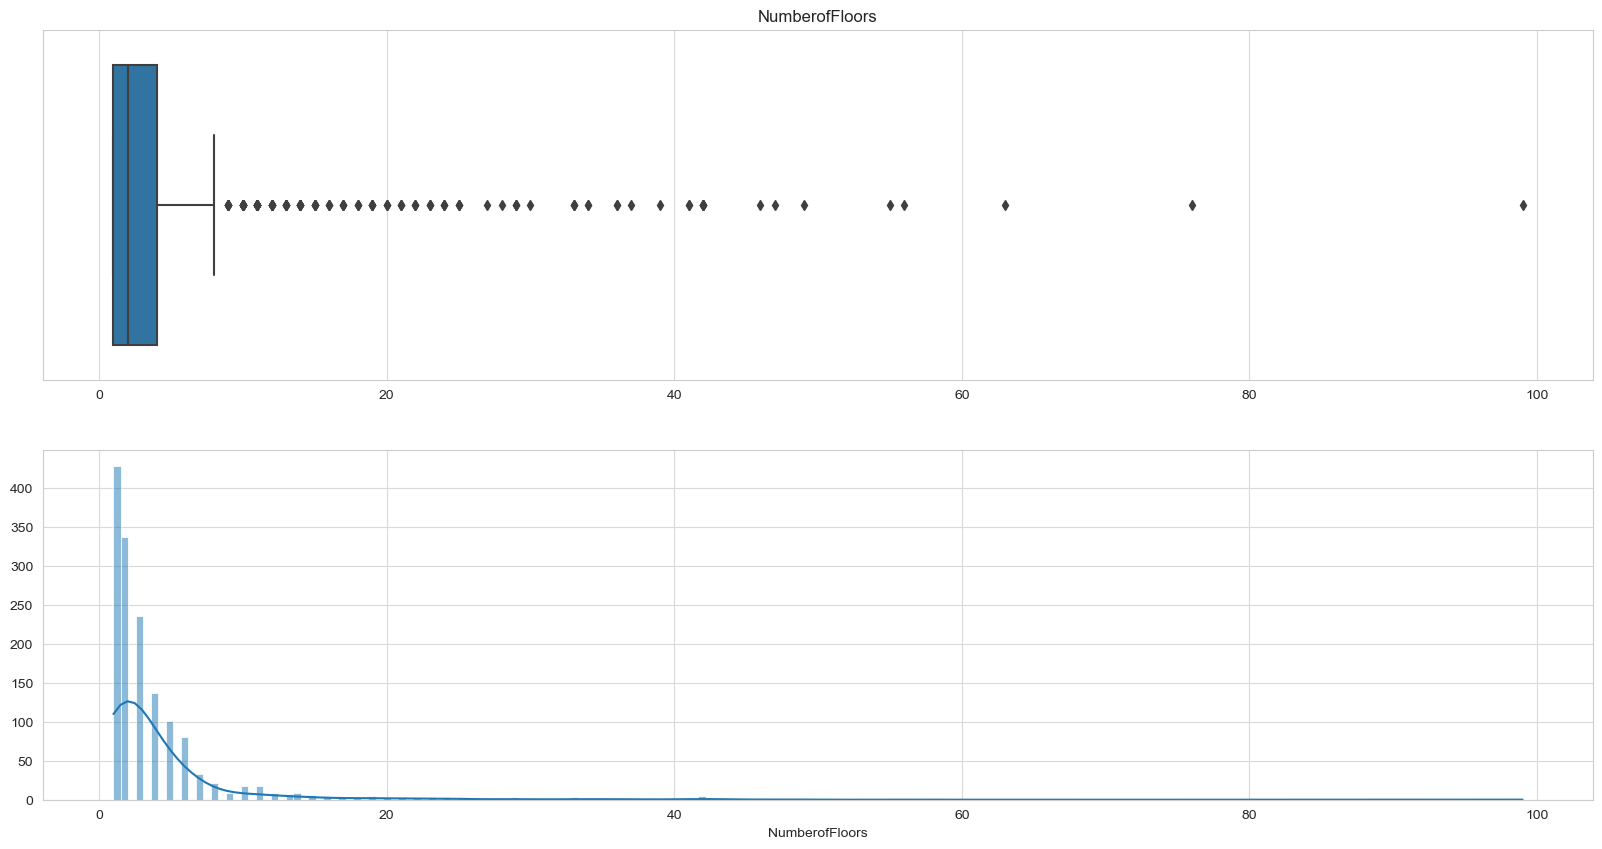

 
___________________
 
PropertyGFATotal
___________________
 
count      1511.0000
mean     112327.3283
std      190536.0855
min       11285.0000
25%       28800.0000
50%       47560.0000
75%      103631.5000
max     1952220.0000
Name: PropertyGFATotal, dtype: float64


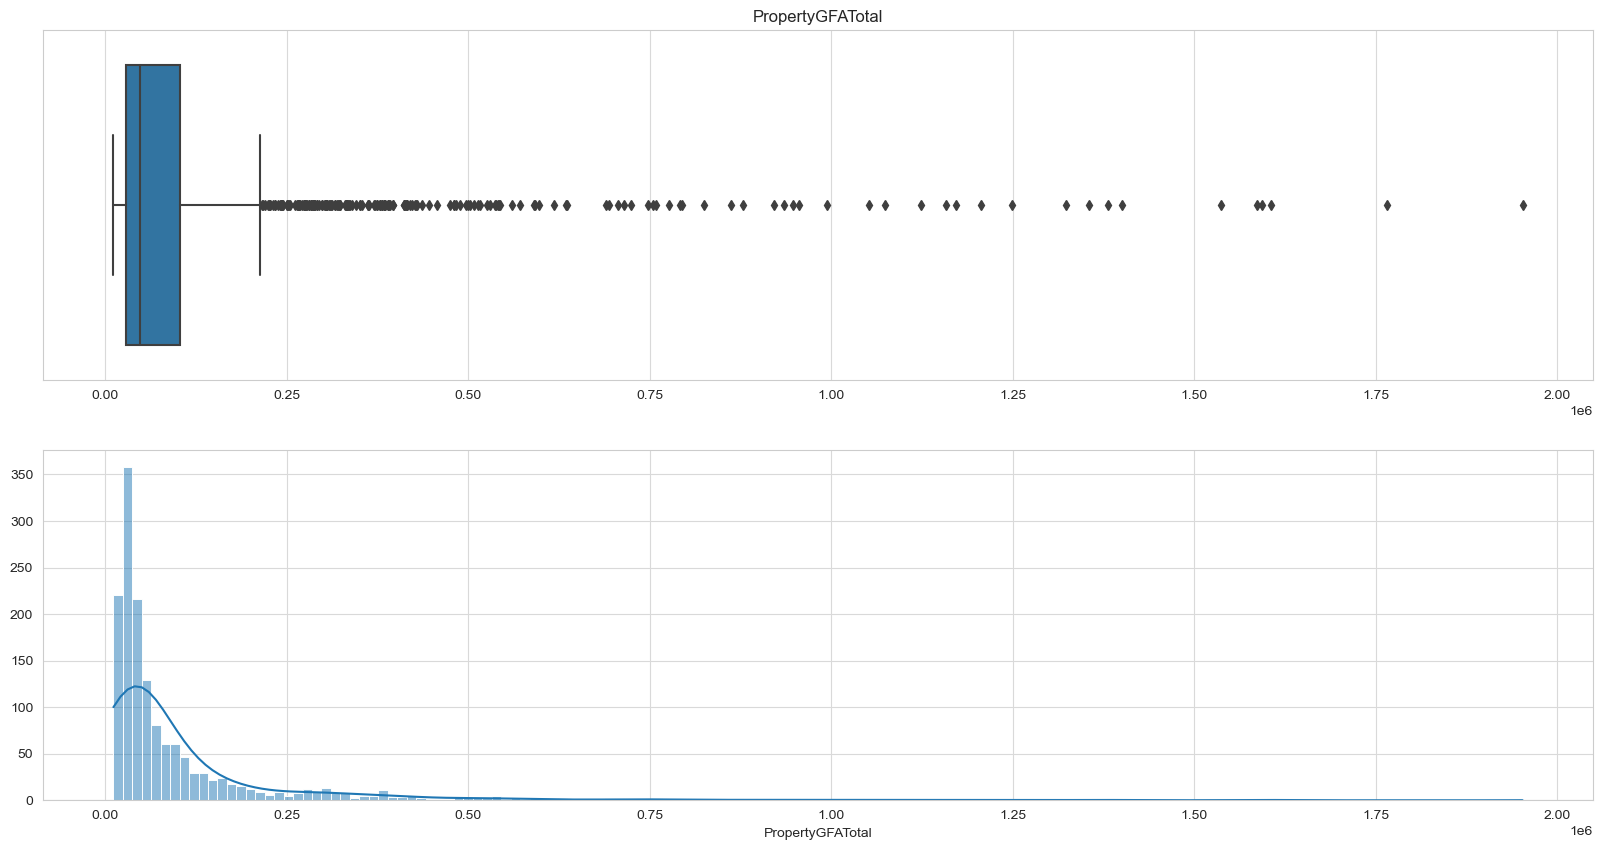

 
___________________
 
PropertyPctParking
___________________
 
count   1511.0000
mean       6.6532
std       14.5180
min        0.0000
25%        0.0000
50%        0.0000
75%        0.0000
max       90.0000
Name: PropertyPctParking, dtype: float64


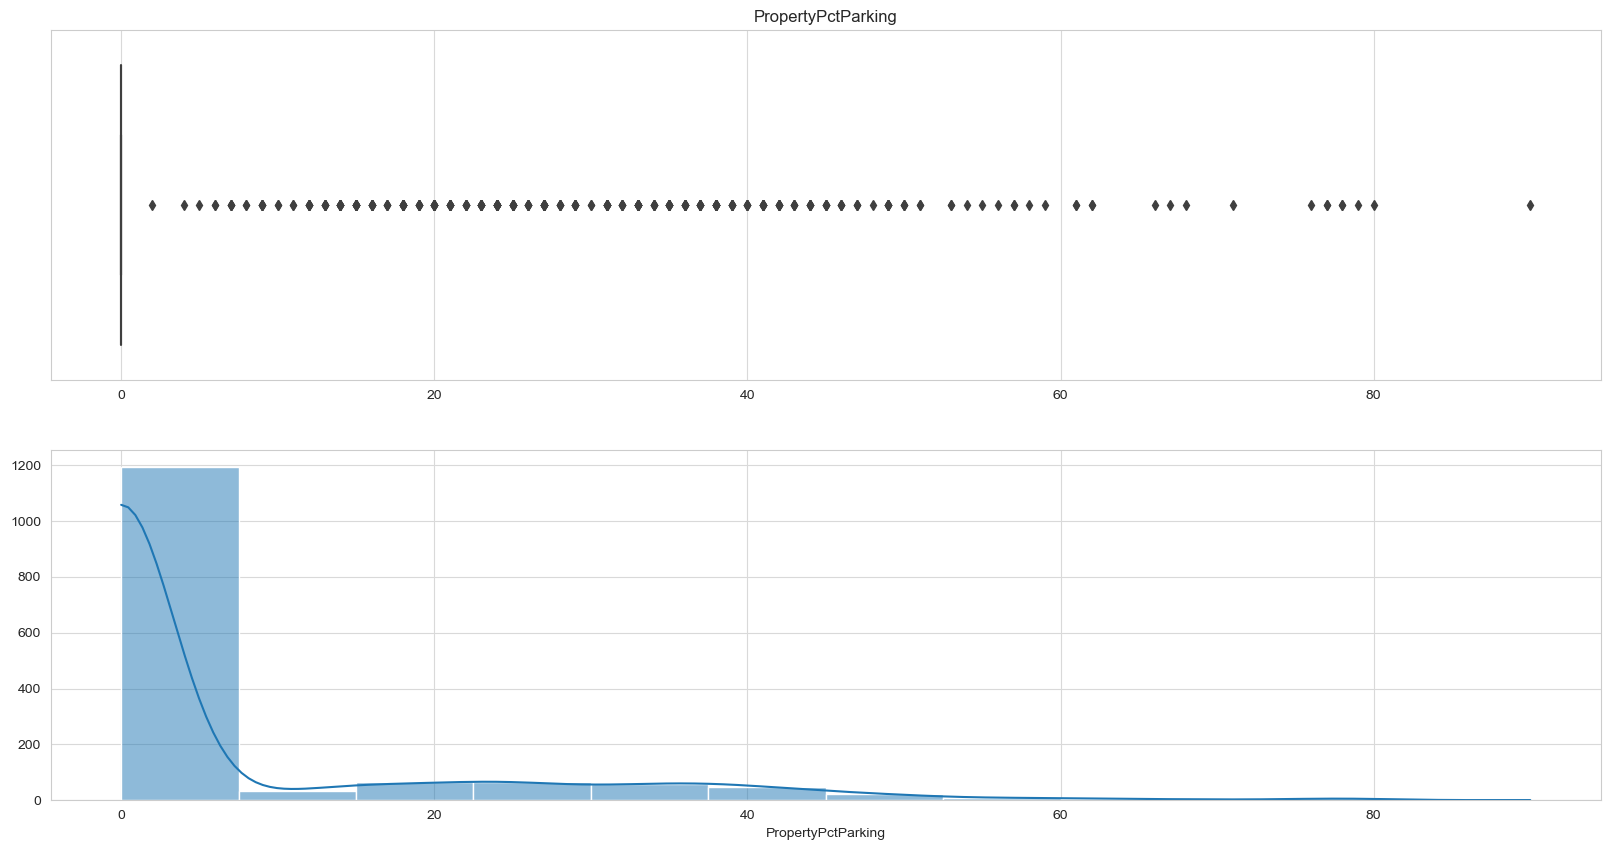

 
___________________
 
SiteEUIWN(kBtu/sf)
___________________
 
count   1511.0000
mean      76.0518
std       66.3378
min        1.5000
25%       37.2000
50%       56.3000
75%       87.8500
max      363.5700
Name: SiteEUIWN(kBtu/sf), dtype: float64


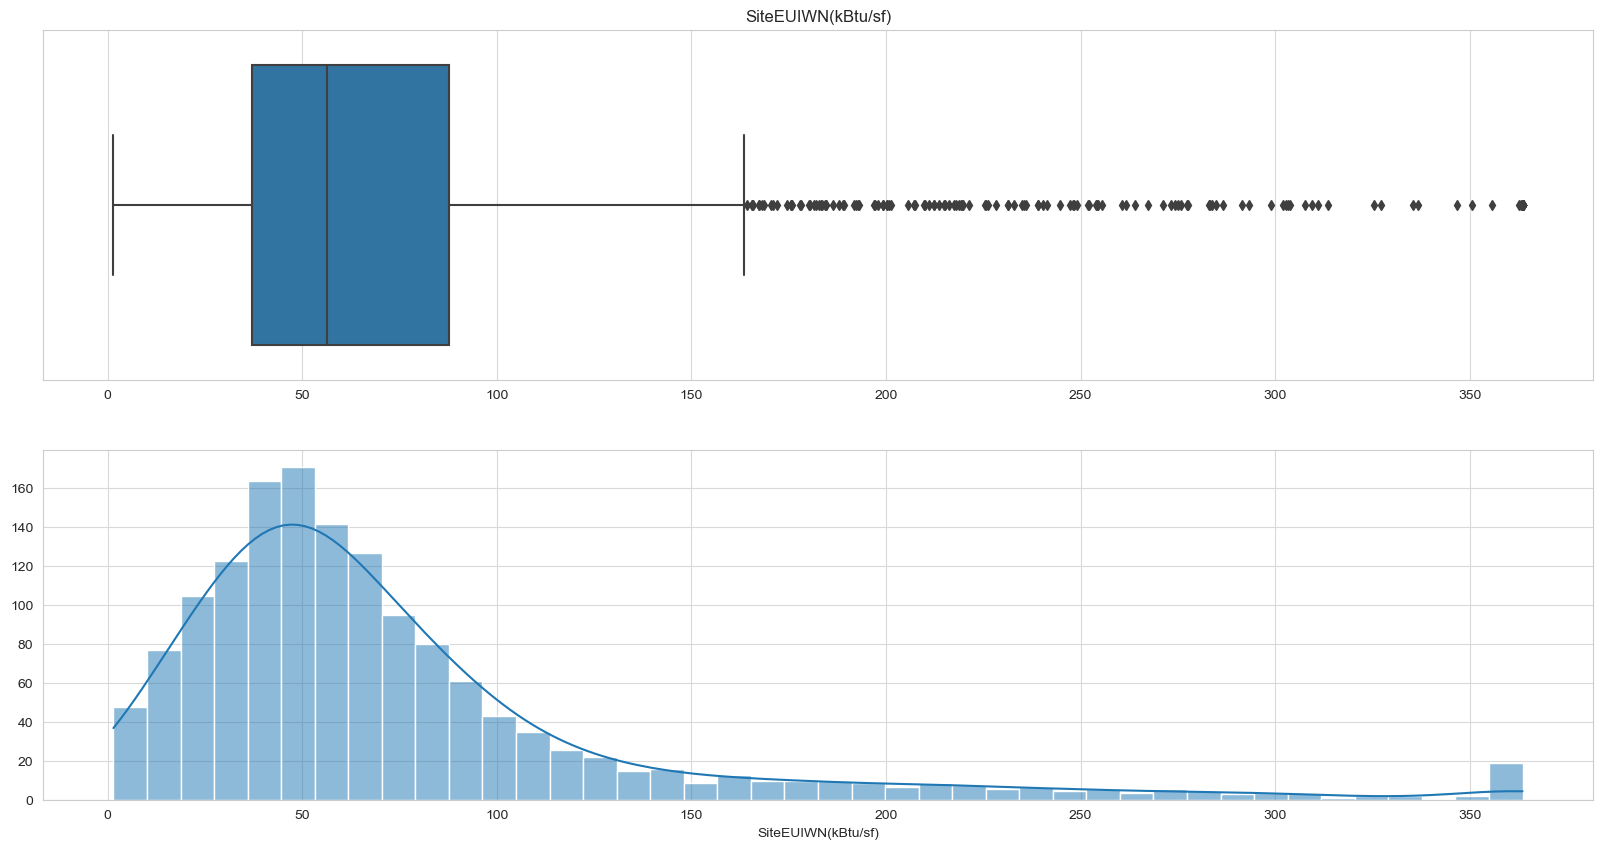

 
___________________
 
SourceEUIWN(kBtu/sf)
___________________
 
count   1511.0000
mean     181.2654
std      150.1848
min        4.6000
25%       86.7000
50%      142.5000
75%      215.9000
max      781.8300
Name: SourceEUIWN(kBtu/sf), dtype: float64


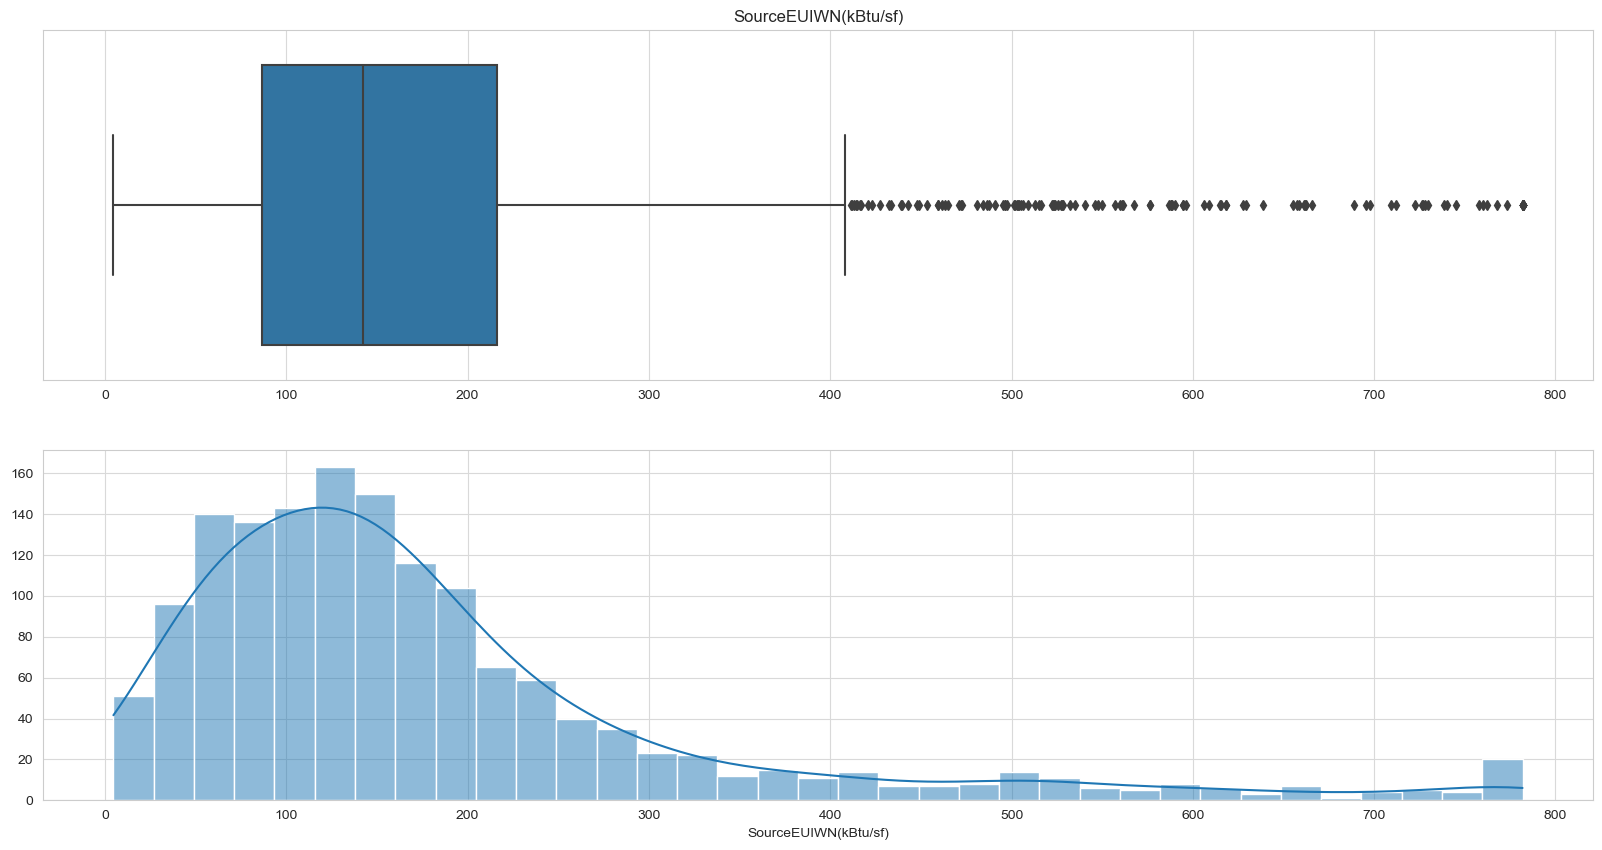

 
___________________
 
SiteEnergyUseWN(kBtu)
___________________
 
count       1511.0000
mean     7126760.1064
std     11462263.0707
min        58114.1992
25%      1319331.9375
50%      2811924.5000
75%      7366999.7500
max     65717548.0000
Name: SiteEnergyUseWN(kBtu), dtype: float64


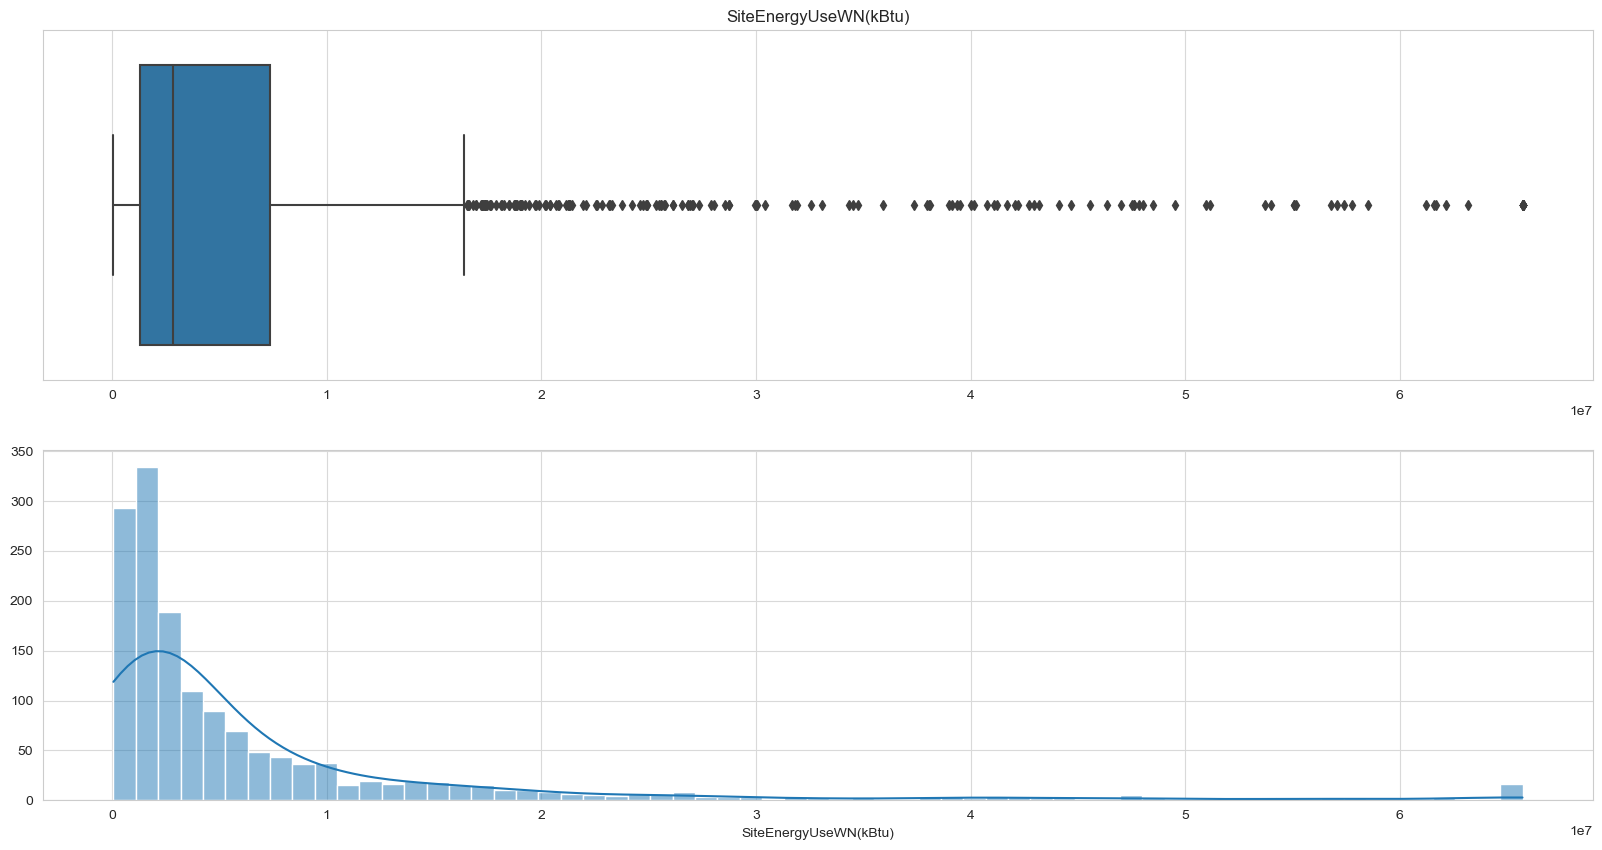

 
___________________
 
SteamUse(kBtu)
___________________
 
count      1511.0000
mean     242155.8360
std     1223333.7611
min           0.0000
25%           0.0000
50%           0.0000
75%           0.0000
max     9650359.1000
Name: SteamUse(kBtu), dtype: float64


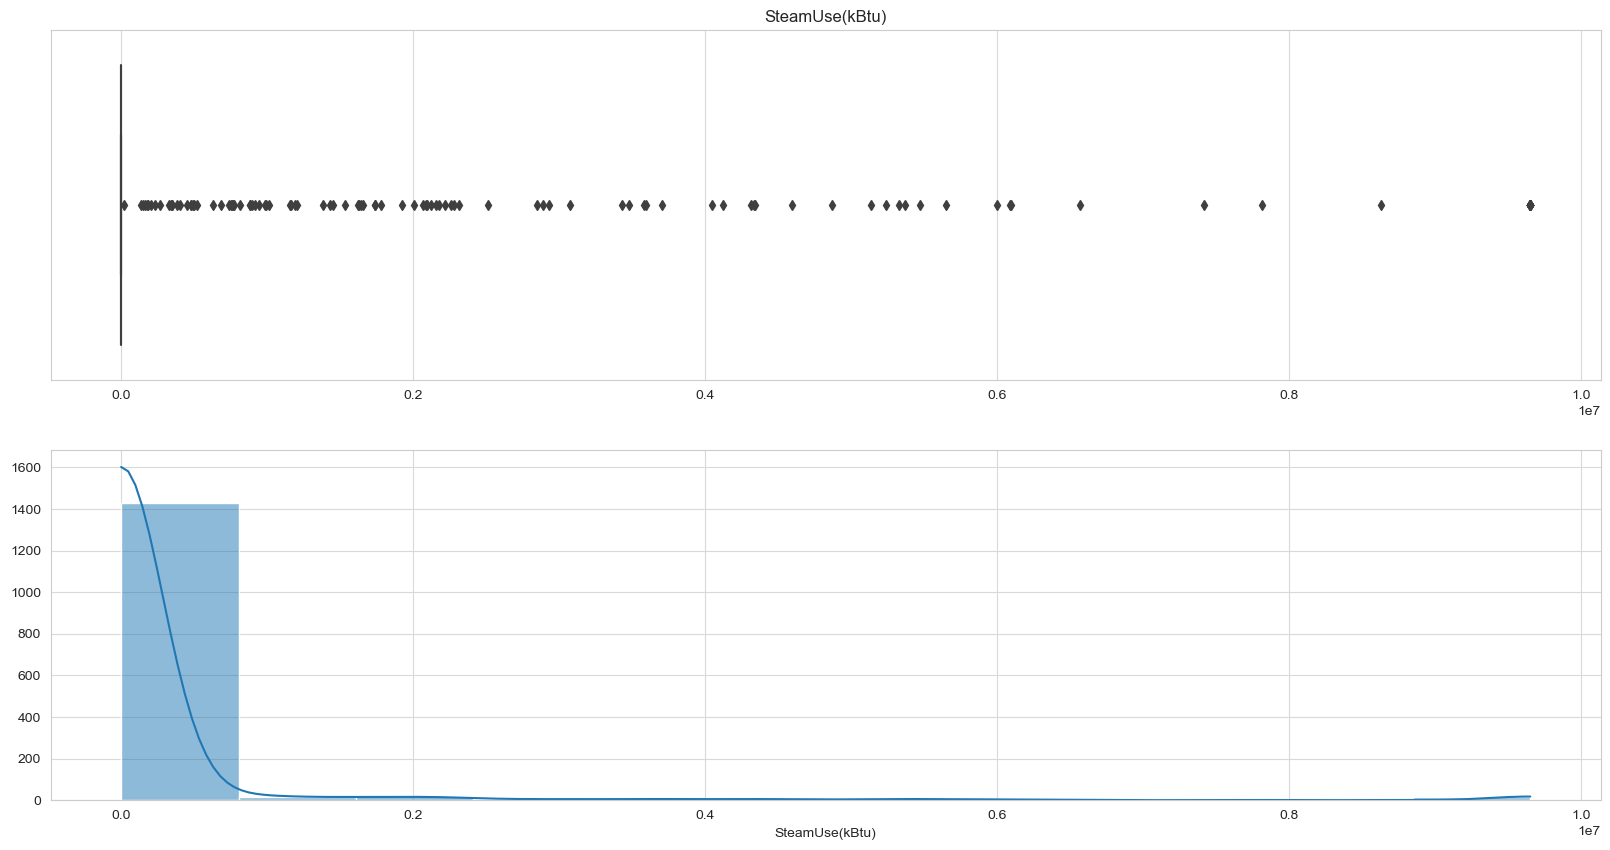

 
___________________
 
SteamUse(pct)
___________________
 
count   1511.0000
mean       1.9749
std        8.3008
min        0.0000
25%        0.0000
50%        0.0000
75%        0.0000
max       65.0000
Name: SteamUse(pct), dtype: float64


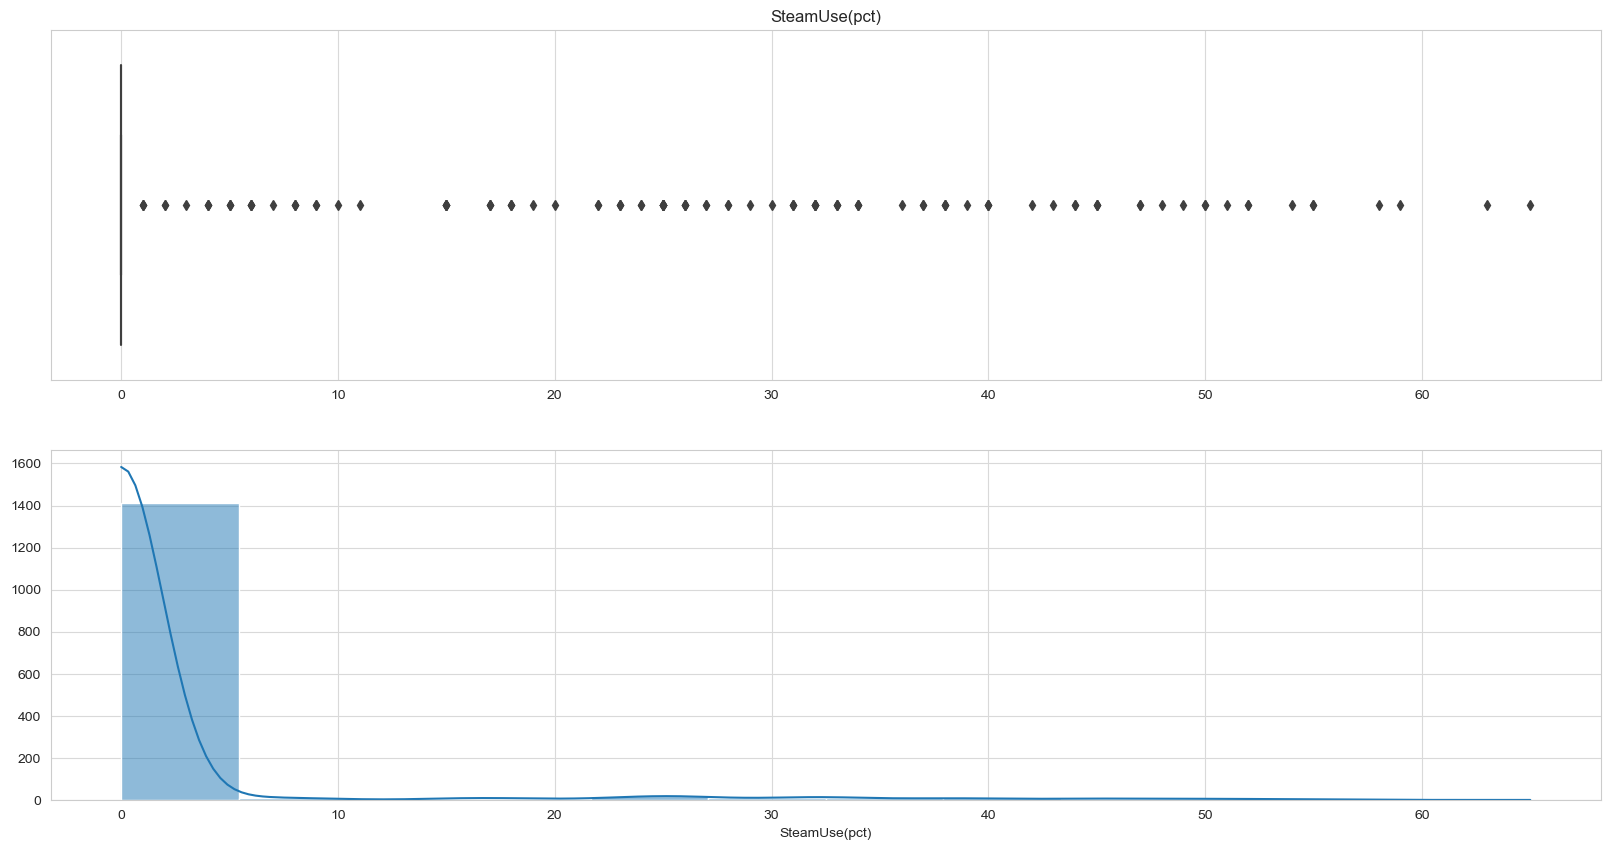

 
___________________
 
Electricity(kBtu)
___________________
 
count       1511.0000
mean     5058780.4077
std      8934249.7452
min            0.0000
25%       726577.5000
50%      1699980.0000
75%      5134823.0000
max     53108534.4000
Name: Electricity(kBtu), dtype: float64


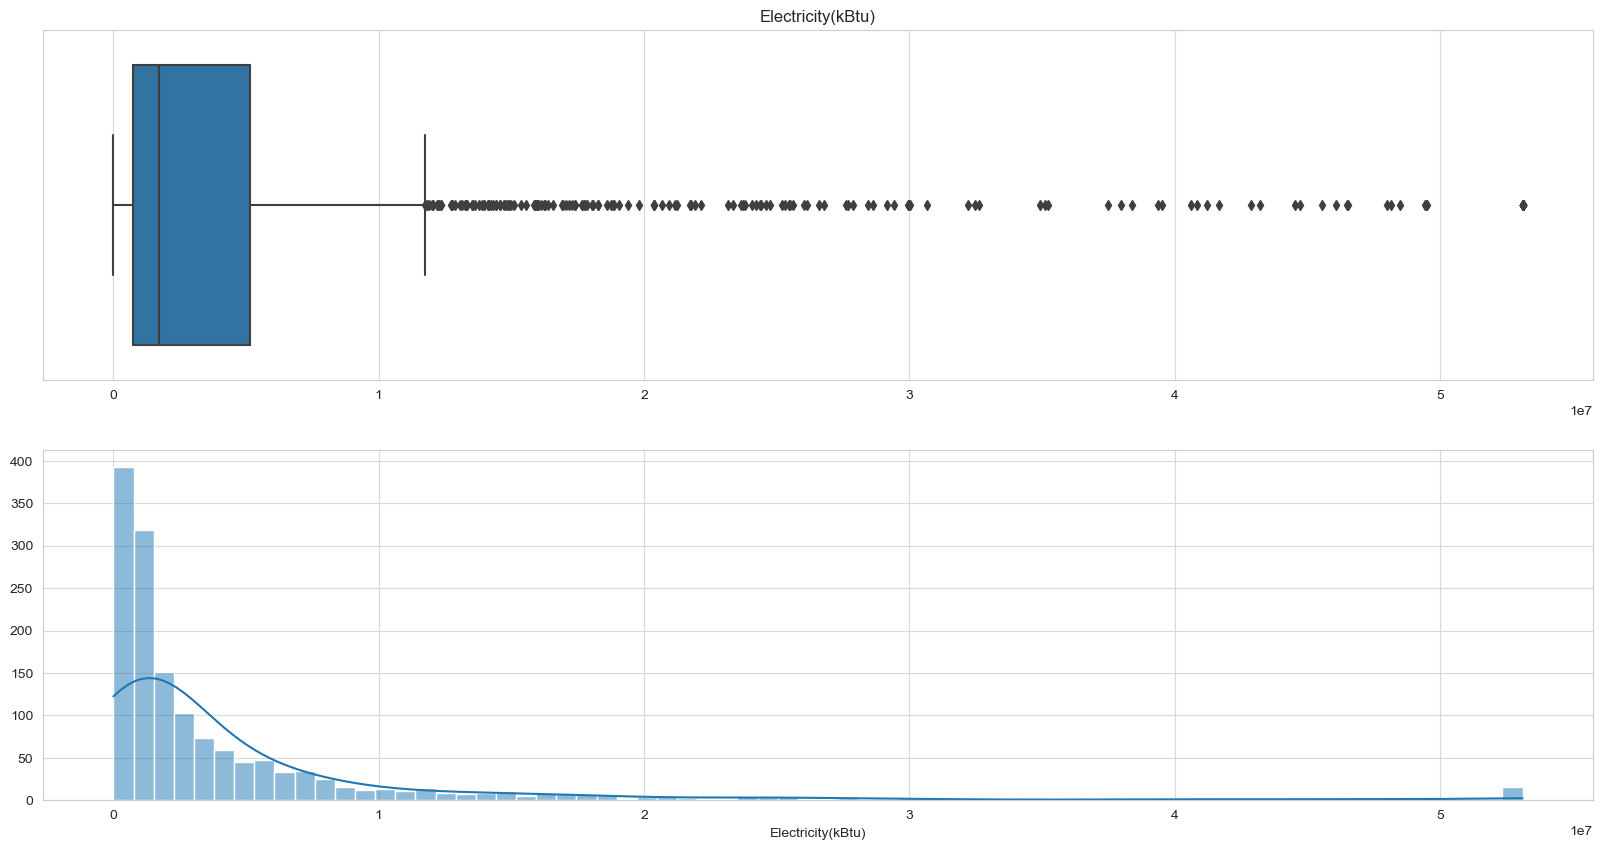

 
___________________
 
Electricity(pct)
___________________
 
count   1511.0000
mean      67.9120
std       26.8557
min        0.0000
25%       46.0000
50%       69.0000
75%       95.0000
max      104.0000
Name: Electricity(pct), dtype: float64


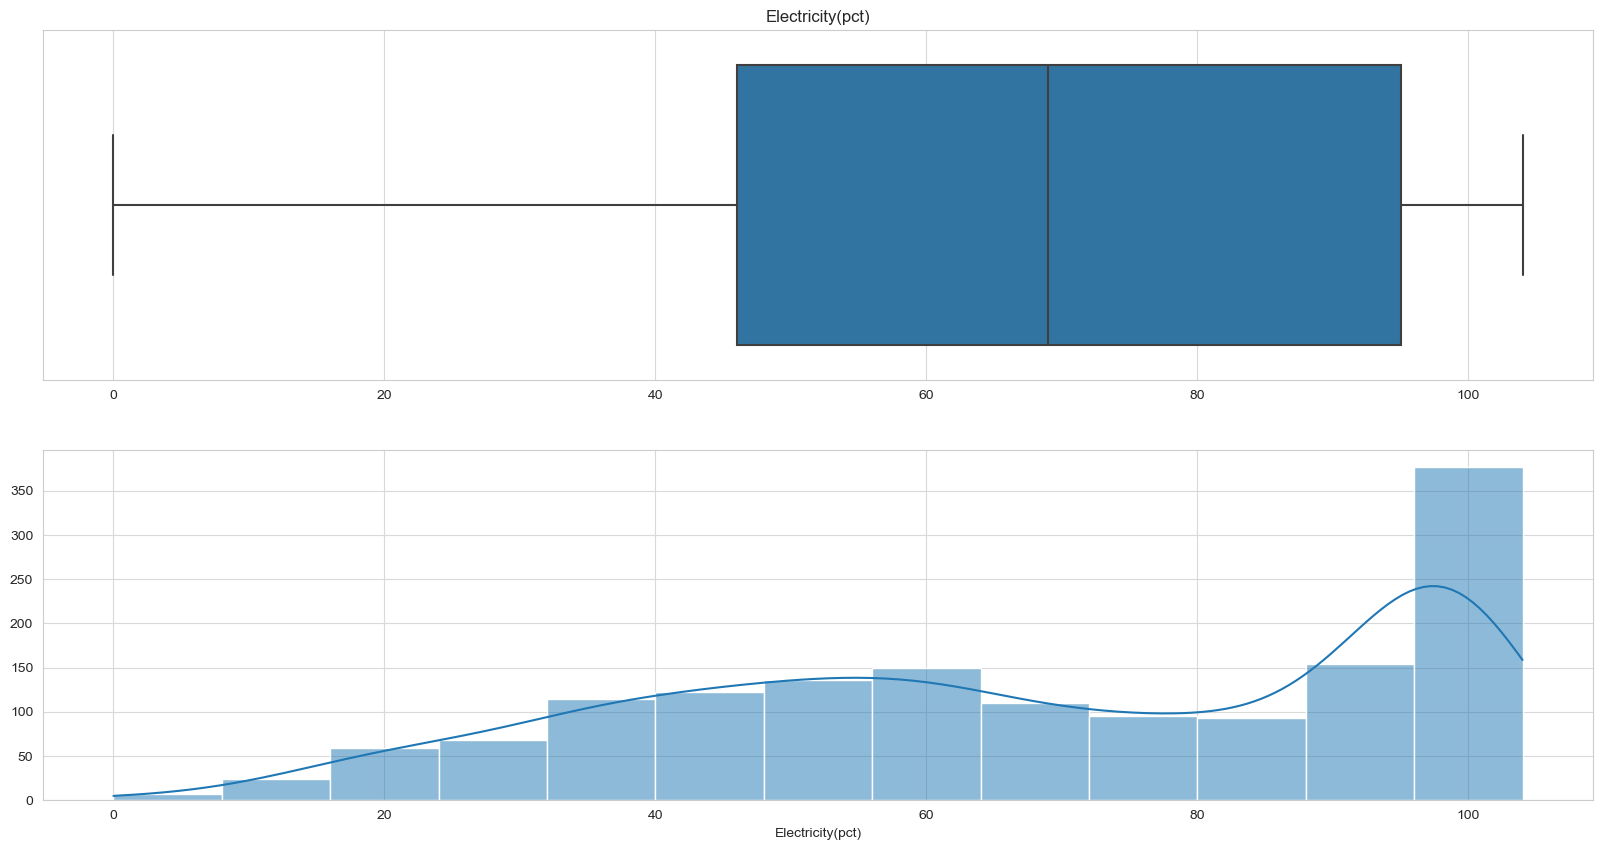

 
___________________
 
NaturalGas(kBtu)
___________________
 
count       1511.0000
mean     1471097.2450
std      2866926.1956
min            0.0000
25%            0.0000
50%       462194.0000
75%      1456527.5000
max     18119785.2000
Name: NaturalGas(kBtu), dtype: float64


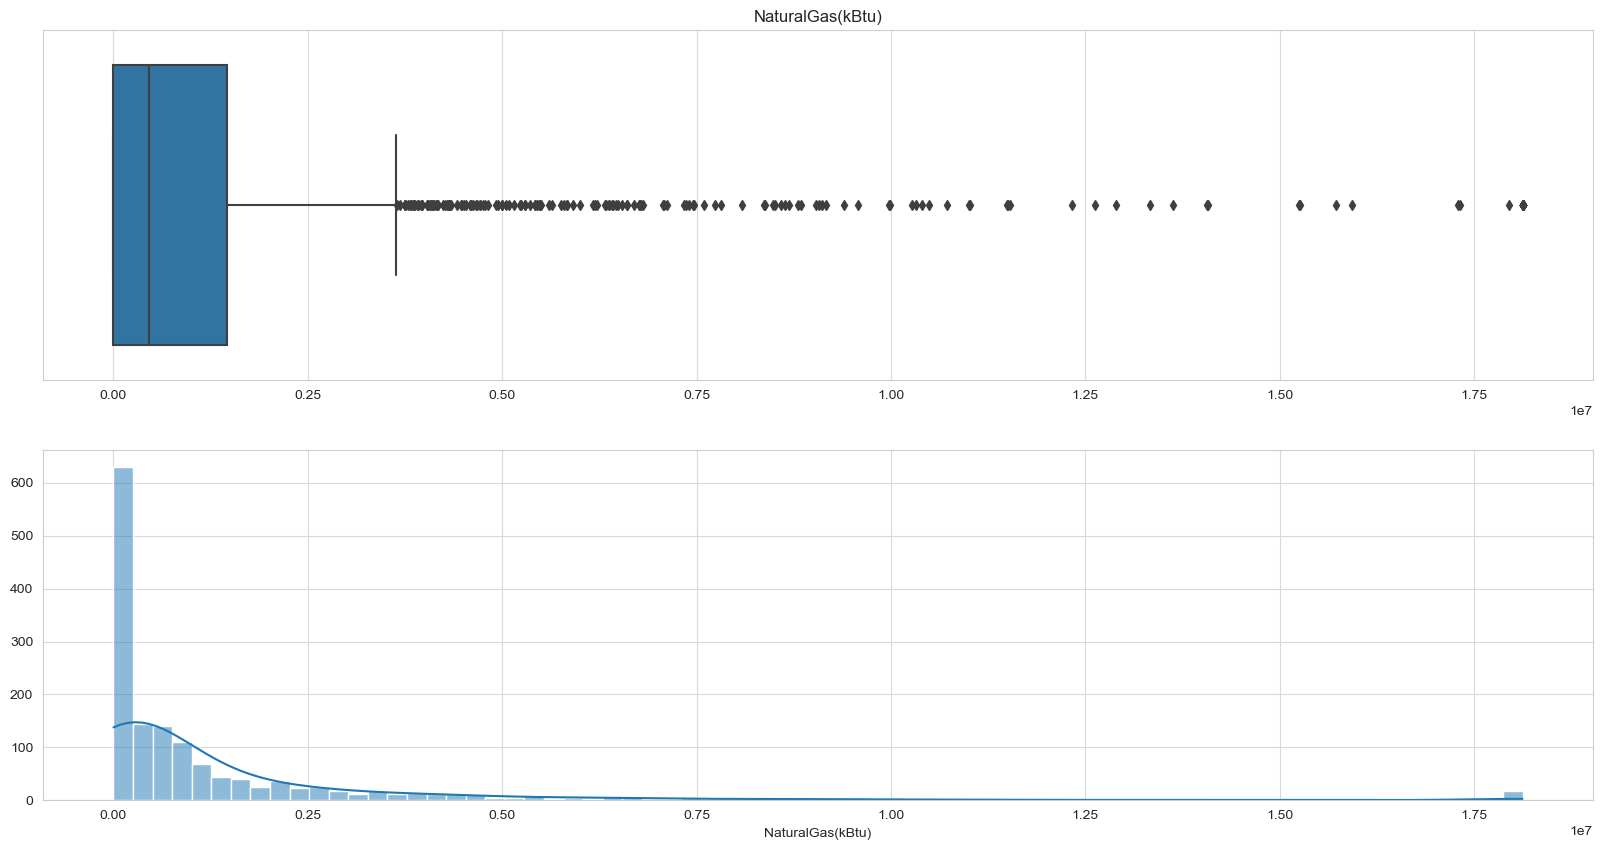

 
___________________
 
NaturalGas(pct)
___________________
 
count   1511.0000
mean      25.0053
std       23.8511
min        0.0000
25%        0.0000
50%       22.0000
75%       45.0000
max       97.0000
Name: NaturalGas(pct), dtype: float64


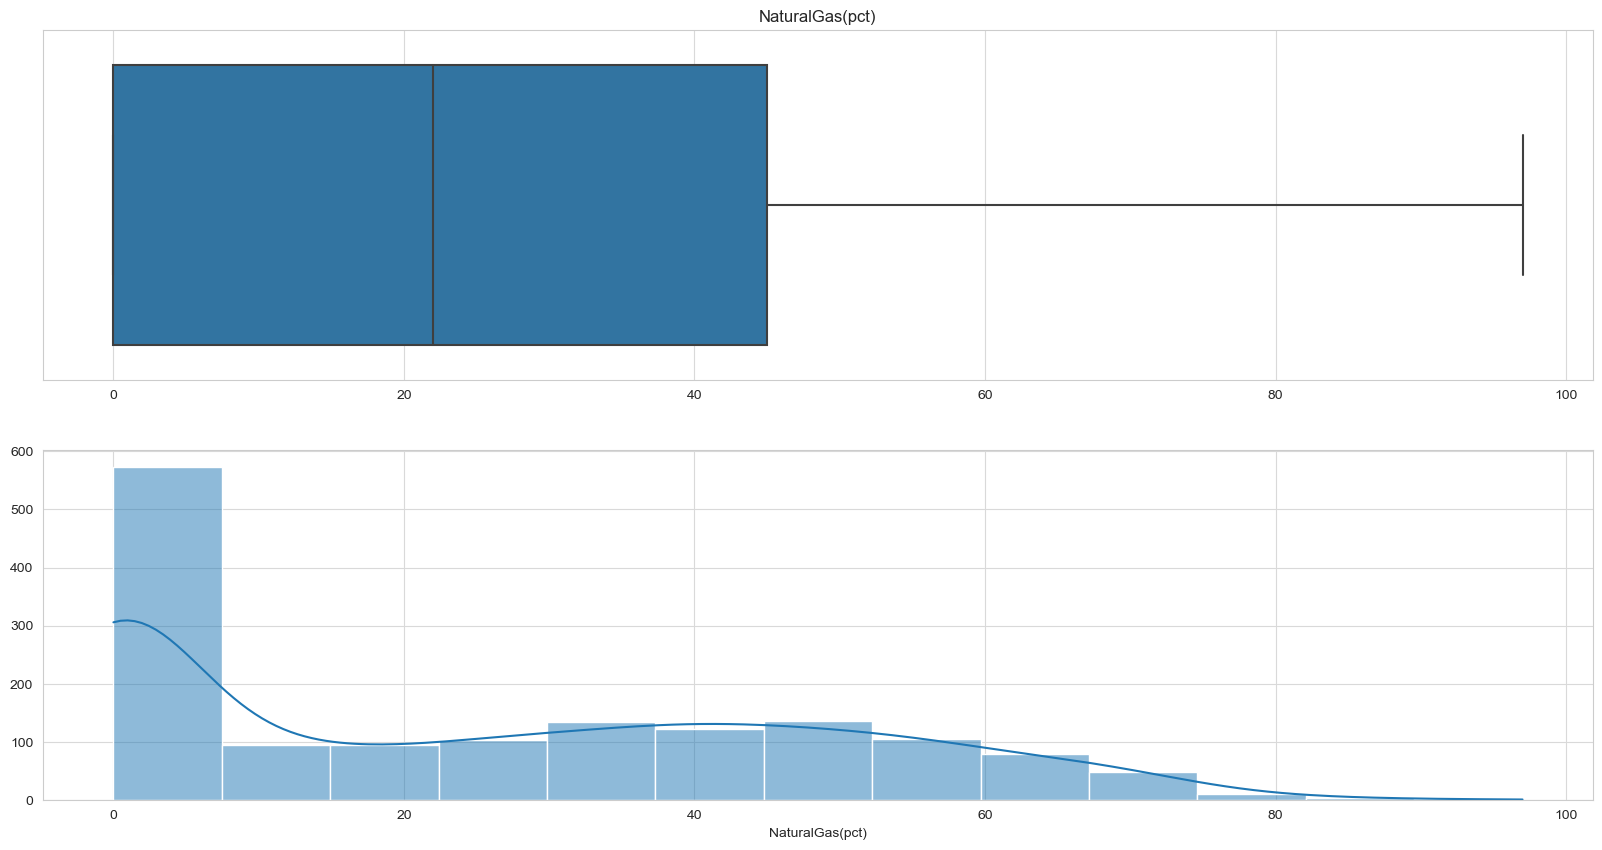

 
___________________
 
TotalGHGEmissions
___________________
 
count   1511.0000
mean     140.9204
std      259.8346
min        0.4000
25%       20.1100
50%       49.2800
75%      141.5750
max     1724.3440
Name: TotalGHGEmissions, dtype: float64


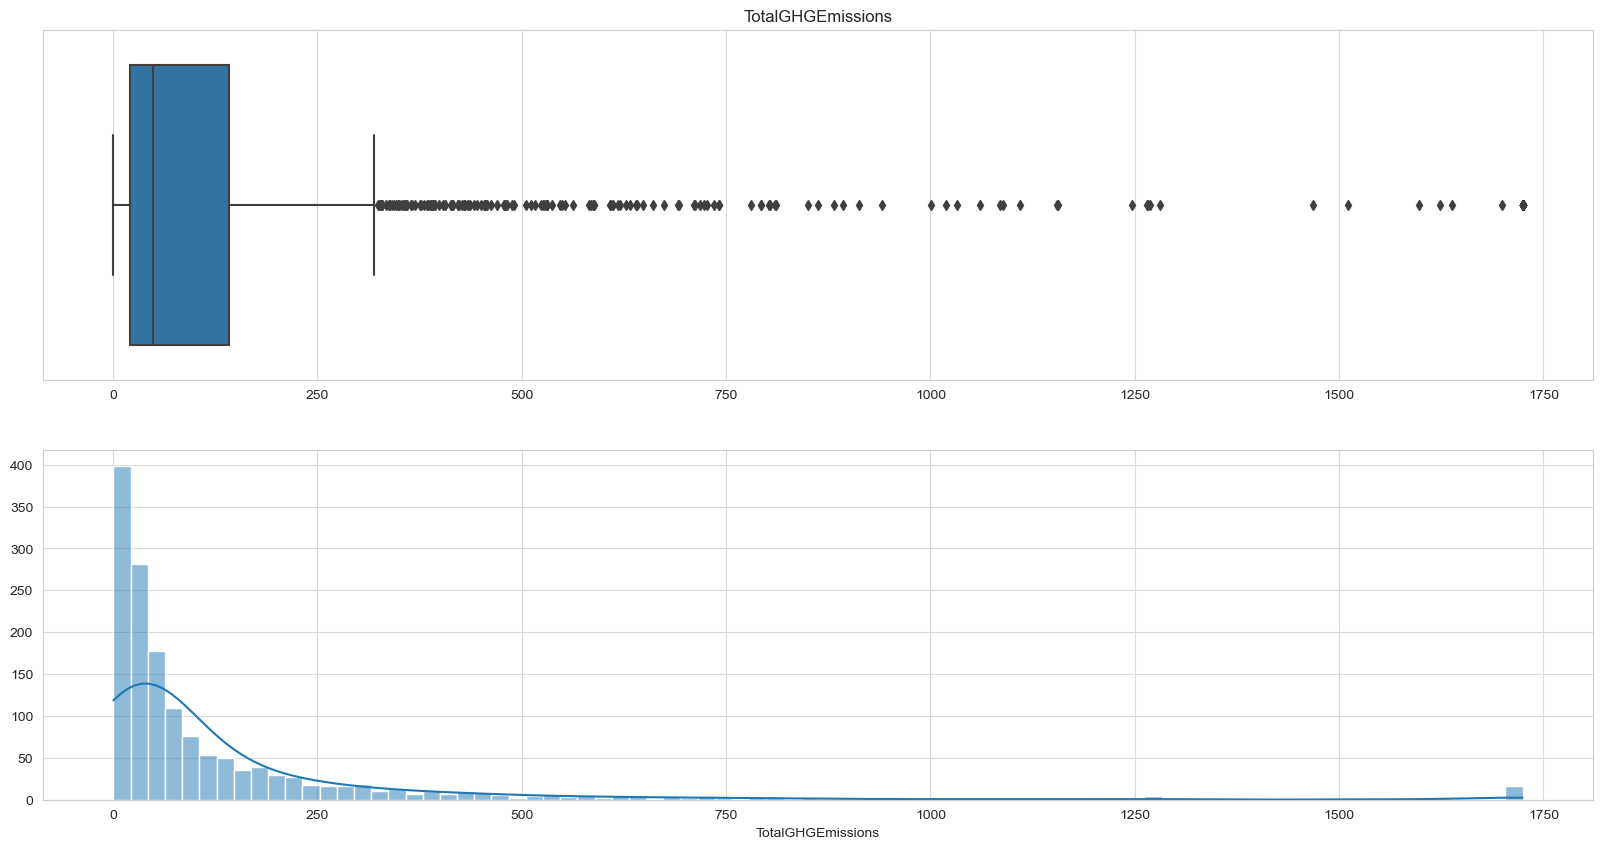

 
___________________
 
GHGEmissionsIntensity
___________________
 
count   1511.0000
mean       1.5936
std        2.0116
min        0.0100
25%        0.3500
50%        0.8800
75%        1.9500
max       11.1140
Name: GHGEmissionsIntensity, dtype: float64


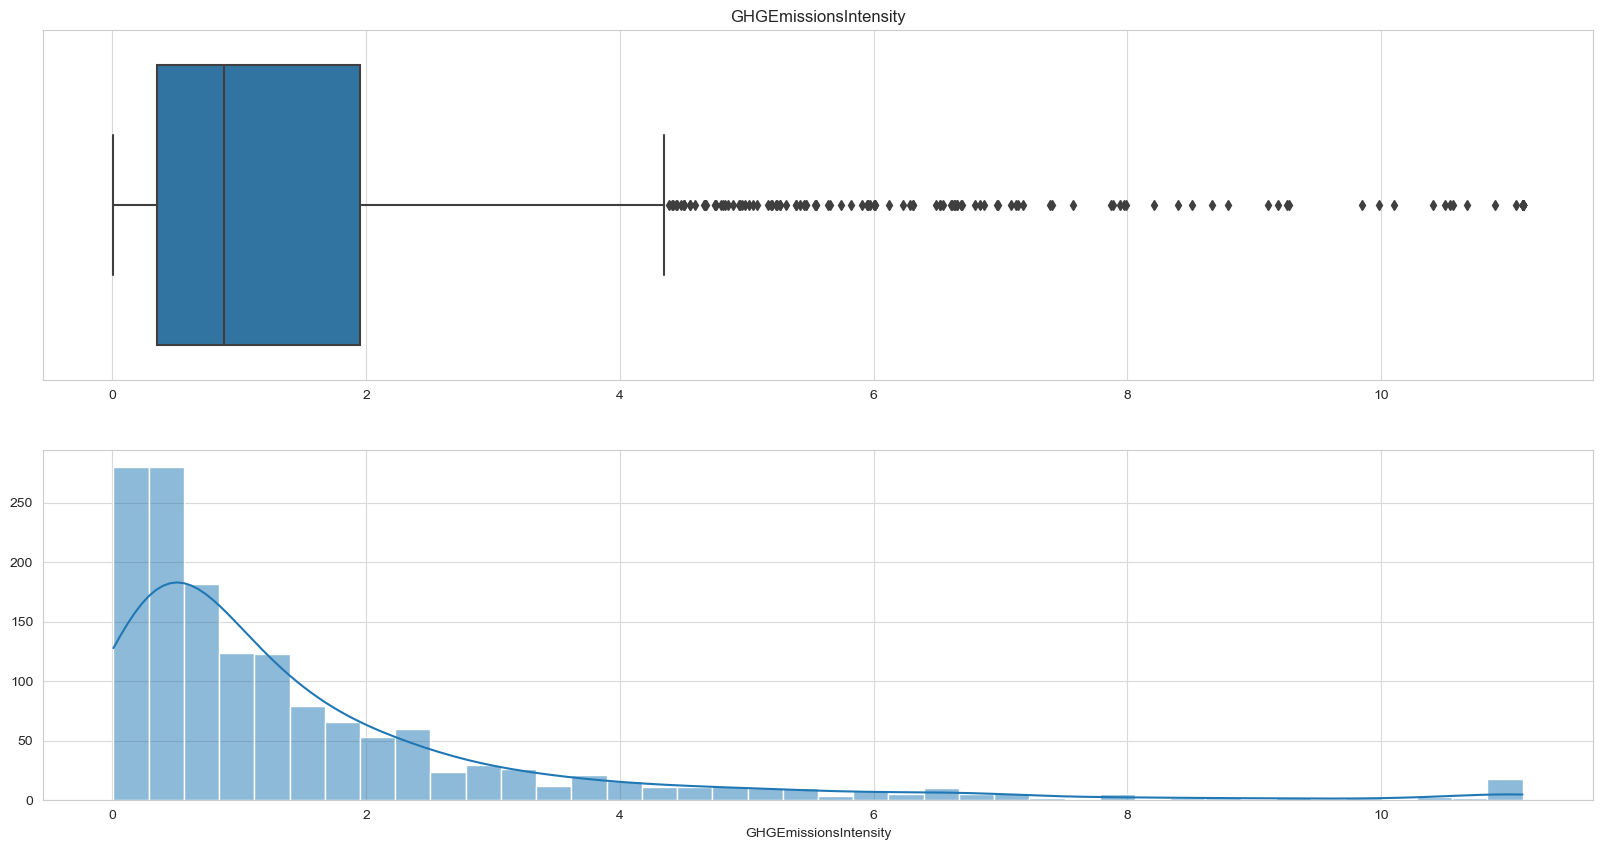

 
___________________
 
ENERGYSTARScore
___________________
 
count   981.0000
mean     63.4557
std      28.7959
min       1.0000
25%      44.0000
50%      70.0000
75%      88.0000
max     100.0000
Name: ENERGYSTARScore, dtype: float64


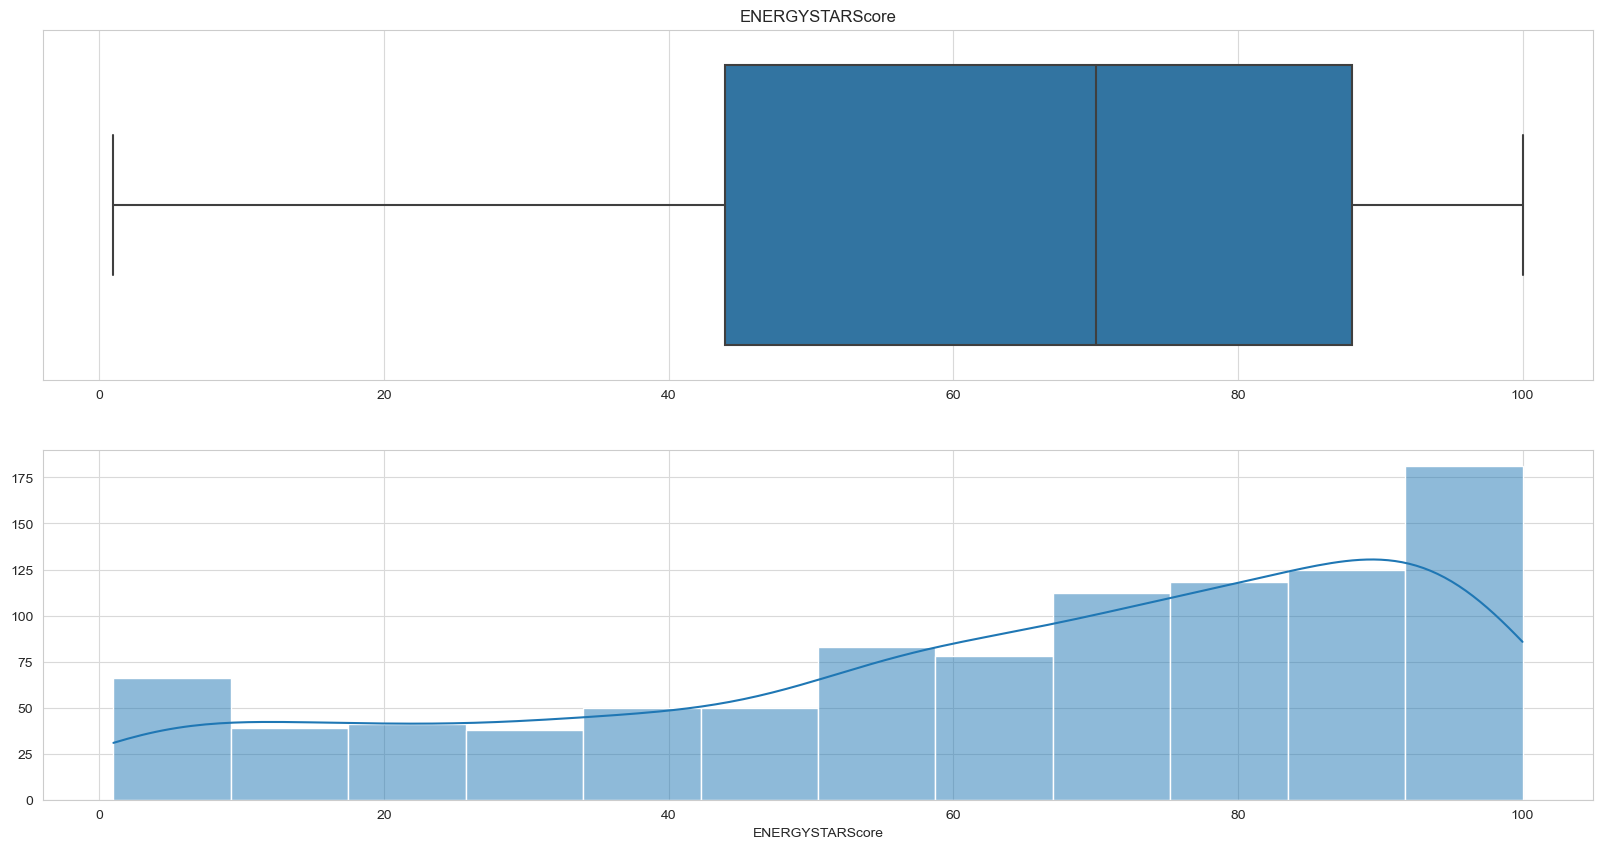

In [684]:
for feature in numeric_features:
    print('___________________')
    print(' ')
    print(feature)
    print('___________________')
    print(' ')
    
    print(df_filtered[feature].describe())
    
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 10))
    
    sns.boxplot(x=df_filtered[feature], ax=ax1)
    ax1.set(xlabel=None)
    ax1.set_title(feature)
    
    sns.histplot(x=df_filtered[feature], kde=True, ax=ax2)
    ax2.set(ylabel=None)
    
    plt.show()
    
    print(' ')

Let's compare the distribution of the main energy ressources.

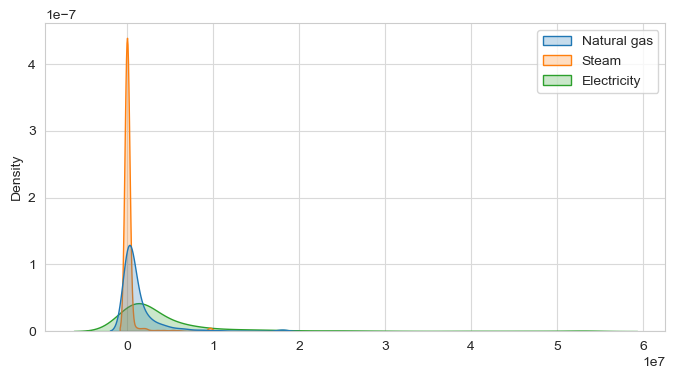

In [686]:
plt.figure(figsize=(8, 4))
    
concat_df = pd.concat(
    {
        'Natural gas': df_filtered['NaturalGas(kBtu)'],
        'Steam': df_filtered['SteamUse(kBtu)'],
        'Electricity': df_filtered['Electricity(kBtu)']
    },
    axis=1)

sns.kdeplot(data=concat_df, fill=True)
plt.show()

It's not obvious to interpret this graph, even if steam, electricity and gas are calculated using the same unit, they are still different sources. Let's take the proportional values instead.

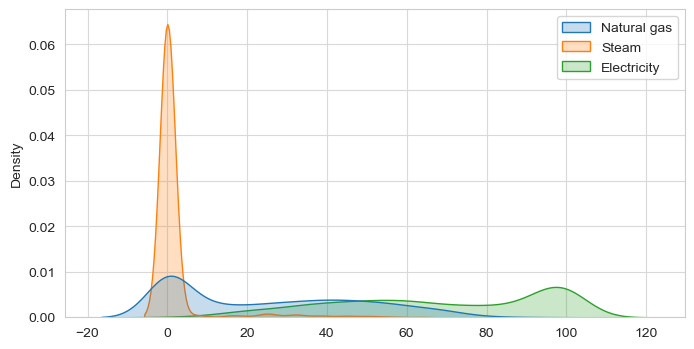

In [688]:
plt.figure(figsize=(8, 4))
    
concat_df = pd.concat(
    {
        'Natural gas': df_filtered['NaturalGas(pct)'],
        'Steam': df_filtered['SteamUse(pct)'],
        'Electricity': df_filtered['Electricity(pct)']
    },
    axis=1)

sns.kdeplot(data=concat_df, fill=True)
plt.show()

We might assume from this plot the following tendencies in energy consumption:
- Using electricity as the main energy source is the most popular trend
- Using a mix of electriciy and gas
- Using steam is the least popular trend

### Categorical

**DecadeBuilt**

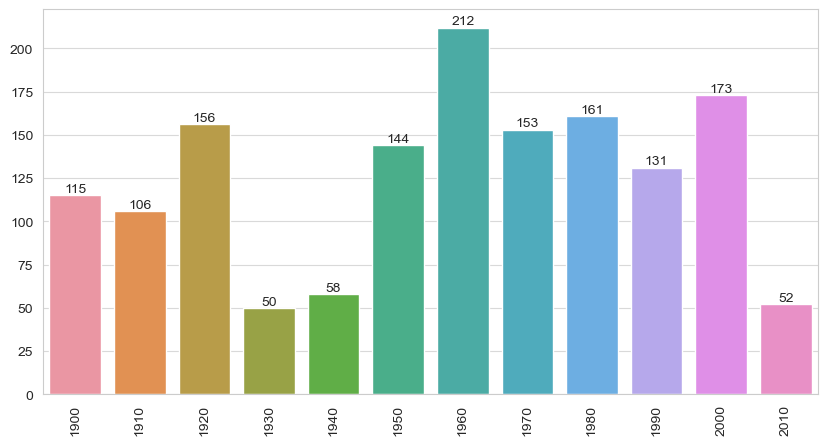

In [689]:
fig, ax = plt.subplots(figsize=(10, 5)) 

sns.countplot(x=df_filtered['DecadeBuilt'].sort_values(), ax=ax)
plt.xticks(rotation=90)
ax.bar_label(ax.containers[0])
ax.set(ylabel=None)
ax.set(xlabel=None)

plt.show()
    

**PrimaryPropertyType**

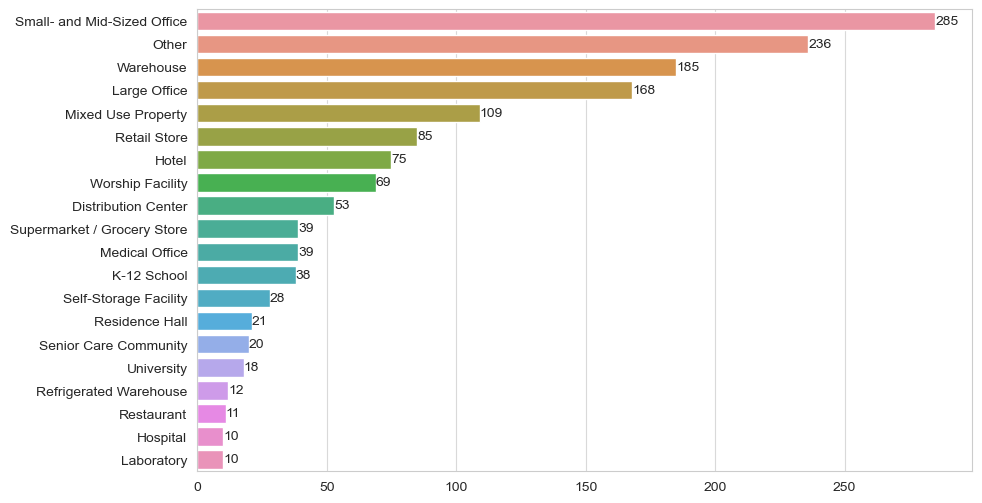

In [690]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.countplot(y=df_filtered['PrimaryPropertyType'],
              order=df_filtered['PrimaryPropertyType'].value_counts().index, ax=ax)

ax.bar_label(ax.containers[0])
plt.ylabel(ylabel='')
plt.xlabel(xlabel='')
plt.show()

**Neighborhood**

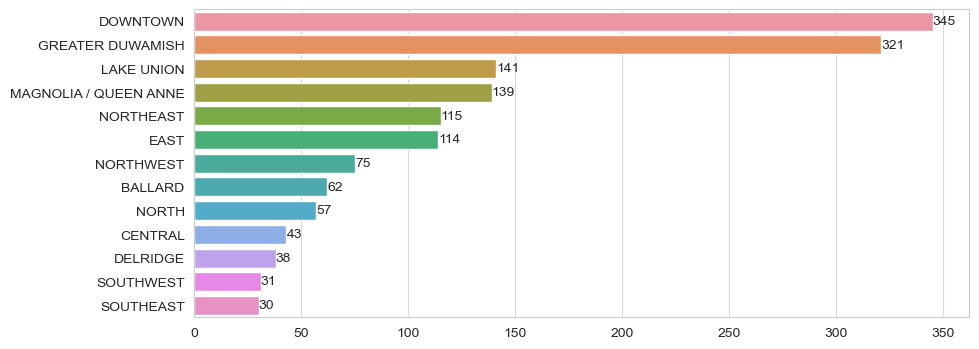

In [691]:
fig, ax = plt.subplots(figsize=(10, 4))

sns.countplot(y=df_filtered['Neighborhood'], order = df_filtered['Neighborhood'].value_counts().index, ax=ax)
ax.bar_label(ax.containers[0])
plt.ylabel(ylabel='')
plt.xlabel(xlabel='')
plt.show()

## Correlations

In [692]:
features = [
    'NumberofBuildings',
    'NumberofFloors',
    'PropertyGFATotal',
    'PropertyPctParking',
    'SteamUse(kBtu)',
    'Electricity(kBtu)',
    'NaturalGas(kBtu)',
    'GHGEmissionsIntensity',
    'SiteEUIWN(kBtu/sf)'
]

pd.options.display.float_format = '{:.2f}'.format

correlations = df_filtered[features].corr()
correlations

,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyPctParking,SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),GHGEmissionsIntensity,SiteEUIWN(kBtu/sf)
NumberofBuildings,1.00,-0.01,0.19,-0.03,0.12,0.21,0.22,0.16,0.09
NumberofFloors,-0.01,1.00,0.69,0.18,0.23,0.59,0.10,-0.06,-0.01
PropertyGFATotal,0.19,0.69,1.00,0.24,0.25,0.82,0.32,-0.04,0.03
PropertyPctParking,-0.03,0.18,0.24,1.00,-0.02,0.21,0.08,-0.09,0.13
SteamUse(kBtu),0.12,0.23,0.25,-0.02,1.00,0.28,0.03,0.26,0.13
Electricity(kBtu),0.21,0.59,0.82,0.21,0.28,1.00,0.40,0.16,0.36
NaturalGas(kBtu),0.22,0.10,0.32,0.08,0.03,0.40,1.00,0.57,0.50
GHGEmissionsIntensity,0.16,-0.06,-0.04,-0.09,0.26,0.16,0.57,1.00,0.81
SiteEUIWN(kBtu/sf),0.09,-0.01,0.03,0.13,0.13,0.36,0.50,0.81,1.00


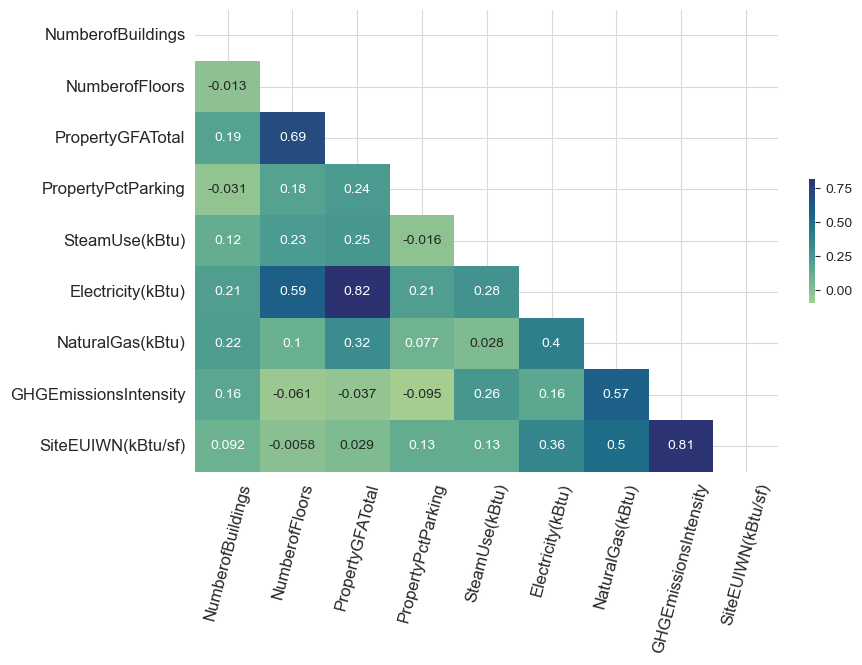

In [693]:
mask = np.zeros_like(correlations, dtype=bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(8, 6))
corr_heatmap = sns.heatmap(correlations,
                           cbar_kws={'fraction': 0.01},
                           mask=mask,
                           annot=True,
                           cmap="crest"
                          )
plt.xticks(rotation=75, fontsize=12)
plt.yticks(fontsize=12)
corr_heatmap.set(xlabel="", ylabel="")
plt.show()

**Interesting insights from the correlation matrix:**
- strong relation between the 2 targets `GHGEmissionsIntensity` and `SiteEUIWN(kBtu/sf)`, does it mean that the more energy the building uses, the more CO2 emissions it produces?
- strong correlation between `Electricity(kBtu)` and `PropertyGFATotal` (and is also related to the number of floors) which looks consistent
- strong correlation between number of floors and total surface which is also consistent
- moderate correlation between `NaturalGas(kBtu)` and `GHGEmissionsIntensity`, meaning that buildings using gas are more likely to produce CO2 emissions
- a weak relation between the park area and energy consumption, we would think that the parks are not likely to consume much energy but it is not that obvious

In [694]:
correlations['GHGEmissionsIntensity'].sort_values()

PropertyPctParking      -0.09
NumberofFloors          -0.06
PropertyGFATotal        -0.04
Electricity(kBtu)        0.16
NumberofBuildings        0.16
SteamUse(kBtu)           0.26
NaturalGas(kBtu)         0.57
SiteEUIWN(kBtu/sf)       0.81
GHGEmissionsIntensity    1.00
Name: GHGEmissionsIntensity, dtype: float64

In [695]:
correlations['SiteEUIWN(kBtu/sf)'].sort_values()

NumberofFloors          -0.01
PropertyGFATotal         0.03
NumberofBuildings        0.09
PropertyPctParking       0.13
SteamUse(kBtu)           0.13
Electricity(kBtu)        0.36
NaturalGas(kBtu)         0.50
GHGEmissionsIntensity    0.81
SiteEUIWN(kBtu/sf)       1.00
Name: SiteEUIWN(kBtu/sf), dtype: float64

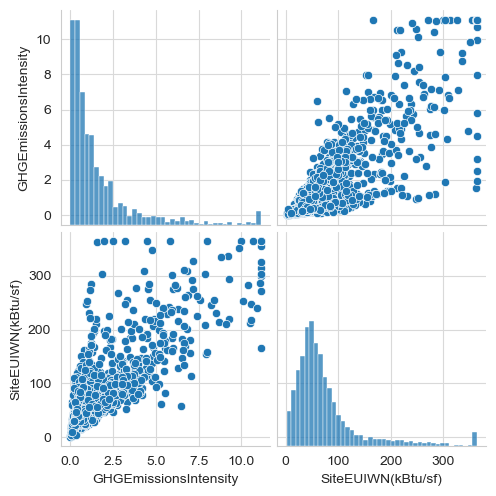

In [696]:
sns.pairplot(data=df_filtered,
             vars=['GHGEmissionsIntensity', 'SiteEUIWN(kBtu/sf)'])

plt.show()

## DecadeBuilt

Is there any relation between the year of construction and the way the building consumes energy and emits CO2? We would say intuitively that a more recent building is likely to consume less energy and emit less CO2 because of more recent materials, innovative technologies, etc.

In [697]:
df_filtered['DecadeBuilt'] = df_filtered['DecadeBuilt'].astype(str)

**GHGEmissionsIntensity**

<Figure size 1000x800 with 0 Axes>

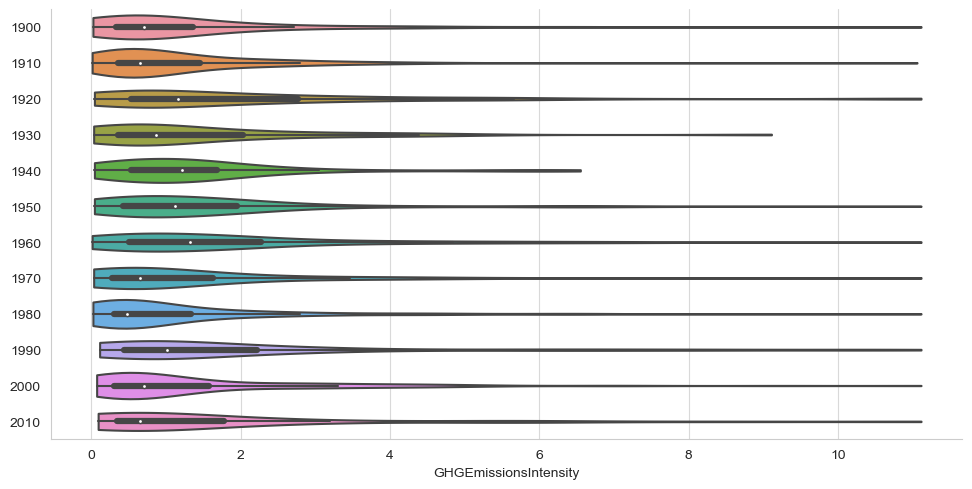

In [698]:
plt.figure(figsize=(10, 8))

sns.catplot(data=df_filtered.sort_values(by='DecadeBuilt'),
            x="GHGEmissionsIntensity",
            y="DecadeBuilt",
            kind="violin",
            cut=0,
            split=True,
            aspect=2)

plt.ylabel(ylabel='')
plt.show()

At first glance it is not obvious to see a general tendency, we can observe that for some periods as 1920 the distribution is highly skewed to the right, and 1940 seems to be the decade with the least emissions. Let's check with ANOVA if there is a dependancy between CO2 emissions and the year the building was built. <br/>

Considering these 2 hypothesis:

H0: there is no difference in CO2 emissions <br/>
H1: CO2 emissions differ depending on the year the building was constructed



In [699]:
import scipy.stats as stats
pd.options.display.float_format = '{:.4f}'.format

In [700]:
def display_boxplot_with_mean(data, x, y):
    plt.figure(figsize=(10, 5))

    meanprops = {
        'marker': 'o',
        'markeredgecolor': 'black',
        'markerfacecolor': 'white'
    }

    sns.boxplot(data=data,
                x=x,
                y=y,
                showfliers=False,
                showmeans=True,
                meanprops=meanprops,
                color='white')

    plt.ylabel(ylabel='')
    plt.show()

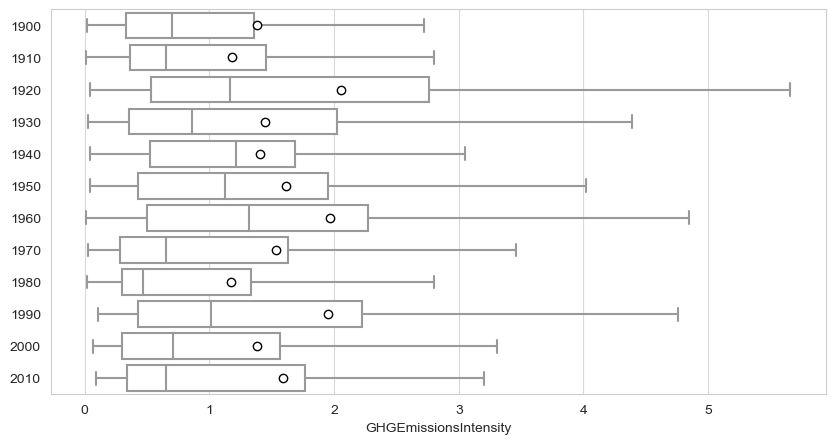

In [701]:
display_boxplot_with_mean(df_filtered.sort_values(by='DecadeBuilt'),
                          'GHGEmissionsIntensity', 'DecadeBuilt')

In [702]:
decades = df_filtered['DecadeBuilt'].sort_values().unique()
print(len(decades))
decades

12


array(['1900', '1910', '1920', '1930', '1940', '1950', '1960', '1970',
       '1980', '1990', '2000', '2010'], dtype=object)

In [703]:
# put all the groups in array
emissions_per_decade = []

for decade in decades:
    emissions_per_decade.append(df_filtered['GHGEmissionsIntensity'][
        df_filtered['DecadeBuilt'] == decade])

len(emissions_per_decade)

12

In [704]:
def perform_oneway_anova(groups):
    '''Perform a oneway ANOVA test and display result'''

    statistic, pvalue = stats.f_oneway(*groups)
    print('The f-statistic: %.16f, the p-value: %.16f ' % (statistic, pvalue))
    
    alpha = 0.05
    
    if (pvalue < alpha):
        print('The p-value is smaller than %.2f, we can reject the null hypothesis' % alpha)
    else:
        print('The p-value is greater than %.2f, we can not reject the null hypothesis' % alpha)
        

In [705]:
perform_oneway_anova(emissions_per_decade)

The f-statistic: 3.2621424805842003, the p-value: 0.0001996968527285 
The p-value is smaller than 0.05, we can reject the null hypothesis


**Tukey's HSD test** <br/>
Let's perform pairwise comparisons with the Tukey’s HSD test for equality of means.

In [706]:
from scipy.stats import tukey_hsd

def perform_tukey_test(groups, labels):
    '''Performs Tukey's HSD test and displays groups having a significant difference in means'''
    
    tukey_test_result = tukey_hsd(*groups)
    
    # convert the p-value vector to dataframe
    tukey_result_df = pd.DataFrame(data=tukey_test_result.__dict__['pvalue'], columns=labels, index=labels)
    
    # display a heatmap
    plt.figure(figsize=(10, 6))
    tukey_heatmap = sns.heatmap(tukey_result_df, cbar_kws={'fraction' : 0.01}, annot=True)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12, rotation=0)
    tukey_heatmap.set(xlabel="", ylabel="")
    plt.show()
    
    alpha = 0.05
    
    # get a list of (index, column) pairs having value < 0.05
    groups = tukey_result_df[tukey_result_df < alpha].stack().index
    
    # sort and remove duplicates
    sorted_groups = [tuple(sorted(q)) for q in groups]
    sorted_groups = sorted(list(set(sorted_groups)))
    
    print('___________________')
    print('')
    print('Groups with a significant difference between their means:\n')
    [print(group) for group in sorted_groups]

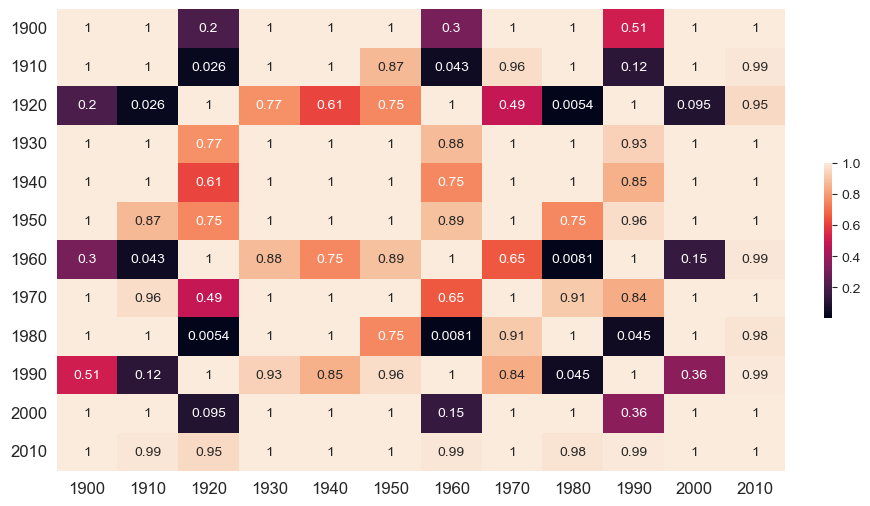

___________________

Groups with a significant difference between their means:

('1910', '1920')
('1910', '1960')
('1920', '1980')
('1960', '1980')
('1980', '1990')


In [707]:
perform_tukey_test(emissions_per_decade, decades)

**SiteEUIWN(kBtu/sf)**

<Figure size 1000x800 with 0 Axes>

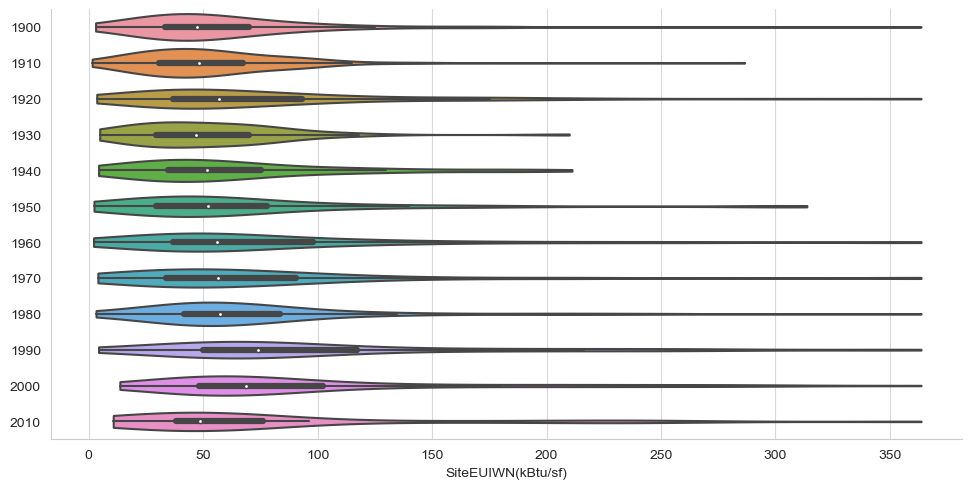

In [708]:
plt.figure(figsize=(10, 8))

sns.catplot(data=df_filtered.sort_values(by='DecadeBuilt'),
            x="SiteEUIWN(kBtu/sf)",
            y="DecadeBuilt",
            kind="violin",
            cut=0,
            split=True,
            aspect=2)

plt.ylabel(ylabel='')
plt.show()

We can see from this violin plot that buildings built in 1930 and 1940 are likely to consume less energy. Let's check if there is a relation with ANOVA.

<u>Considering these 2 hypothesis:</u>

H0: there is no difference in energy consumption <br/>
H1: energy consumption is different depending on the year the building was constructed

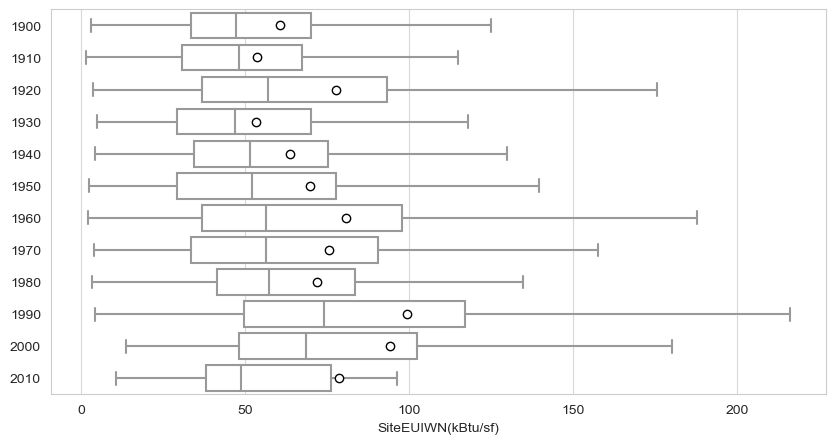

In [709]:
display_boxplot_with_mean(df_filtered.sort_values(by='DecadeBuilt'),
                          'SiteEUIWN(kBtu/sf)', 'DecadeBuilt')

In [710]:
# put all the groups in array
energy_per_decade = []

for decade in decades:
    energy_per_decade.append(df_filtered['SiteEUIWN(kBtu/sf)'][
        df_filtered['DecadeBuilt'] == decade])

len(energy_per_decade)

12

In [711]:
perform_oneway_anova(energy_per_decade)

The f-statistic: 5.4807182898994027, the p-value: 0.0000000125915346 
The p-value is smaller than 0.05, we can reject the null hypothesis


**Tukey's test**

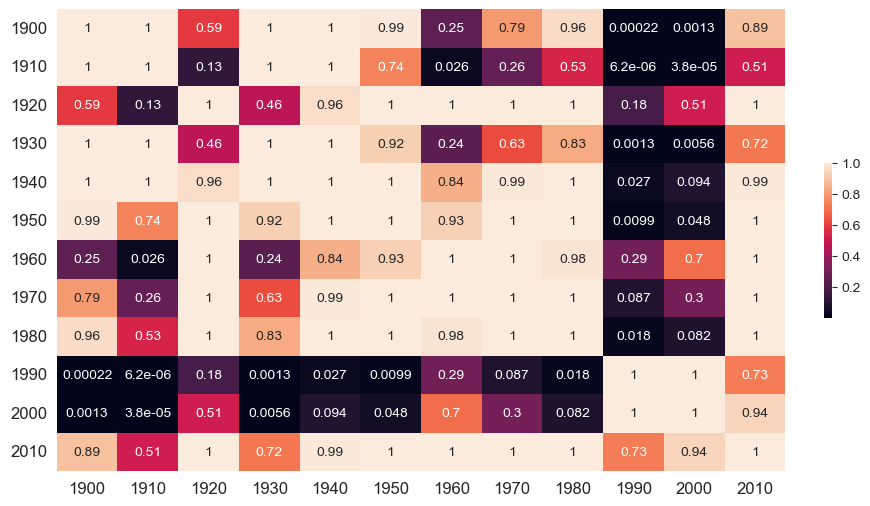

___________________

Groups with a significant difference between their means:

('1900', '1990')
('1900', '2000')
('1910', '1960')
('1910', '1990')
('1910', '2000')
('1930', '1990')
('1930', '2000')
('1940', '1990')
('1950', '1990')
('1950', '2000')
('1980', '1990')


In [712]:
perform_tukey_test(energy_per_decade, decades)

## PropertyType

This might be the most obvious relation, buildings with different purposes won't have the same energy consumption and CO2 emissions.

**GHGEmissionsIntensity**

<Figure size 1000x600 with 0 Axes>

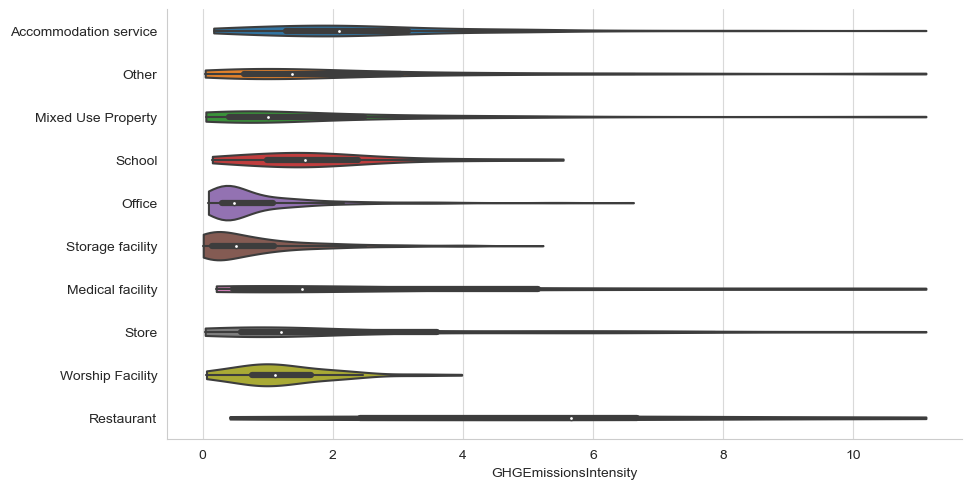

In [713]:
plt.figure(figsize=(10, 6))

sns.catplot(data=df_filtered,
            x="GHGEmissionsIntensity",
            y="GenericPropertyType",
            kind="violin",
            cut=0,
            split=True,
            aspect=2)

plt.ylabel(ylabel='')
plt.show()

The violin plots is pretty straightforward, we can observe indeed that depending on the building type the building does not have the same metrics. <br/>

Let's confirm it with ANOVA.

<u>Considering these 2 hypothesis:</u>

H0: CO2 emissions are equal for all property types <br/>
H1: CO2 emissions differ depending on the property type

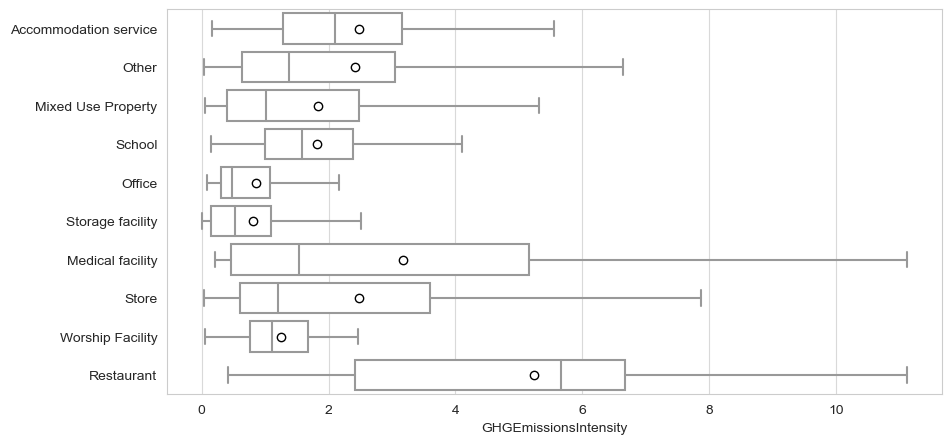

In [714]:
display_boxplot_with_mean(df_filtered, 'GHGEmissionsIntensity',
                          'GenericPropertyType')

In [715]:
property_types = df_filtered['GenericPropertyType'].unique()
print(len(property_types))
property_types

10


array(['Accommodation service', 'Other', 'Mixed Use Property', 'School',
       'Office', 'Storage facility', 'Medical facility', 'Store',
       'Worship Facility', 'Restaurant'], dtype=object)

In [716]:
# put all the groups in array
emissions_per_property_type = []

for property_type in property_types:
    emissions_per_property_type.append(df_filtered['GHGEmissionsIntensity'][
        df_filtered['GenericPropertyType'] == property_type])

len(emissions_per_property_type)

10

In [717]:
perform_oneway_anova(emissions_per_property_type)

The f-statistic: 35.7323823198191661, the p-value: 0.0000000000000000 
The p-value is smaller than 0.05, we can reject the null hypothesis


**Tukey's test**

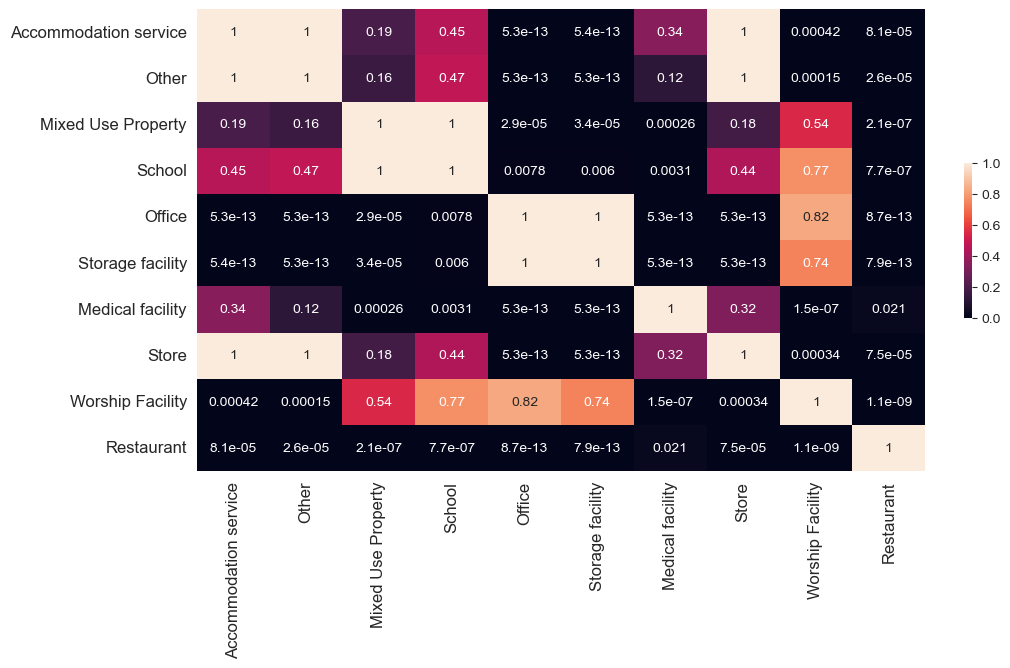

___________________

Groups with a significant difference between their means:

('Accommodation service', 'Office')
('Accommodation service', 'Restaurant')
('Accommodation service', 'Storage facility')
('Accommodation service', 'Worship Facility')
('Medical facility', 'Mixed Use Property')
('Medical facility', 'Office')
('Medical facility', 'Restaurant')
('Medical facility', 'School')
('Medical facility', 'Storage facility')
('Medical facility', 'Worship Facility')
('Mixed Use Property', 'Office')
('Mixed Use Property', 'Restaurant')
('Mixed Use Property', 'Storage facility')
('Office', 'Other')
('Office', 'Restaurant')
('Office', 'School')
('Office', 'Store')
('Other', 'Restaurant')
('Other', 'Storage facility')
('Other', 'Worship Facility')
('Restaurant', 'School')
('Restaurant', 'Storage facility')
('Restaurant', 'Store')
('Restaurant', 'Worship Facility')
('School', 'Storage facility')
('Storage facility', 'Store')
('Store', 'Worship Facility')


In [718]:
perform_tukey_test(emissions_per_property_type, property_types)

**SiteEUIWN(kBtu/sf)**

<Figure size 1000x600 with 0 Axes>

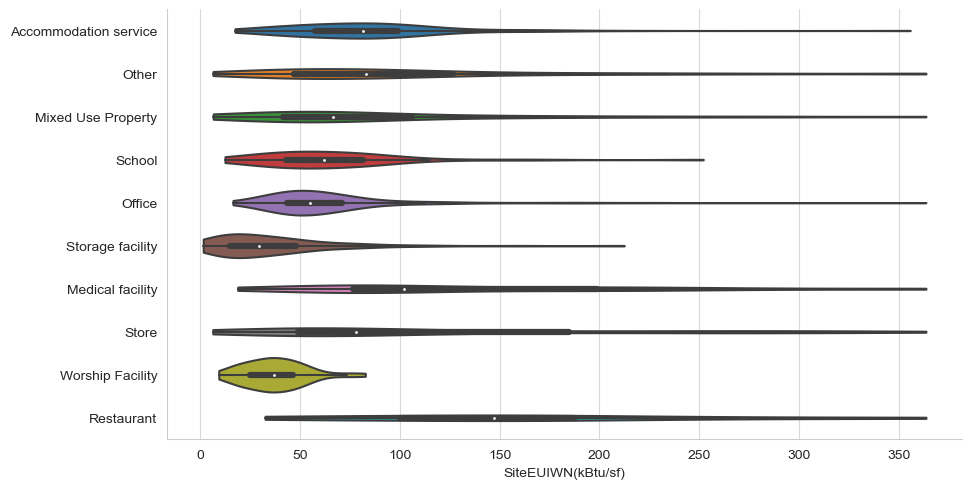

In [719]:
plt.figure(figsize=(10, 6))

sns.catplot(data=df_filtered,
            x="SiteEUIWN(kBtu/sf)",
            y="GenericPropertyType",
            kind="violin",
            cut=0,
            split=True,
            aspect=2)

plt.ylabel(ylabel='')
plt.show()

As to the energy consumption we can also observe that depending on the building type the building does not have the same metrics. <br/>

Let's confirm it with ANOVA.

<u>Considering these 2 hypothesis:</u>

H0: there is no difference in energy consumption for all property types <br/>
H1: energy consumption differs depending on the property type

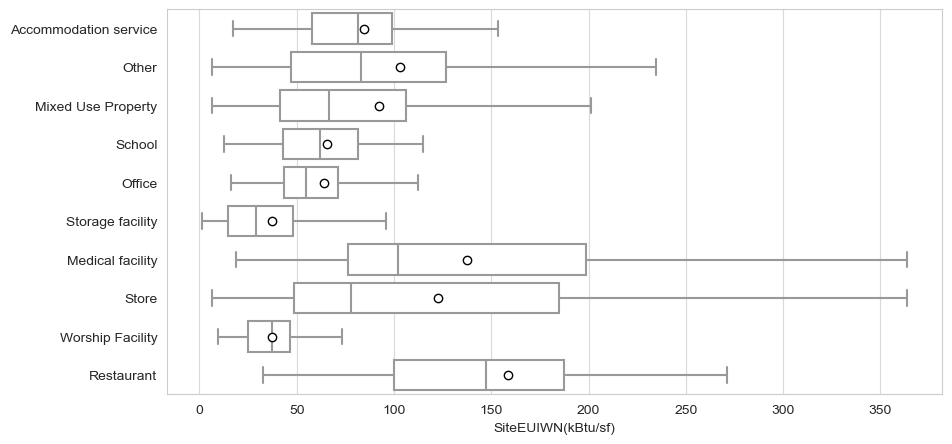

In [720]:
display_boxplot_with_mean(df_filtered, 'SiteEUIWN(kBtu/sf)',
                          'GenericPropertyType')

In [721]:
energy_per_property_type = []

for property_type in property_types:
    energy_per_property_type.append(df_filtered['SiteEUIWN(kBtu/sf)'][
        df_filtered['GenericPropertyType'] == property_type])

len(energy_per_property_type)

10

In [722]:
perform_oneway_anova(energy_per_property_type)

The f-statistic: 43.2444090930385414, the p-value: 0.0000000000000000 
The p-value is smaller than 0.05, we can reject the null hypothesis


**Tukey's test**

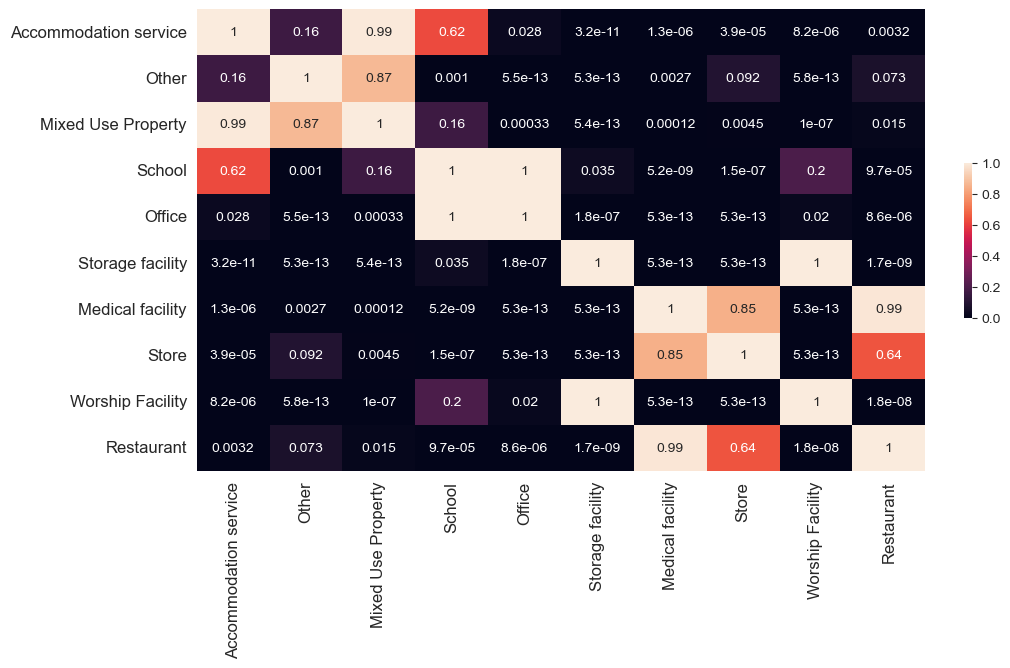

___________________

Groups with a significant difference between their means:

('Accommodation service', 'Medical facility')
('Accommodation service', 'Office')
('Accommodation service', 'Restaurant')
('Accommodation service', 'Storage facility')
('Accommodation service', 'Store')
('Accommodation service', 'Worship Facility')
('Medical facility', 'Mixed Use Property')
('Medical facility', 'Office')
('Medical facility', 'Other')
('Medical facility', 'School')
('Medical facility', 'Storage facility')
('Medical facility', 'Worship Facility')
('Mixed Use Property', 'Office')
('Mixed Use Property', 'Restaurant')
('Mixed Use Property', 'Storage facility')
('Mixed Use Property', 'Store')
('Mixed Use Property', 'Worship Facility')
('Office', 'Other')
('Office', 'Restaurant')
('Office', 'Storage facility')
('Office', 'Store')
('Office', 'Worship Facility')
('Other', 'School')
('Other', 'Storage facility')
('Other', 'Worship Facility')
('Restaurant', 'School')
('Restaurant', 'Storage facility')

In [723]:
perform_tukey_test(energy_per_property_type, property_types)

## Geographical position

Do the buildings consume the same amount of energy and produce CO2 emissions in every location in Seattle? 

**GHGEmissionsIntensity**

<Figure size 1000x800 with 0 Axes>

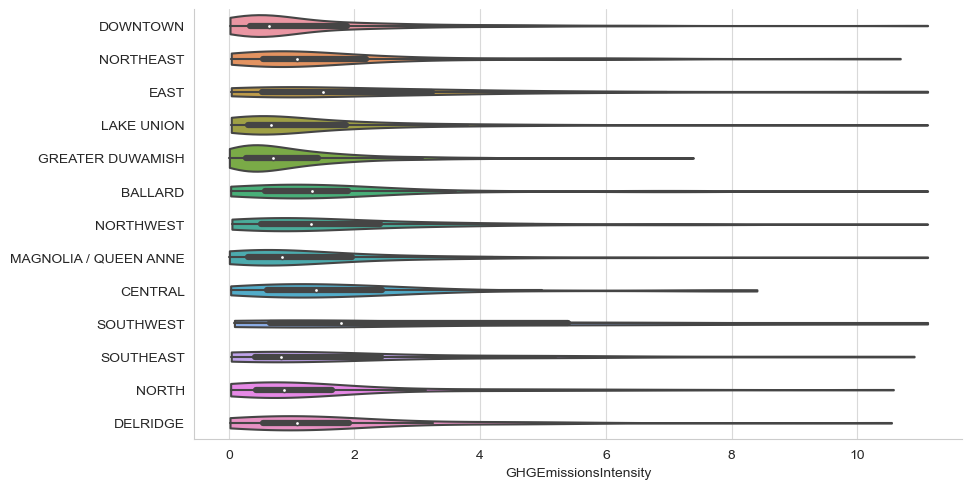

In [724]:
plt.figure(figsize=(10, 8))

sns.catplot(data=df_filtered,
            x="GHGEmissionsIntensity",
            y="Neighborhood",
            kind="violin",
            cut=0,
            split=True,
            aspect=2)

plt.ylabel(ylabel='')
plt.show()

There are some districts that tend to produce more CO2 (Downtown) than others but there does not seem to be any strong correlation between the location and the GHGEmissionsIntensity. <br/>

Let's confirm it with one-way ANOVA.

<u>Considering these 2 hypothesis:</u><br/>
H0: CO2 emissions are equal in all the neighborhoods <br/>
H1: CO2 emissions differ depending on the neighborhoods

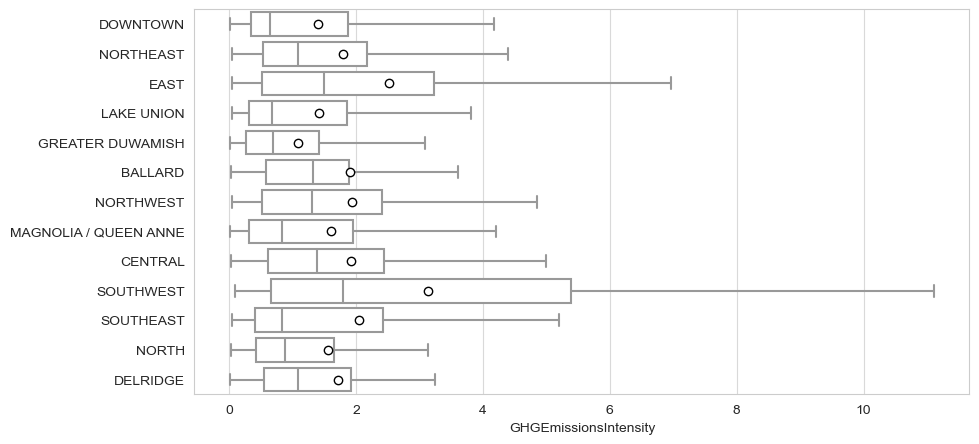

In [725]:
display_boxplot_with_mean(df_filtered, 'GHGEmissionsIntensity', 'Neighborhood')

In [727]:
neighborhoods = df_filtered['Neighborhood'].unique()
neighborhoods

array(['DOWNTOWN', 'NORTHEAST', 'EAST', 'LAKE UNION', 'GREATER DUWAMISH',
       'BALLARD', 'NORTHWEST', 'MAGNOLIA / QUEEN ANNE', 'CENTRAL',
       'SOUTHWEST', 'SOUTHEAST', 'NORTH', 'DELRIDGE'], dtype=object)

In [728]:
emissions_per_neighborhood = []

for neighborhood in neighborhoods:
    emissions_per_neighborhood.append(df_filtered['GHGEmissionsIntensity'][
        df_filtered['Neighborhood'] == neighborhood])

len(emissions_per_neighborhood)

13

In [729]:
perform_oneway_anova(emissions_per_neighborhood)

The f-statistic: 6.5078300131062763, the p-value: 0.0000000000201418 
The p-value is smaller than 0.05, we can reject the null hypothesis


**Tukey's test**

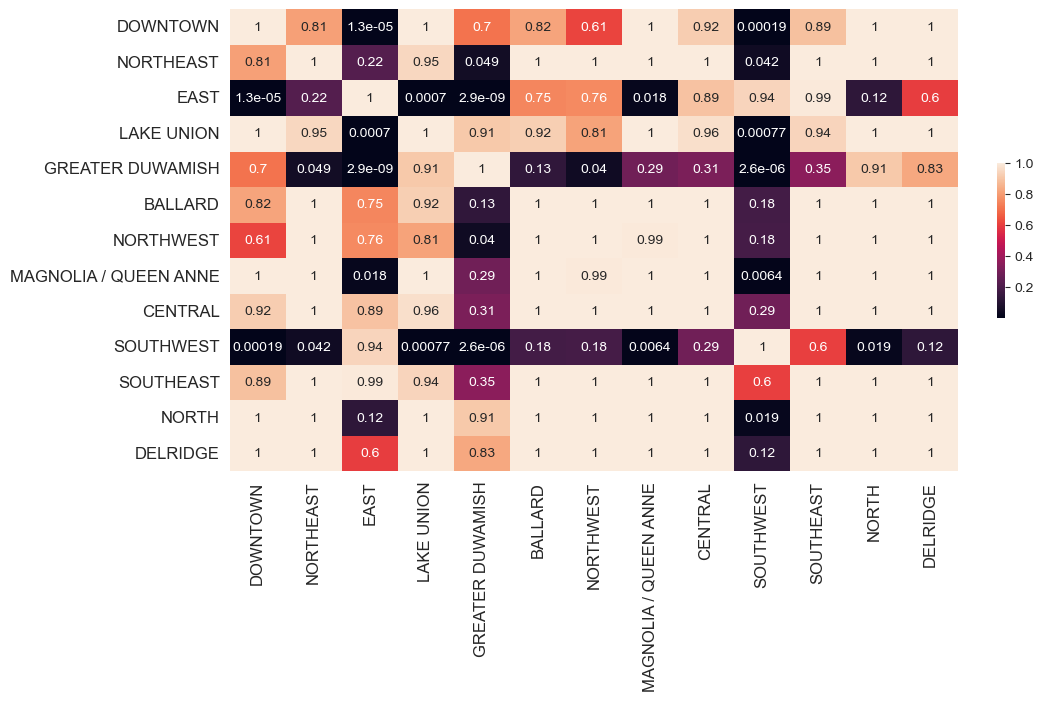

___________________

Groups with a significant difference between their means:

('DOWNTOWN', 'EAST')
('DOWNTOWN', 'SOUTHWEST')
('EAST', 'GREATER DUWAMISH')
('EAST', 'LAKE UNION')
('EAST', 'MAGNOLIA / QUEEN ANNE')
('GREATER DUWAMISH', 'NORTHEAST')
('GREATER DUWAMISH', 'NORTHWEST')
('GREATER DUWAMISH', 'SOUTHWEST')
('LAKE UNION', 'SOUTHWEST')
('MAGNOLIA / QUEEN ANNE', 'SOUTHWEST')
('NORTH', 'SOUTHWEST')
('NORTHEAST', 'SOUTHWEST')


In [730]:
perform_tukey_test(emissions_per_neighborhood, neighborhoods)

**SiteEUIWN(kBtu/sf)**

<Figure size 1000x800 with 0 Axes>

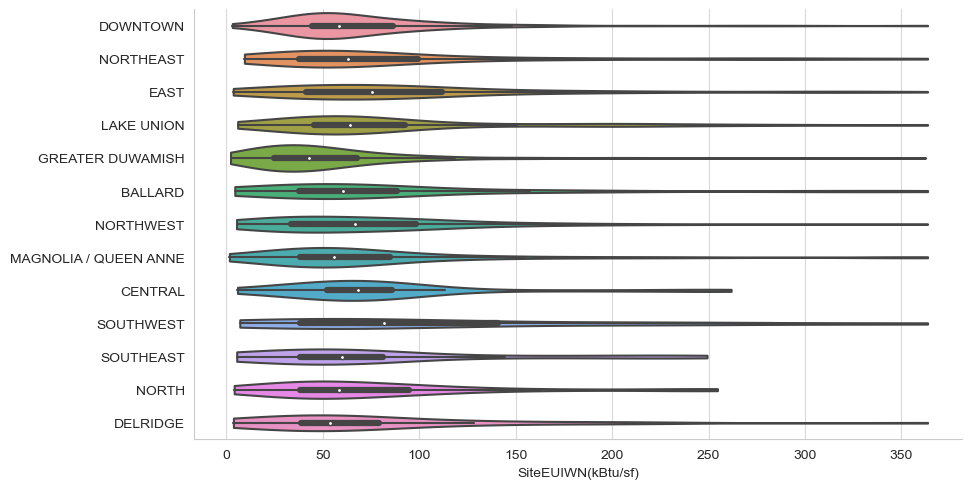

In [731]:
plt.figure(figsize=(10, 8))

sns.catplot(data=df_filtered,
            x="SiteEUIWN(kBtu/sf)",
            y="Neighborhood",
            kind="violin",
            cut=0,
            split=True,
            aspect=2)

plt.ylabel(ylabel='')
plt.show()

<u>Considering these 2 hypothesis:</u><br/>
H0: Energy consumption is equal in all the neighborhoods <br/>
H1: Energy consumption differ depending on the neighborhoods

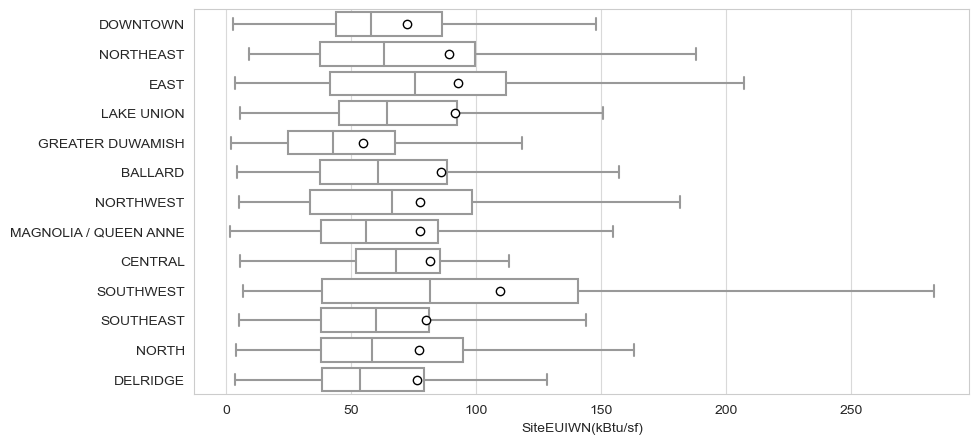

In [732]:
display_boxplot_with_mean(df_filtered, 'SiteEUIWN(kBtu/sf)', 'Neighborhood')

In [733]:
energy_per_neighborhood = []

for neighborhood in neighborhoods:
    energy_per_neighborhood.append(df_filtered['SiteEUIWN(kBtu/sf)'][df_filtered['Neighborhood'] == neighborhood])

len(energy_per_neighborhood)

13

In [734]:
perform_oneway_anova(energy_per_neighborhood)

The f-statistic: 5.4837701738963078, the p-value: 0.0000000032116618 
The p-value is smaller than 0.05, we can reject the null hypothesis


**Tukey's test**

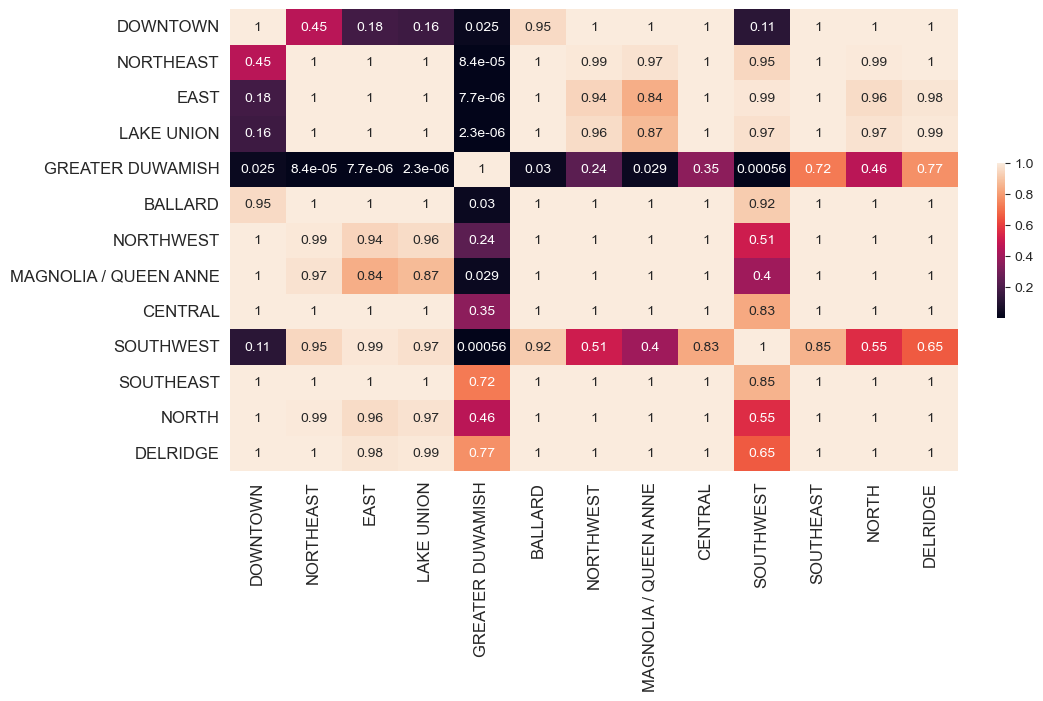

___________________

Groups with a significant difference between their means:

('BALLARD', 'GREATER DUWAMISH')
('DOWNTOWN', 'GREATER DUWAMISH')
('EAST', 'GREATER DUWAMISH')
('GREATER DUWAMISH', 'LAKE UNION')
('GREATER DUWAMISH', 'MAGNOLIA / QUEEN ANNE')
('GREATER DUWAMISH', 'NORTHEAST')
('GREATER DUWAMISH', 'SOUTHWEST')


In [735]:
perform_tukey_test(energy_per_neighborhood, neighborhoods)

# Preparing data

The preparing data strategy will consist in applying the cleaning and transformation operations above on the raw dataset before doing the split into train and test sets. Other pre-procesing operations like encoding and scaling will be done and applied using the Pipeline in the modelisation notebooks.<br/>
However, we will perform the following filtering operations before the split:
- keep non residential buildings
- keep only compliant buildings
- fix some values
- cleaning null targets
- handling outliers
- transforming ressources as percentage from total consumption
- transforming property types and parking surface into separate columns
- transforming year into decade
- keep the most relevant columns

In [736]:
df_processed = df_raw.copy()
df_processed.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0000,0659000030,...,1156514.2500,3946027.0000,12764.5293,1276453.0000,False,NaN,Compliant,NaN,249.9800,2.8300
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0000,0659000220,...,950425.1875,3242851.0000,51450.8164,5145082.0000,False,NaN,Compliant,NaN,295.8600,2.8600
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0000,0659000475,...,14515435.0000,49526664.0000,14938.0000,1493800.0000,False,NaN,Compliant,NaN,2089.2800,2.1900
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0000,0659000640,...,811525.3125,2768924.0000,18112.1309,1811213.0000,False,NaN,Compliant,NaN,286.4300,4.6700
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0000,0659000970,...,1573448.6250,5368607.0000,88039.9844,8803998.0000,False,NaN,Compliant,NaN,505.0100,2.8800


## Filtering irrelevant items

We can filter out non residential and non compliant buildings before the main preprocessing, it won't cause leakage between train and test sets

In [737]:
building_type_mask = (
    df_processed['BuildingType'].isin(non_residential_types)) & (
        df_processed['PrimaryPropertyType'] != 'Low-Rise Multifamily')

df_processed.loc[building_type_mask, :]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0000,0659000030,...,1156514.2500,3946027.0000,12764.5293,1276453.0000,False,NaN,Compliant,NaN,249.9800,2.8300
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0000,0659000220,...,950425.1875,3242851.0000,51450.8164,5145082.0000,False,NaN,Compliant,NaN,295.8600,2.8600
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0000,0659000475,...,14515435.0000,49526664.0000,14938.0000,1493800.0000,False,NaN,Compliant,NaN,2089.2800,2.1900
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0000,0659000640,...,811525.3125,2768924.0000,18112.1309,1811213.0000,False,NaN,Compliant,NaN,286.4300,4.6700
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0000,0659000970,...,1573448.6250,5368607.0000,88039.9844,8803998.0000,False,NaN,Compliant,NaN,505.0100,2.8800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,2016,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,Seattle,WA,NaN,1624049080,...,153655.0000,524270.8600,3254.7502,325475.0244,True,NaN,Error - Correct Default Data,NaN,20.9400,1.7000
3372,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,Seattle,WA,NaN,3558300000,...,116221.0000,396546.0520,5537.2998,553729.9805,False,NaN,Compliant,NaN,32.1700,2.0100
3373,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,Seattle,WA,NaN,1794501150,...,525251.6875,1792158.7580,39737.3906,3973739.0630,False,NaN,Compliant,NaN,223.5400,16.9900
3374,50225,2016,Nonresidential COS,Mixed Use Property,South Park Community Center,8319 8th Ave S,Seattle,WA,NaN,7883603155,...,102248.0000,348870.1760,3706.0100,370601.0010,False,NaN,Compliant,NaN,22.1100,1.5700


In [738]:
def filter_building_type(df):
    '''Filter out residential buildings'''

    non_residential_types = [
        'NonResidential', 'Nonresidential COS', 'Nonresidential WA'
    ]

    building_type_mask = (df['BuildingType'].isin(non_residential_types)) & (
        df['PrimaryPropertyType'] != 'Low-Rise Multifamily')
    
    return df.loc[building_type_mask, :]

As we saw in the filtering step above, we can keep only the 'Compliant' status buildings

In [739]:
df_processed.loc[df_processed['ComplianceStatus'] == 'Compliant', :]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0000,0659000030,...,1156514.2500,3946027.0000,12764.5293,1276453.0000,False,NaN,Compliant,NaN,249.9800,2.8300
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0000,0659000220,...,950425.1875,3242851.0000,51450.8164,5145082.0000,False,NaN,Compliant,NaN,295.8600,2.8600
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0000,0659000475,...,14515435.0000,49526664.0000,14938.0000,1493800.0000,False,NaN,Compliant,NaN,2089.2800,2.1900
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0000,0659000640,...,811525.3125,2768924.0000,18112.1309,1811213.0000,False,NaN,Compliant,NaN,286.4300,4.6700
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0000,0659000970,...,1573448.6250,5368607.0000,88039.9844,8803998.0000,False,NaN,Compliant,NaN,505.0100,2.8800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3370,50221,2016,Nonresidential COS,Other,High Point Community Center,6920 34th Ave SW,Seattle,WA,NaN,2524039059,...,185334.7031,632362.0071,2997.2000,299719.9951,False,NaN,Compliant,NaN,20.3300,1.1100
3372,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,Seattle,WA,NaN,3558300000,...,116221.0000,396546.0520,5537.2998,553729.9805,False,NaN,Compliant,NaN,32.1700,2.0100
3373,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,Seattle,WA,NaN,1794501150,...,525251.6875,1792158.7580,39737.3906,3973739.0630,False,NaN,Compliant,NaN,223.5400,16.9900
3374,50225,2016,Nonresidential COS,Mixed Use Property,South Park Community Center,8319 8th Ave S,Seattle,WA,NaN,7883603155,...,102248.0000,348870.1760,3706.0100,370601.0010,False,NaN,Compliant,NaN,22.1100,1.5700


In [740]:
def filter_compliant_status(df):
    '''Keep observations having compliant status'''
    
    return df.loc[df['ComplianceStatus'] == 'Compliant', :]

In [741]:
def filter_values(df):
    '''Keep only relevant values'''
    
    df = filter_building_type(df)
    df = filter_compliant_status(df)
    
    return df

## Cleaning values

Removing observations with null and 0 targets. As seen from the analysis above, the item having 0 in `TotalGHGEmissions` is erroneous, and the items with 0 value in `SiteEnergyUseWN(kBtu)` have registered energy consumptions but they are not weather normalized, so we can't say that the 0 is a valid value in this situation.

In [742]:
def clean_nan_targets(df):
    '''Remove NaN and 0 values for the targets'''
    
    df = df.loc[(df['SiteEnergyUseWN(kBtu)'] > 0) &
                 (df['SiteEnergyUseWN(kBtu)'].notna()) &
                (df['TotalGHGEmissions'] > 0) &
                                 (df['TotalGHGEmissions'].notna()),
                 :]
    
    return df

In [743]:
na_property_type = 'N/A'

def clean_property_types(df):
    '''Fill missing values for the property types
    
    - Set the largest property type to the primary property type if null, and its surface to the total surface
    - Set the second and third largest property types to 'N/A' and their respective surfaces to 0
    '''
    
    missing_property_dict = {
        'LargestPropertyUseType': df['PrimaryPropertyType'],
        'LargestPropertyUseTypeGFA': df['PropertyGFATotal'],
        'SecondLargestPropertyUseType': na_property_type,
        'SecondLargestPropertyUseTypeGFA': 0,
        'ThirdLargestPropertyUseType': na_property_type,
        'ThirdLargestPropertyUseTypeGFA': 0
        
    }
    
    return df.fillna(value=missing_property_dict)

In [744]:
def clean_energyStarScore(df):
    '''Removes observations having null ENERGYSTARScore'''
    
    return df.loc[df['ENERGYSTARScore'].notnull(), :]

In [745]:
def clean_values(df, withEnergyStarScore = False):
    '''Remove invalid values from targets and fill missing values in property types'''
    print('---Removing invalid targets')
    df = clean_nan_targets(df)
    
    print('---Filling missing values in property types')
    df = clean_property_types(df)
    
    if (withEnergyStarScore):
        print('---Removing NaN ENERGYSTARScore')
        df = clean_energyStarScore(df)
    
    return df

## Removing outliers

In [746]:
def remove_outliers(df):
    '''Remove outliers for the dataset for the energy parameters and targets'''

    columns_to_fix = [
        'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kBtu)',
        'NaturalGas(kBtu)', 'TotalGHGEmissions'
    ]

    for feature in columns_to_fix:
        upper_limit_q = round(df[feature].quantile(q=0.99), 4)

        df.loc[df[feature] > upper_limit_q, feature] = upper_limit_q

    return df

## Fixing values

In [747]:
def fix_values(df):
    '''Fixes duplicate and erroneous values'''
    
    # replace duplicated values for Neighborhood
    neighborhood_replace_dict = {
        'Delridge': 'DELRIDGE',
        'DELRIDGE NEIGHBORHOODS': 'DELRIDGE',
        'Central': 'CENTRAL',
        'Northwest': 'NORTHWEST',
        'Ballard': 'BALLARD',
        'North': 'NORTH'
    }

    df = df.replace({'Neighborhood': neighborhood_replace_dict})
    
    # replace 0 by 1 for NumberofBuildings and NumberOfFloors
    df.loc[df['NumberofBuildings'] == 0, 'NumberofBuildings'] = 1
    df.loc[df['NumberofFloors'] == 0, 'NumberofFloors'] = 1
    
    return df

## Transforming values

In [748]:
def calc_percentage(value, total, shouldRound=True):
    '''Calculates percentage'''
    percentage = value / total * 100

    return round(percentage) if shouldRound else percentage

In [749]:
def transform_surface(df):
    '''Create a new column for the park area expressed in percentage from the total surface'''
    
    df['PropertyParking(pct)'] = calc_percentage(df['PropertyGFAParking'], df['PropertyGFATotal'])
    
    return df

In [750]:
def transform_ressources(df):
    '''Create new columns for the ressources expressed in percentage from the total consumption'''
    
    df['SteamUse(pct)'] = calc_percentage(df['SteamUse(kBtu)'], df['SiteEnergyUseWN(kBtu)'])
    df['Electricity(pct)'] = calc_percentage(df['Electricity(kBtu)'], df['SiteEnergyUseWN(kBtu)'])
    df['NaturalGas(pct)'] = calc_percentage(df['NaturalGas(kBtu)'], df['SiteEnergyUseWN(kBtu)'])
    
    return df

In [751]:
def transform_year(df):
    '''Create new column to group years in decades'''
    
    df['DecadeBuilt'] = df['YearBuilt']//10*10
    df['DecadeBuilt'] = df['DecadeBuilt'].astype(str)
    
    return df

Largest, second and third largest property types contain much more different values as we saw for the primary type, that's why the mapping is bigger as in the analysis part.

In [753]:
def transform_property_type(df):
    '''Group similar property types'''

    property_type_dict = {
        # Office
        'Small- and Mid-Sized Office': 'Type_Office',
        'Large Office': 'Type_Office',
        'Office': 'Type_Office',
        'Bank Branch': 'Type_Office',
        'Financial Office': 'Type_Office',
        'Courthouse': 'Type_Office',
        'Police Station': 'Type_Office',

        # Medical facilities
        'Medical Office': 'Type_Medical_facility',
        'Hospital': 'Type_Medical_facility',
        'Laboratory': 'Type_Medical_facility',
        'Hospital (General Medical & Surgical)': 'Type_Medical_facility',
        'Other/Specialty Hospital': 'Type_Medical_facility',
        'Urgent Care/Clinic/Other Outpatient': 'Type_Medical_facility',

        # School
        'K-12 School': 'Type_School',
        'University': 'Type_School',
        'College/University': 'Type_School',
        'Other - Education': 'Type_School',
        'Pre-school/Daycare': 'Type_School',
        'Adult Education': 'Type_School',
        'Vocational School': 'Type_School',

        # Storage facility
        'Self-Storage Facility': 'Type_Storage_facility',
        'Warehouse': 'Type_Storage_facility',
        'Distribution Center': 'Type_Storage_facility',
        'Refrigerated Warehouse': 'Type_Storage_facility',
        'Non-Refrigerated Warehouse': 'Type_Storage_facility',

        # Store
        'Retail Store': 'Type_Store',
        'Supermarket / Grocery Store': 'Type_Store',
        'Supermarket/Grocery Store': 'Type_Store',
        'Strip Mall': 'Type_Store',
        'Automobile Dealership': 'Type_Store',
        'Other - Mall': 'Type_Store',
        'Wholesale Club/Supercenter': 'Type_Store',
        'Food Sales': 'Type_Store',
        'Enclosed Mall': 'Type_Store',
        'Convenience Store without Gas Station': 'Type_Store',

        # Accommodation
        'Hotel': 'Type_Accommodation',
        'Senior Care Community': 'Type_Accommodation',
        'Residence Hall': 'Type_Accommodation',
        'Residence Hall/Dormitory': 'Type_Accommodation',
        'Multifamily Housing': 'Type_Accommodation',
        'Other - Lodging/Residential': 'Type_Accommodation',
        'Prison/Incarceration': 'Type_Accommodation',
        'Residential Care Facility': 'Type_Accommodation',

        # Entertainment
        'Other - Recreation': 'Type_Entertainment',
        'Other - Entertainment/Public Assembly': 'Type_Entertainment',
        'Social/Meeting Hall': 'Type_Entertainment',
        'Worship Facility': 'Type_Entertainment',
        'Restaurant': 'Type_Entertainment',
        'Museum': 'Type_Entertainment',
        'Fitness Center/Health Club/Gym': 'Type_Entertainment',
        'Library': 'Type_Entertainment',
        'Performing Arts': 'Type_Entertainment',
        'Lifestyle Center': 'Type_Entertainment',
        'Other - Restaurant/Bar': 'Type_Entertainment',
        'Movie Theater': 'Type_Entertainment',
        'Swimming Pool': 'Type_Entertainment',
        'Bar/Nightclub': 'Type_Entertainment',
        'Fast Food Restaurant': 'Type_Entertainment',

        # Parking
        'Parking': 'Type_Parking',

        # Industry
        'Manufacturing/Industrial Plant': 'Type_Industry',
        'Data Center': 'Type_Industry',
        'Other - Technology/Science': 'Type_Industry',

        # Services
        'Repair Services (Vehicle, Shoe, Locksmith, etc)': 'Type_Services',
        'Other - Services': 'Type_Services',
        'Other - Public Services': 'Type_Services',
        'Other - Utility': 'Type_Services',
        'Fire Station': 'Type_Services',
        'Food Service': 'Type_Services',
        'Personal Services (Health/Beauty, Dry Cleaning, etc)': 'Type_Services',
        
        # Other
        'Other': 'Type_Other',
        'Mixed Use Property': 'Type_Other'
    }

    # df['GenericPropertyType'] = df['PrimaryPropertyType']
    df = df.replace({
        #'GenericPropertyType': property_type_dict,
        'LargestPropertyUseType': property_type_dict,
        'SecondLargestPropertyUseType': property_type_dict,
        'ThirdLargestPropertyUseType': property_type_dict
    })

    # Calculate surface percentage from the total
    df['LargestPropertyUseType(pct)'] = calc_percentage(
        df['LargestPropertyUseTypeGFA'], df['PropertyGFATotal'])
    df['SecondLargestPropertyUseType(pct)'] = calc_percentage(
        df['SecondLargestPropertyUseTypeGFA'], df['PropertyGFATotal'])
    df['ThirdLargestPropertyUseType(pct)'] = calc_percentage(
        df['ThirdLargestPropertyUseTypeGFA'], df['PropertyGFATotal'])

    # pivot property types
    df_largest = df.pivot(columns='LargestPropertyUseType',
                          values='LargestPropertyUseType(pct)').fillna(0)
    df_second = df.pivot(columns='SecondLargestPropertyUseType',
                         values='SecondLargestPropertyUseType(pct)').drop(
                             columns='N/A').fillna(0)
    df_third = df.pivot(columns='ThirdLargestPropertyUseType',
                        values='ThirdLargestPropertyUseType(pct)').drop(
                            columns='N/A').fillna(0)

    # combine the intermediate dfs (sum the surfaces in the same category)
    sum_surfaces = lambda s1, s2: s1 + s2

    df_largest_second = df_largest.combine(df_second, sum_surfaces).fillna(0)
    df_combined = df_largest_second.combine(df_third, sum_surfaces).fillna(0)

    df_concatenated = pd.concat([df, df_combined], axis=1)
    df_concatenated = df_concatenated.drop(columns=[
        'PrimaryPropertyType', 'LargestPropertyUseType',
        'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
        'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
        'ThirdLargestPropertyUseTypeGFA', 'LargestPropertyUseType(pct)',
        'SecondLargestPropertyUseType(pct)', 'ThirdLargestPropertyUseType(pct)'
    ])

    return df_concatenated

In [754]:
def transform_values(df):
    '''Create new columns with transformed values for ressources, areas, years, property type'''

    df = transform_surface(df)
    df = transform_ressources(df)
    df = transform_year(df)
    df = transform_property_type(df)
    
    return df

## Cleaning columns

The following columns will be removed:

- `OSEBuildingID`: unnecessary
- `BuildingType`: not necessary anymore
- `DataYear`: has the unique value of 2016
- `PropertyName`: unnecessary
- `Address`: redundant (`Neighborhood` will be enough)
- `City`: has the unique value Seattle
- `State`: has the unique value WA
- `ZipCode`: redundant
- `TaxParcelIdentificationNumber`: not relevant
- `CouncilDistrictCode`: not relevant
- `Latitude`: redundant
- `Longitude`: redundant 
- `YearBuilt`: redundant (`DecadeBuilt` will be used)
- `PropertyGFABuilding(s)`: redundant (`PropertyGFATotal` will be used)
- `PropertyGFAParking`: redundanat (`PropertyParking(pct)` will be used)
- `YearsENERGYSTARCertified`: unnecessary
- `Electricity(kWh)`: redundant (`Electricity(kBtu)` will be used)
- `SiteEUI(kBtu/sf)`
- `SiteEUIWN(kBtu/sf)`
- `SourceEUI(kBtu/sf)`
- `SourceEUIWN(kBtu/sf)`
- `SiteEnergyUse(kBtu)`
- `GHGEmissionsIntensity`
- `SteamUse(kBtu)`: will not be available (`SteamUse(pct)` will be used)
- `NaturalGas(therms)`: redundant (`NaturalGas(pct)` will be used)
- `NaturalGas(kBtu)`: will not be available (`NaturalGas(pct)` will be used)
- `Electricity(kWh)`: will not be available
- `Electricity(kBtu)`: will not be available (`Electricity(pct)` will be used)
- `DefaultData`: unnecessary
- `Comments`: empty column
- `ListOfAllPropertyUseTypes`: redundant
- `ComplianceStatus`: not necessary anymore
- `Outlier`: not necessary anymore


In [755]:
columns_to_exclude = [
    'OSEBuildingID', 'BuildingType', 'DataYear', 'PropertyName', 'Address',
    'City', 'State', 'ZipCode', 'TaxParcelIdentificationNumber',
    'CouncilDistrictCode', 'Latitude', 'Longitude', 'YearBuilt', 'PropertyGFABuilding(s)', 'PropertyGFAParking',
    'YearsENERGYSTARCertified', 'SteamUse(kBtu)', 'Electricity(kWh)',
    'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)',
    'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)',
    'SiteEnergyUse(kBtu)', 'SourceEUIWN(kBtu/sf)', 'DefaultData', 'Comments',
    'ListOfAllPropertyUseTypes', 'ComplianceStatus',
    'Outlier', 'GHGEmissionsIntensity'
]

df_processed.loc[:, ~df_processed.columns.isin(columns_to_exclude)]

,PrimaryPropertyType,Neighborhood,NumberofBuildings,NumberofFloors,PropertyGFATotal,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUseWN(kBtu),TotalGHGEmissions
0,Hotel,DOWNTOWN,1.0000,12,88434,Hotel,88434.0000,NaN,NaN,NaN,NaN,60.0000,7456910.0000,249.9800
1,Hotel,DOWNTOWN,1.0000,11,103566,Hotel,83880.0000,Parking,15064.0000,Restaurant,4622.0000,61.0000,8664479.0000,295.8600
2,Hotel,DOWNTOWN,1.0000,41,956110,Hotel,756493.0000,NaN,NaN,NaN,NaN,43.0000,73937112.0000,2089.2800
3,Hotel,DOWNTOWN,1.0000,10,61320,Hotel,61320.0000,NaN,NaN,NaN,NaN,56.0000,6946800.5000,286.4300
4,Hotel,DOWNTOWN,1.0000,18,175580,Hotel,123445.0000,Parking,68009.0000,Swimming Pool,0.0000,75.0000,14656503.0000,505.0100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,Office,GREATER DUWAMISH,1.0000,1,12294,Office,12294.0000,NaN,NaN,NaN,NaN,46.0000,943003.1875,20.9400
3372,Other,DOWNTOWN,1.0000,1,16000,Other - Recreation,16000.0000,NaN,NaN,NaN,NaN,NaN,1053705.7500,32.1700
3373,Other,MAGNOLIA / QUEEN ANNE,1.0000,1,13157,Other - Recreation,7583.0000,Fitness Center/Health Club/Gym,5574.0000,Swimming Pool,0.0000,NaN,6053764.5000,223.5400
3374,Mixed Use Property,GREATER DUWAMISH,1.0000,1,14101,Other - Recreation,6601.0000,Fitness Center/Health Club/Gym,6501.0000,Pre-school/Daycare,484.0000,NaN,782841.3125,22.1100


In [756]:
def clean_columns(df, withEnergyStarScore=False):
    '''Exclude irrelevant and redundant columns'''

    columns_to_exclude = [
        'OSEBuildingID', 'BuildingType', 'DataYear', 'PropertyName', 'Address',
        'City', 'State', 'ZipCode', 'TaxParcelIdentificationNumber',
        'CouncilDistrictCode', 'Latitude', 'Longitude', 'YearBuilt',
        'PropertyGFABuilding(s)', 'PropertyGFAParking', 'YearsENERGYSTARCertified', 'SteamUse(kBtu)',
        'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
        'NaturalGas(kBtu)', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)',
        'SourceEUI(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'SourceEUIWN(kBtu/sf)',
        'DefaultData', 'Comments', 'ListOfAllPropertyUseTypes',
        'ComplianceStatus', 'Outlier', 'GHGEmissionsIntensity'
    ]

    if (not withEnergyStarScore):
        columns_to_exclude.append('ENERGYSTARScore')

    return df.loc[:, ~df.columns.isin(columns_to_exclude)]

In [757]:
def prepare_dataframe(df, withEnergyStarScore = False):
    '''Executes pre-processing operations on the dataset before the split'''
    
    print('---Filtering values---')
    df = filter_values(df)
    
    print('---Cleaning values---')
    df = clean_values(df, withEnergyStarScore)
    
    print('---Removing outliers---')
    df = remove_outliers(df)
    
    print('---Fixing values---')
    df = fix_values(df)
    
    print('---Transforming values---')
    df = transform_values(df)
    
    print('---Cleaning columns---')
    df = clean_columns(df, withEnergyStarScore)
    
    print('Done.')
    
    return df

In [758]:
df_processed = prepare_dataframe(df_processed)

---Filtering values---
---Cleaning values---
---Removing invalid targets
---Filling missing values in property types
---Removing outliers---
---Fixing values---
---Transforming values---
---Cleaning columns---
Done.


In [759]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1502 entries, 0 to 3375
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Neighborhood           1502 non-null   object 
 1   NumberofBuildings      1502 non-null   float64
 2   NumberofFloors         1502 non-null   int64  
 3   PropertyGFATotal       1502 non-null   int64  
 4   SiteEnergyUseWN(kBtu)  1502 non-null   float64
 5   TotalGHGEmissions      1502 non-null   float64
 6   PropertyParking(pct)   1502 non-null   float64
 7   SteamUse(pct)          1502 non-null   float64
 8   Electricity(pct)       1502 non-null   float64
 9   NaturalGas(pct)        1502 non-null   float64
 10  DecadeBuilt            1502 non-null   object 
 11  Type_Accommodation     1502 non-null   float64
 12  Type_Entertainment     1502 non-null   float64
 13  Type_Industry          1502 non-null   float64
 14  Type_Medical_facility  1502 non-null   float64
 15  Type

## With Energy Star Score

In [760]:
df_processed_with_ess = df_raw.copy()

In [761]:
df_processed_with_ess.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

In [762]:
df_processed_with_ess = prepare_dataframe(df_processed_with_ess, withEnergyStarScore = True)

---Filtering values---
---Cleaning values---
---Removing invalid targets
---Filling missing values in property types
---Removing NaN ENERGYSTARScore
---Removing outliers---
---Fixing values---
---Transforming values---
---Cleaning columns---
Done.


In [763]:
df_processed_with_ess.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 974 entries, 0 to 3347
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Neighborhood           974 non-null    object 
 1   NumberofBuildings      974 non-null    float64
 2   NumberofFloors         974 non-null    int64  
 3   PropertyGFATotal       974 non-null    int64  
 4   ENERGYSTARScore        974 non-null    float64
 5   SiteEnergyUseWN(kBtu)  974 non-null    float64
 6   TotalGHGEmissions      974 non-null    float64
 7   PropertyParking(pct)   974 non-null    float64
 8   SteamUse(pct)          974 non-null    float64
 9   Electricity(pct)       974 non-null    float64
 10  NaturalGas(pct)        974 non-null    float64
 11  DecadeBuilt            974 non-null    object 
 12  Type_Accommodation     974 non-null    float64
 13  Type_Entertainment     974 non-null    float64
 14  Type_Industry          974 non-null    float64
 15  Type_

## Export

In [764]:
df_processed.to_csv('data/cleaned/df_cleaned.csv', index=False)

In [765]:
df_processed_with_ess.to_csv('data/cleaned/df_cleaned_with_ess.csv', index=False)